▶ **Analyse des Données du sous projet BDA/DL par les Techniques
de Data Mining, Machine Learning et Deep Learning :**

# Installation des modules nécessaire
- PyHive: interface Python pour les bases de données de type Apache Hive. Il permet aux développeurs d'interagir avec les données stockées dans Hive à partir de leur code Python.

In [ ]:
!pip install pyhive

Defaulting to user installation because normal site-packages is not writeable


- thrift_sasl est une dépendance utilisée pour communiquer avec des systèmes distribués comme Apache Hive, Apache HBase, etc., qui utilisent le protocole Thrift.

In [ ]:
!pip install thrift_sasl

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


- La bibliothèque Python installé pour l'apprentissage automatique (machine learning) pour la préparation des données, l'apprentissage supervisé et non supervisé,

In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


# Analyse Exploratoire des données du Catalogue

- Il convient de souligner que toutes les données du datalake sont conformes au dictionnaire de données fourni, cela est rendu possible grâce au traitement effectué à l'aide de requêtes Hive avant de passer à l'analyse des données.

- On se connecte à la base de données Hive locale, exécute une requête SQL pour récupérer les données de la table resultat_catalogue_co2, puis stocke ces données dans un DataFrame Pandas pour une manipulation ultérieure. 

In [1]:
from pyhive import hive
import pandas as pd

# Connexion à Hive
conn = hive.Connection(host='localhost', port=10000, username='hive')

# Création d'un curseur
cursor = conn.cursor()

In [2]:
# Exécution d'une requête SQL
cursor.execute('SELECT * FROM resultat_catalogue_co2')

# Récupération des noms de colonnes
columns = [desc[0] for desc in cursor.description]

# Récupération des résultats
results = cursor.fetchall()

# Création d'un DataFrame Pandas avec les résultats et les noms de colonnes
catalogue_data = pd.DataFrame(results, columns=columns)

catalogue_data

resultat_catalogue_co2.marque resultat_catalogue_co2.nom  \
0                           Volvo                     S80 T6   
1                           Volvo                     S80 T6   
2                           Volvo                     S80 T6   
3                           Volvo                     S80 T6   
4                           Volvo                     S80 T6   
..                            ...                        ...   
265                          Audi                     A2 1.4   
266                          Audi                     A2 1.4   
267                          Audi                     A2 1.4   
268                          Audi                     A2 1.4   
269                          Audi                     A2 1.4   

     resultat_catalogue_co2.puissance resultat_catalogue_co2.longueur  \
0                                 272                     très longue   
1                                 272                     très longue   
2                                 272                     très longue   
3                                 272                     très longue   
4                                 272                     très longue   
..                                ...                             ...   
265                                75                          courte   
266                                75                          courte   
267                                75                          courte   
268                                75                          courte   
269                                75                          courte   

     resultat_catalogue_co2.nbplaces  resultat_catalogue_co2.nbportes  \
0                                  5                                5   
1                                  5                                5   
2                                  5                                5   
3                                  5                                5   
4                                  5                                5   
..                               ...                              ...   
265                                5                                5   
266                                5                                5   
267                                5                                5   
268                                5                                5   
269                                5                                5   

    resultat_catalogue_co2.couleur  resultat_catalogue_co2.occasion  \
0                            blanc                            False   
1                             noir                            False   
2                            rouge                            False   
3                             gris                             True   
4                             bleu                             True   
..                             ...                              ...   
265                           noir                            False   
266                          rouge                            False   
267                          blanc                             True   
268                          rouge                             True   
269                          blanc                            False   

     resultat_catalogue_co2.prix  resultat_catalogue_co2.moyenne_bonus_malus  \
0                          50500                                         0.0   
1                          50500                                         0.0   
2                          50500                                         0.0   
3                          35350                                         0.0   
4                          35350                                         0.0   
..                           ...                                         ...   
265                        18310                                    

In [3]:
#Afficher les types de données de chaque colonne
print(catalogue_data.dtypes)

resultat_catalogue_co2.marque                  object
resultat_catalogue_co2.nom                     object
resultat_catalogue_co2.puissance                int64
resultat_catalogue_co2.longueur                object
resultat_catalogue_co2.nbplaces                 int64
resultat_catalogue_co2.nbportes                 int64
resultat_catalogue_co2.couleur                 object
resultat_catalogue_co2.occasion                  bool
resultat_catalogue_co2.prix                     int64
resultat_catalogue_co2.moyenne_bonus_malus    float64
resultat_catalogue_co2.moyenne_rejets_co2     float64
resultat_catalogue_co2.cout_energie_moyen     float64
dtype: object


In [4]:
# Affichage des premières lignes pour vérification
print(catalogue_data.head())


  resultat_catalogue_co2.marque resultat_catalogue_co2.nom  \
0                         Volvo                     S80 T6   
1                         Volvo                     S80 T6   
2                         Volvo                     S80 T6   
3                         Volvo                     S80 T6   
4                         Volvo                     S80 T6   

   resultat_catalogue_co2.puissance resultat_catalogue_co2.longueur  \
0                               272                     très longue   
1                               272                     très longue   
2                               272                     très longue   
3                               272                     très longue   
4                               272                     très longue   

   resultat_catalogue_co2.nbplaces  resultat_catalogue_co2.nbportes  \
0                                5                                5   
1                                5                        

## Analyse exploratoire de la dataframe

In [5]:
colonnes_a_selectionner = [
    'resultat_catalogue_co2.puissance',
    'resultat_catalogue_co2.nbplaces',
    'resultat_catalogue_co2.nbportes',
    'resultat_catalogue_co2.prix',
    'resultat_catalogue_co2.moyenne_bonus_malus',
    'resultat_catalogue_co2.moyenne_rejets_co2',
    'resultat_catalogue_co2.cout_energie_moyen'
]

# Utilisation des colonnes sélectionnées dans la DataFrame
numeric_data = catalogue_data[colonnes_a_selectionner]
numeric_data

resultat_catalogue_co2.puissance  resultat_catalogue_co2.nbplaces  \
0                                 272                                5   
1                                 272                                5   
2                                 272                                5   
3                                 272                                5   
4                                 272                                5   
..                                ...                              ...   
265                                75                                5   
266                                75                                5   
267                                75                                5   
268                                75                                5   
269                                75                                5   

     resultat_catalogue_co2.nbportes  resultat_catalogue_co2.prix  \
0                                  5                        50500   
1                                  5                        50500   
2                                  5                        50500   
3                                  5                        35350   
4                                  5                        35350   
..                               ...                          ...   
265                                5                        18310   
266                                5                        18310   
267                                5                        12817   
268                                5                        12817   
269                                5                        18310   

     resultat_catalogue_co2.moyenne_bonus_malus  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
265                                     -6000.0   
266                                     -6000.0   
267                                     -6000.0   
268                                     -6000.0   
269                                     -6000.0   

     resultat_catalogue_co2.moyenne_rejets_co2  \
0                                       42.455   
1                                       42.455   
2                                       42.455   
3                                       42.455   
4                                       42.455   
..                                         ...   
265                                     43.500   
266                                     43.500   
267                                     43.500   
268                                     43.500   
269                                     43.500   

     resultat_catalogue_co2.cout_energie_moyen  
0                                       72.727  
1                                       72.727  
2                                       72.727  
3                                       72.727  
4                                       72.727  
..                                         ...  
265                                    191.600  
266                                    191.600  
267                                    191.600  
268                                    191.600  
269                                    191.600  

[270 rows x 7 columns]

- On générer des histogrammes des variables numériques présentes dans le DataFrame numeric_data. L'objectif est d'effectuer une analyse univariée pour examiner la distribution de chaque variable numérique.Chaque histogramme représente la fréquence des valeurs de la variable correspondante. Cette visualisation permet d'avoir un aperçu rapide de la distribution des données et peut aider à détecter d'éventuelles tendances ou anomalies.


In [6]:
import matplotlib.pyplot as plt

# Effectuer une analyse univariée pour toutes les variables numériques avec une taille de figure plus grande
numeric_data.hist(figsize=(14, 12))
plt.suptitle("Distribution des variables numériques")
plt.show()

Matplotlib created a temporary cache directory at /tmp/matplotlib-fngmeq3g because the default path (/home/vagrant/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Les résultats révèlent que la majorité des véhicules ont une puissance comprise entre 100 et 200 chevaux, un prix situé entre 20 000 et 25 000 euros, cinq portes et cinq places, un bonus-malus moyen de -6000 euros, des émissions de CO2 moyennes eentre 0 et 50 g/km et un coût énergétique moyen compris entre 30 et 200 euros.

- On dessine un graphique qui nous permettra de visualiser la distribution des valeurs des variables continues "prix" et "moyenne_bonus_malus", ainsi que les valeurs aberrantes éventuelles, les médianes, les quartiles, et la dispersion des données.








In [7]:
# Boîtes à moustaches pour les variables continues
catalogue_data[['resultat_catalogue_co2.prix','resultat_catalogue_co2.moyenne_bonus_malus']].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

- informations  fournies par le graphique de boîtes à moustaches

- Prenons exemple de résultat_catalogue_co2.prix :  
La médiane de la distribution des données est d'une valeur à-peu-près de 20000.

Les Quartiles: le premier quartile (Q1) 25th percentile d'une valeur de 15000,
               le troisième quartile (Q3) 75th percentile d'une valeur de 30000.

Maximum value : Une valeur de 50000.

Minimum value : Une valeur d'un peu près 9000.

Ainsi la présence des outliers est remarqué  vers les valeurs 65000, 70000 95000, et approximativement 100000.    

- Pour la variable résultat_catalogue_co2.moyenne_bonus/malus :

minimum value, le premier quartile (Q1), médiane est d'une valeur de -6000

le troisieme quartile : Une valeur autour de 7500.

Maximum value : Une valeur à peu prés de 10000.


![Logo Google](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)


/tmp/ipykernel_9648/1284653526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="variable", y="value", data=numeric_data[columns].melt(), palette="muted")


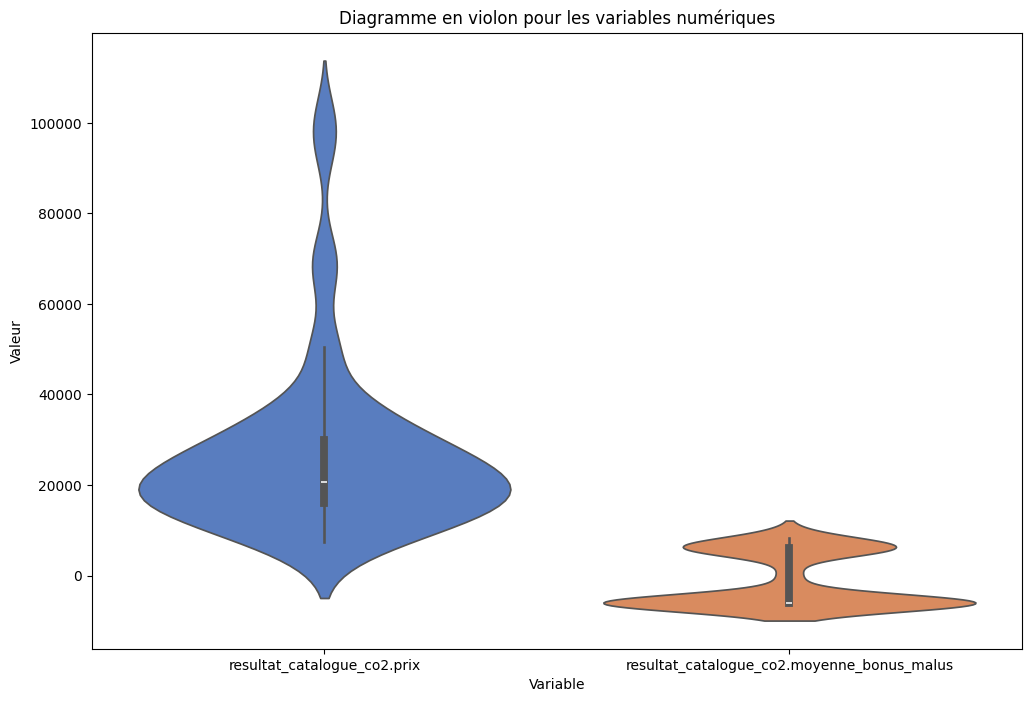

In [10]:
import seaborn as sns
columns=['resultat_catalogue_co2.prix','resultat_catalogue_co2.moyenne_bonus_malus']
# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Tracer le diagramme en violon
sns.violinplot(x="variable", y="value", data=numeric_data[columns].melt(), palette="muted")
plt.title("Diagramme en violon pour les variables numériques")
plt.xlabel("Variable")
plt.ylabel("Valeur")
plt.show()

 Le diagramme en violon offre une visualisation plus détaillée de la forme de la distribution des données, y compris la médiane, les quartiles, les valeurs aberrantes potentielles, les pics, les creux et la densité de probabilité relative.

 on constate la distribution des valeurs pour chaque variable numérique, avec les contours des violons représentant la densité de probabilité des données à différentes valeurs ce qui peut aider à identifier les zones de concentration des données et à détecter les schémas de regroupement ou de dispersion.

![Logo Google](https://orange3.readthedocs.io/projects/orange-visual-programming/en/latest/_images/ViolinPlot-boxplot.png)




## Analyse des valeurs catégoriques

On travail a  générer des histogrammes d'effectif des variables catégoriques présentes dans le DataFrame Catalogue.

En parcourant chaque colonne catégorique de la liste categorical_columns, le code examine attentivement le nombre d'occurrences de chaque catégorie, puis crée des histogrammes à barres pour illustrer de manière visuelle la répartition des différentes catégories. Chaque histogramme est méticuleusement annoté avec un titre descriptif et des étiquettes pour les axes x et y, facilitant ainsi l'identification des variables analysées et la compréhension de l'effectif. De plus, les étiquettes de l'axe des x sont inclinées de 45 degrés pour une meilleure lisibilité, tandis qu'une grille subtile est ajoutée sur l'axe des y pour améliorer la visualisation des valeurs.

Enfin, chaque histogramme est présenté individuellement, permettant une exploration détaillée  des distributions des variables catégoriques.









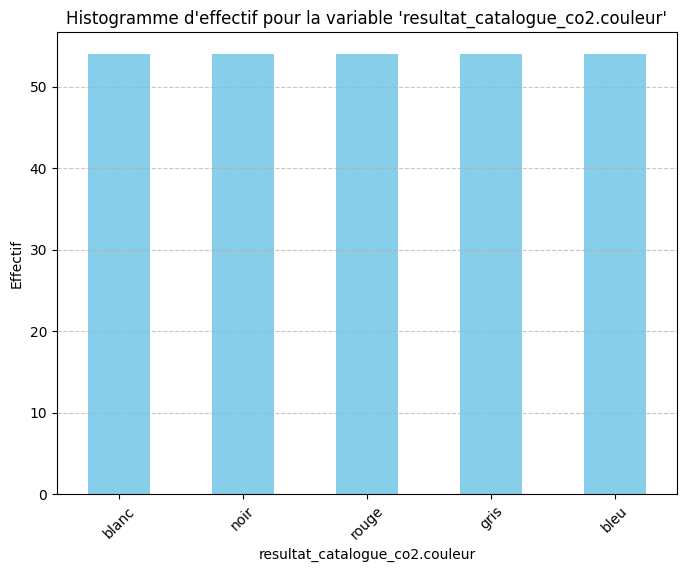

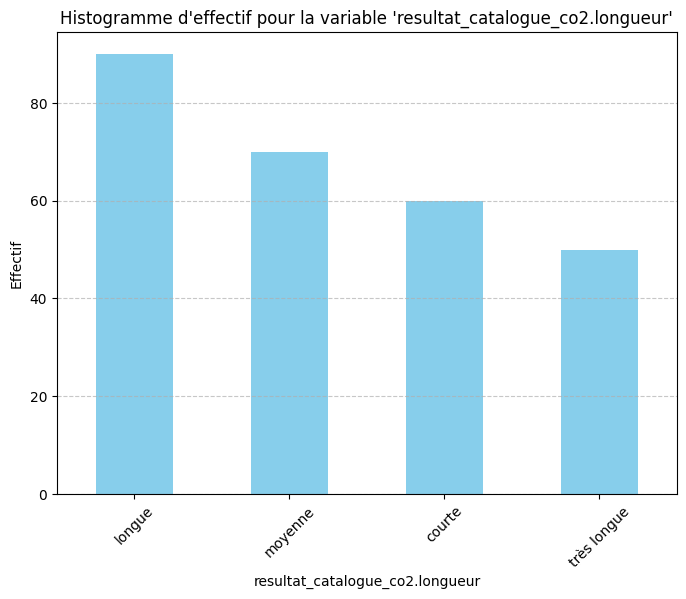

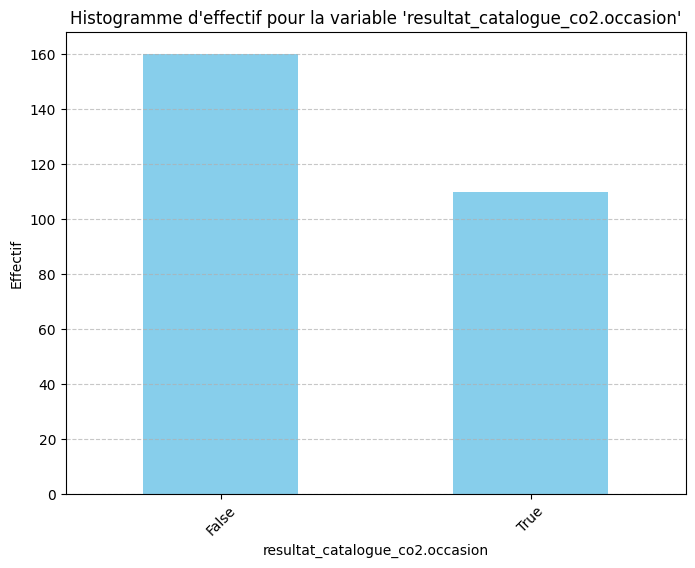

In [11]:
import matplotlib.pyplot as plt

# Liste des noms de colonnes catégoriques
categorical_columns = ['resultat_catalogue_co2.couleur',
                       'resultat_catalogue_co2.longueur',
                       'resultat_catalogue_co2.occasion']

# Création d'histogrammes d'effectif pour chaque variable catégorique
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    catalogue_data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Histogramme d'effectif pour la variable '{column}'")
    plt.xlabel(column)
    plt.ylabel("Effectif")
    plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Il est observé que la majorité des voitures répertoriées dans le catalogue ne sont pas d'occasion et qu'ils ont une grande longueur.

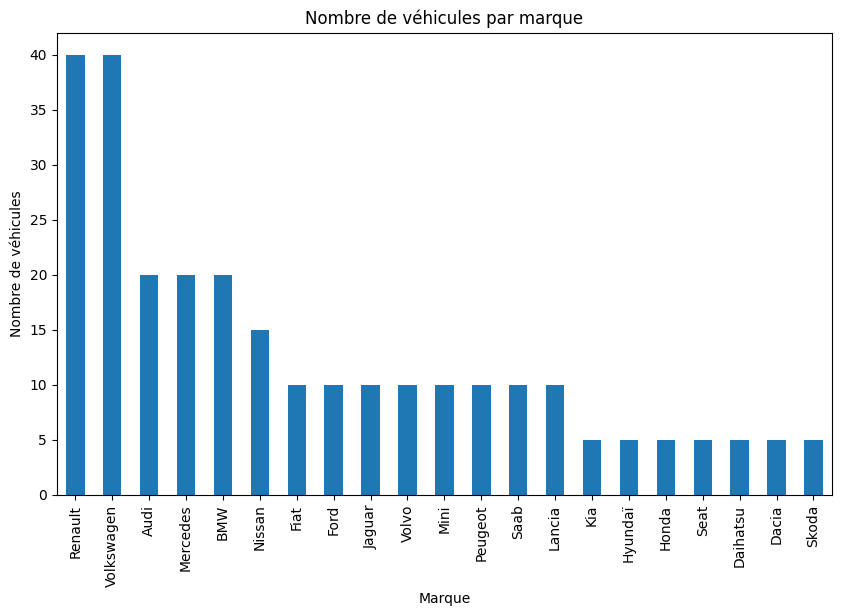

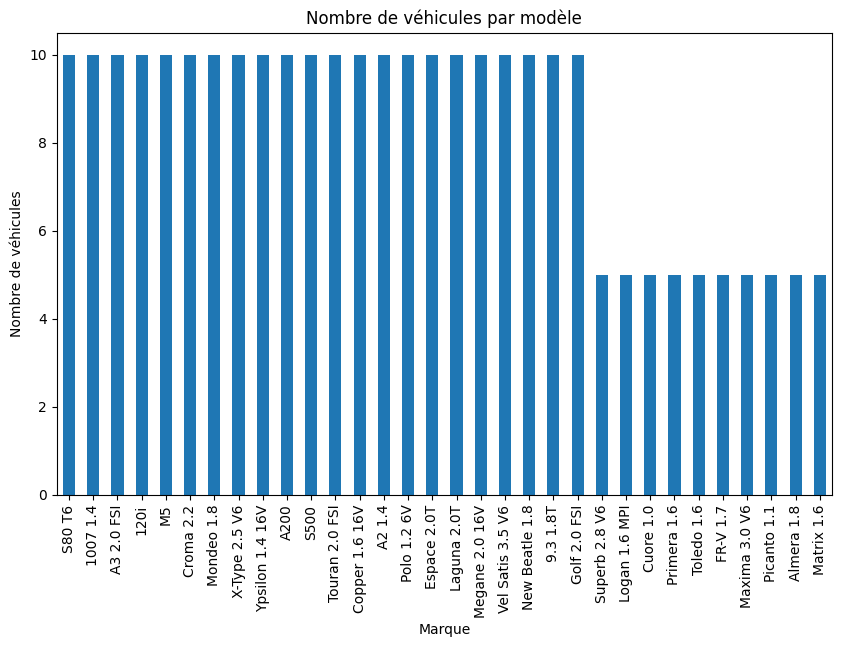

In [12]:
# Diagrammes en barres pour les variables catégorielles
plt.figure(figsize=(10, 6))
catalogue_data['resultat_catalogue_co2.marque'].value_counts().plot(kind='bar')
plt.xlabel('Marque')
plt.ylabel('Nombre de véhicules')
plt.title('Nombre de véhicules par marque')
plt.show()




# Diagrammes en barres pour les variables catégorielles
plt.figure(figsize=(10, 6))
catalogue_data['resultat_catalogue_co2.nom'].value_counts().plot(kind='bar')
plt.xlabel('Marque')
plt.ylabel('Nombre de véhicules')
plt.title('Nombre de véhicules par modèle')
plt.show()

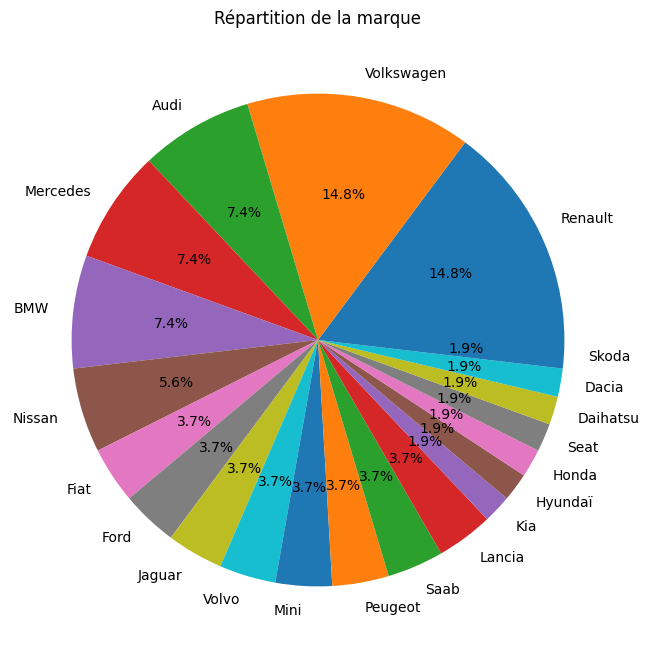

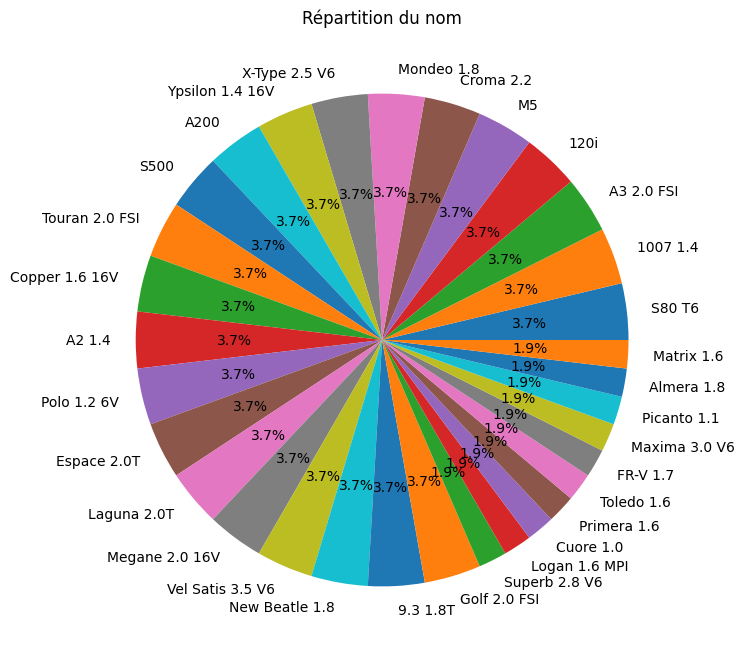

In [13]:
# Camembert pour une seule variable catégorielle
plt.figure(figsize=(8, 8))
catalogue_data['resultat_catalogue_co2.marque'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition de la marque")
plt.ylabel("")
plt.show()



# Camembert pour une seule variable catégorielle
plt.figure(figsize=(8, 8))
catalogue_data['resultat_catalogue_co2.nom'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition du nom")
plt.ylabel("")
plt.show()

Parmi les données de la DataFrame, il est notable que les marques Renault et Volkswagen sont prédominantes dans le catalogue suivi des marques Audi,Mercedes et BMW.

Une matrice de nuages de points sera crée à partir des données numériques stockées dans le DataFrame pour explorer les relations entre les différentes paires de variables.

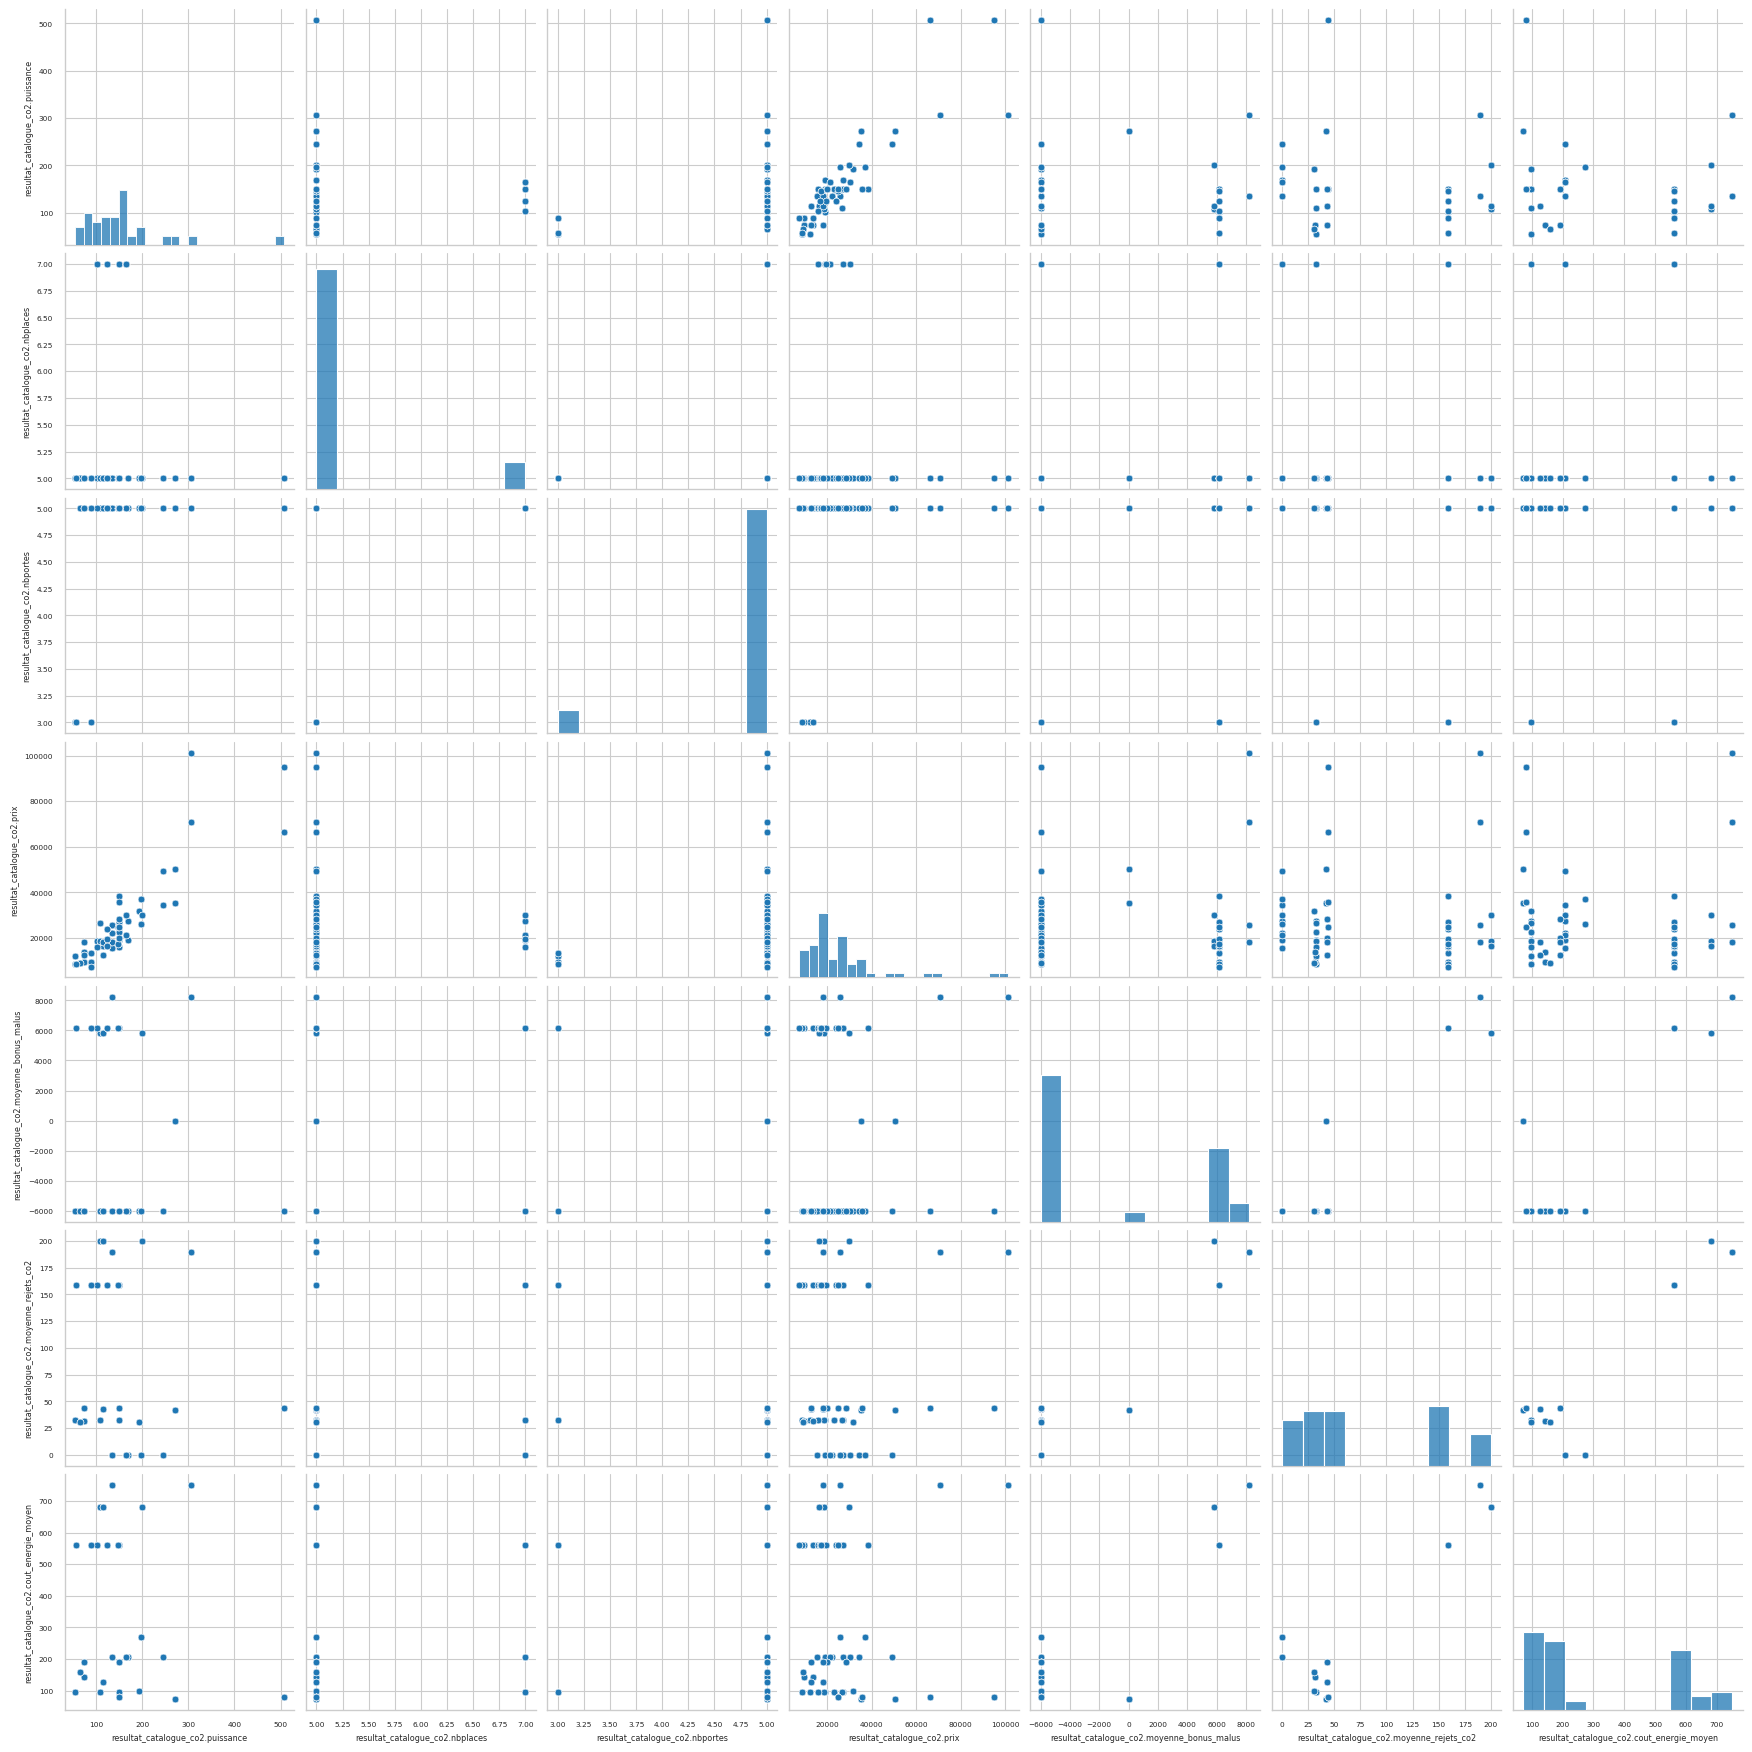

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuster les paramètres de visualisation
sns.set_context("paper", font_scale=0.6)  # Ajuster la taille de police
sns.set_style("whitegrid")  # Choisir un style de fond pour le graphique

# Créer une matrice de nuages de points avec des ajustements de paramètres
sns.pairplot(data=numeric_data)
plt.xticks(rotation=45)  # Rotation des étiquettes des axes x pour éviter le chevauchement
plt.yticks(rotation=45)  # Rotation des étiquettes des axes y pour éviter le chevauchement
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter le chevauchement des sous-graphiques
plt.show()

Nous remarquons qu'il existe une relation linéaire entre la moyenne des rejets de CO2 et le coût de l'énergie, la moyenne des rejets de CO2 et la moyenne du Bonus/Malus, le coût de l'énergie et la moyenne du Bonus/Malus, ainsi qu'une linéarité très forte entre la puissance et le prix.

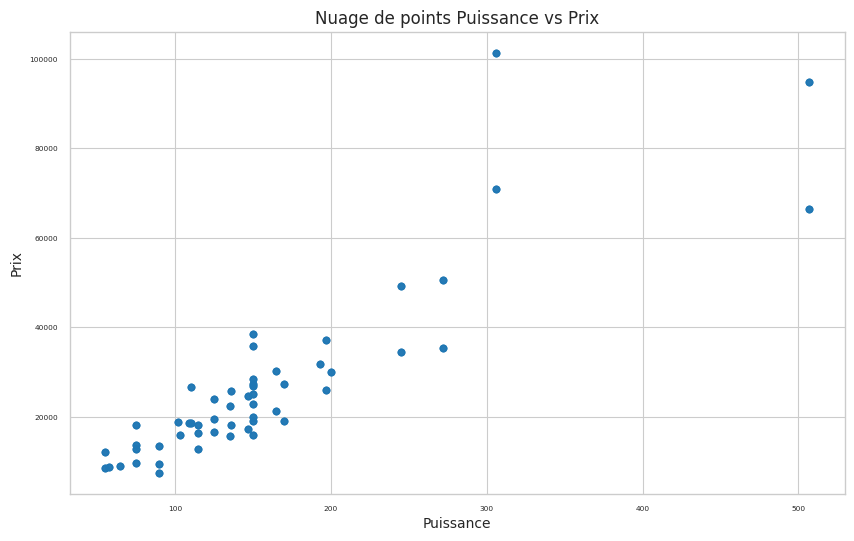

In [9]:
# Nuages de points pour explorer les relations entre les variables continues
import numpy as np

# Ajouter un jitter aux données
puissance = catalogue_data['resultat_catalogue_co2.puissance']
prix = catalogue_data['resultat_catalogue_co2.prix']
plt.figure(figsize=(10, 6))
plt.scatter(puissance, prix, alpha=0.5)
plt.xlabel('Puissance')
plt.ylabel('Prix')
plt.title('Nuage de points Puissance vs Prix')
plt.grid(True)
plt.show()

Le nuage de points illustre la relation entre la puissance et le prix des véhicules dans notre ensemble de données. Nous observons une tendance linéaire générale, indiquant que les véhicules plus puissants tendent à avoir un prix plus élevé. Cependant, nous notons la présence de trois points éloignés du regroupement principal, représentant des véhicules à la fois puissants et coûteux. Ces points pourraient correspondre à des cas exceptionnels, tels que des véhicules de luxe ou de haute performance.

- Création d'une heatmap (carte de chaleur) afin de visualiser la matrice de corrélation entre les variables numériques dans l'ensemble de données.

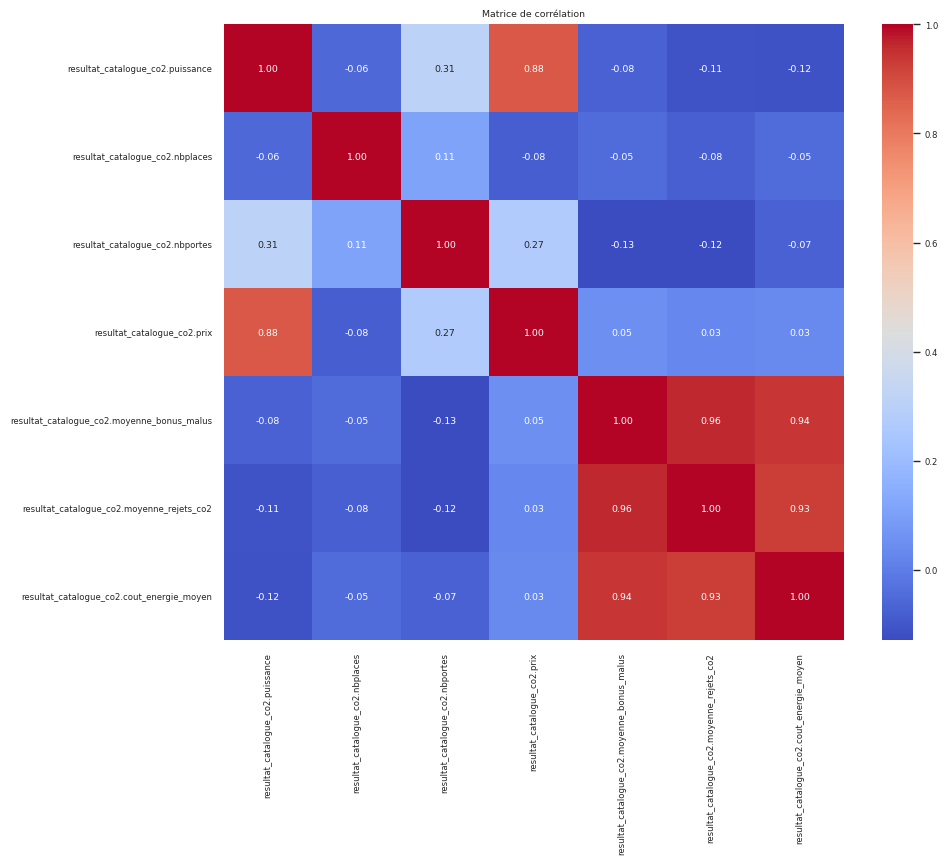

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation uniquement pour les variables numériques
correlation_matrix = numeric_data.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

On a constaté les résultats suivants très intéressants:

    
Puissance et Prix :
Nous observons une corrélation positive très forte de 0.88 entre la puissance des véhicules et leur prix. Cette corrélation suggère que les véhicules plus puissants ont tendance à avoir des prix plus élevés. Ceci est cohérent avec l'intuition générale selon laquelle les véhicules dotés de plus de puissance et de performances ont tendance à être plus chers sur le marché.

Coût énergétique et Bonus/Malus :
Une corrélation très élevée de 0.94 est observée entre le coût énergétique des véhicules et leur système de bonus/malus. Cette corrélation logique suggère que les véhicules qui consomment plus d'énergie ont tendance à être associés à des valeurs de bonus/malus plus élevées, ce qui peut refléter une politique de taxation basée sur les émissions de CO2 et la consommation de carburant.

Coût énergétique et Moyenne des rejets de CO2 :
Nous observons également une corrélation élevée de 0.93 entre le coût énergétique des véhicules et leur moyenne de rejets de CO2. Cette corrélation met en évidence le lien entre la consommation de carburant et les émissions de CO2, ce qui est crucial dans le contexte de la réduction des émissions de gaz à effet de serre et de la promotion de véhicules plus écologiques.

Moyenne des rejets de CO2 et Bonus/Malus :
Une corrélation très forte de 0.96 est observée entre la moyenne des rejets de CO2 et le système de bonus/malus. Cette corrélation suggère que les véhicules émettant davantage de CO2 sont généralement soumis à des valeurs de bonus/malus plus élevées, ce qui peut être une incitation financière à réduire les émissions de CO2 des véhicules.

In [ ]:
# Statistiques descriptives
print(catalogue_data.describe())

       resultat_catalogue_co2.puissance  resultat_catalogue_co2.nbplaces  \
count                        270.000000                       270.000000   
mean                         157.592593                         5.222222   
std                           90.551289                         0.629707   
min                           55.000000                         5.000000   
25%                          109.000000                         5.000000   
50%                          147.000000                         5.000000   
75%                          170.000000                         5.000000   
max                          507.000000                         7.000000   

       resultat_catalogue_co2.nbportes  resultat_catalogue_co2.prix  \
count                       270.000000                   270.000000   
mean                          4.814815                 26668.055556   
std                           0.580798                 19050.121112   
min                           3

D'après l'analyse statistique descriptive précédente du DataFrame "resultat_catalogue_co2", nous en tirons les conclusions suivantes :

- "puissance" : La puissance moyenne des voitures est de 157.59 chevaux, avec un écart-type de 90.55. La puissance varie de 55 à 507 chevaux, avec des quartiles à 109, 147 et 170 chevaux pour le 25e, 50e et 75e percentiles respectivement.
- "nbplaces" : Le nombre moyen de places dans les voitures est de 5.22, avec un écart-type de 0.63. Le nombre de places varie de 5 à 7.
- "nbportes" : Le nombre moyen de portes est de 4.81, avec un écart-type de 0.58. Toutes les voitures ont au moins 3 portes et au plus 5.
- "prix" : Le prix moyen des voitures est de 26 668.06 unités, avec un écart-type de 19 050.12. Le prix varie de 7 500 à 101 300 unités, avec des quartiles à 16 029, 20 597 et 30 000 unités pour le 25e, 50e et 75e percentiles respectivement.
- "moyenne_bonus_malus" : La moyenne du bonus/malus est de -1145.54, avec un écart-type de 6009.92. Elle varie de -6000 à 8237.36
- "moyenne_rejets_co2" : La moyenne des rejets de CO2 est de 80.13, avec un écart-type de 71.98. Elle varie de 0 à 200.
- "cout_energie_moyen" : Le coût moyen de l'énergie est de 320.95 unités, avec un écart-type de 237.28. Il varie de 72.73 à 749.98 unités.


Cette analyse statistique confirme les conclusions précédentes et offre une vue d'ensemble des variables contenues dans le DataFrame du catalogue.

In [ ]:
# Vérifier s'il y a des lignes en double
duplicates = catalogue_data[catalogue_data.duplicated()]
print("Lignes en double :\n", duplicates)

Lignes en double :
 Empty DataFrame
Columns: [resultat_catalogue_co2.marque, resultat_catalogue_co2.nom, resultat_catalogue_co2.puissance, resultat_catalogue_co2.longueur, resultat_catalogue_co2.nbplaces, resultat_catalogue_co2.nbportes, resultat_catalogue_co2.couleur, resultat_catalogue_co2.occasion, resultat_catalogue_co2.prix, resultat_catalogue_co2.moyenne_bonus_malus, resultat_catalogue_co2.moyenne_rejets_co2, resultat_catalogue_co2.cout_energie_moyen]
Index: []


In [ ]:
# Traitement des valeurs manquantes
missing_values = catalogue_data.isnull().sum()
print("Valeurs manquantes :\n", missing_values)

Valeurs manquantes :
 resultat_catalogue_co2.marque                 0
resultat_catalogue_co2.nom                    0
resultat_catalogue_co2.puissance              0
resultat_catalogue_co2.longueur               0
resultat_catalogue_co2.nbplaces               0
resultat_catalogue_co2.nbportes               0
resultat_catalogue_co2.couleur                0
resultat_catalogue_co2.occasion               0
resultat_catalogue_co2.prix                   0
resultat_catalogue_co2.moyenne_bonus_malus    0
resultat_catalogue_co2.moyenne_rejets_co2     0
resultat_catalogue_co2.cout_energie_moyen     0
dtype: int64


Nous pouvons conclure que le DataFrame ne contient pas d'occurrences ni de valeurs manquantes, ce qui le rend prêt à être étudié plus en détail afin de déduire les catégories possibles de véhicules à partir de ce DataFrame.

## Identification des catégories de véhicules :

- Prétraitement des données :     
Transformation des variables catégoriques en un format encodé, conversion des variables pertinentes dans un format approprié pour l'analyse, et suppression des colonnes inutiles, afin de préparer les données pour une utilisation dans une approche de Clustering.

In [17]:
import pandas as pd

# Encodez la variable 'couleur' en variables indicatrices
couleur_encoded = pd.get_dummies(catalogue_data['resultat_catalogue_co2.couleur'], prefix='couleur').astype(int)

# Encodez la variable 'longueur' en variables indicatrices
longueur_encoded = pd.get_dummies(catalogue_data['resultat_catalogue_co2.longueur'], prefix='longueur').astype(int)

# Convertir la variable occasion en entiers (0 ou 1)
catalogue_data['resultat_catalogue_co2.occasion'] = catalogue_data['resultat_catalogue_co2.occasion'].astype(int)


# Concaténer toutes les colonnes de catalogue_data avec les encodages
X = pd.concat([catalogue_data, couleur_encoded, longueur_encoded], axis=1)

# Supprimer les colonnes 'resultat_catalogue_co2.longueur' et 'resultat_catalogue_co2.couleur'
X.drop(['resultat_catalogue_co2.marque','resultat_catalogue_co2.nom','resultat_catalogue_co2.longueur', 'resultat_catalogue_co2.couleur'], axis=1, inplace=True)

In [ ]:
print(X.dtypes)

resultat_catalogue_co2.puissance                int64
resultat_catalogue_co2.nbplaces                 int64
resultat_catalogue_co2.nbportes                 int64
resultat_catalogue_co2.occasion                 int64
resultat_catalogue_co2.prix                     int64
resultat_catalogue_co2.moyenne_bonus_malus    float64
resultat_catalogue_co2.moyenne_rejets_co2     float64
resultat_catalogue_co2.cout_energie_moyen     float64
couleur_blanc                                   int64
couleur_bleu                                    int64
couleur_gris                                    int64
couleur_noir                                    int64
couleur_rouge                                   int64
longueur_courte                                 int64
longueur_longue                                 int64
longueur_moyenne                                int64
longueur_très longue                            int64
dtype: object


## Clustering
On utilise l'algorithme K-means pour regrouper les données en clusters pour différentes valeurs de K et visualiser les clusters dans un espace tridimensionnel, ce qui peut aider à avoir une idée sur le nombre optimal de clusters pour les données.

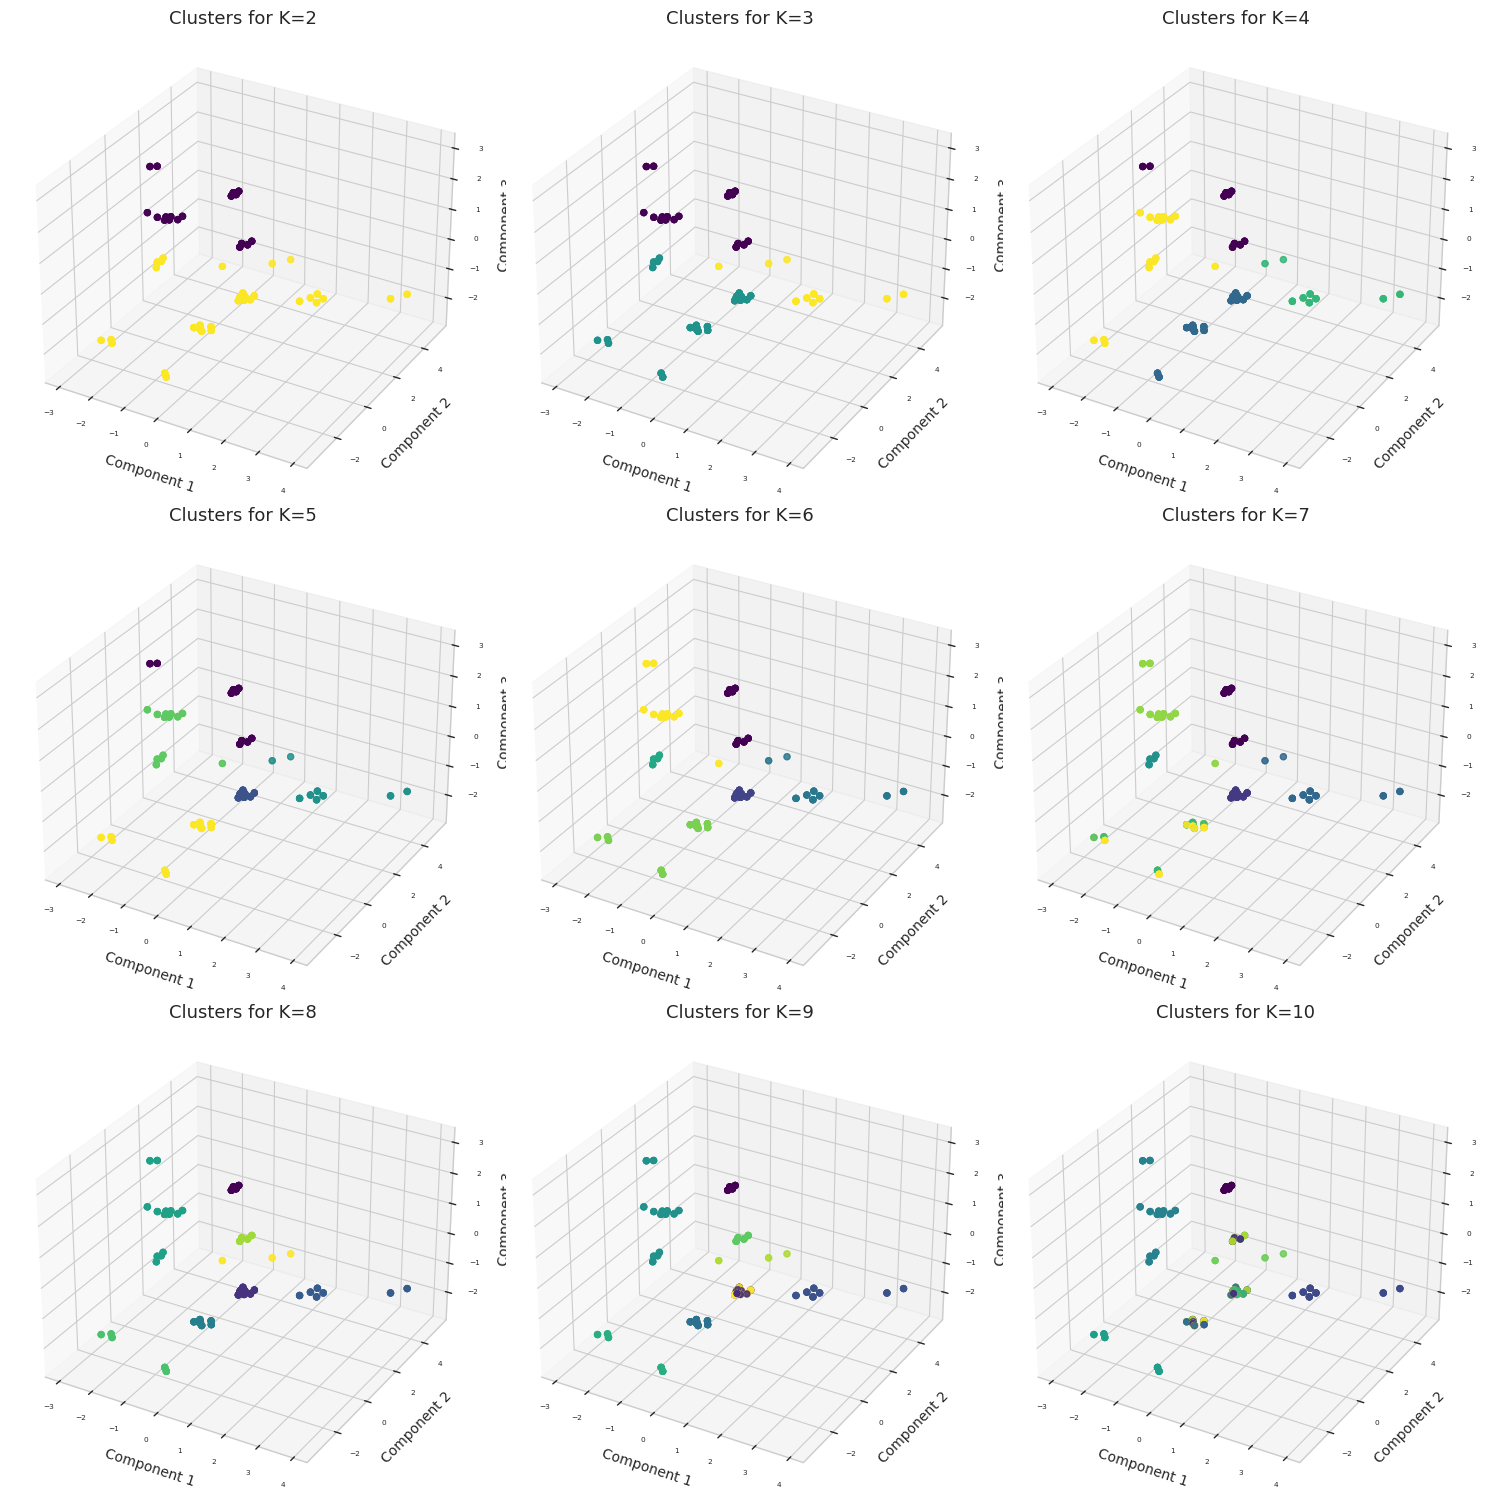

In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Créer une grille de sous-plots pour chaque valeur de K
fig = plt.figure(figsize=(15, 15))
cluster_counts_per_k = []  # Liste pour stocker les nombres d'éléments dans chaque cluster pour chaque valeur de K
for i, k in enumerate(range(2, 11)):
    # Entraîner le modèle K-means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)

     # Calculer le nombre d'éléments pour chaque cluster
    cluster_labels = kmeans.labels_
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    cluster_counts_per_k.append(cluster_counts)

    # Réduire la dimensionnalité des données à 3D pour la visualisation
    pca = PCA(n_components=3)
    data_3d = pca.fit_transform(data_scaled)

    # Visualiser les clusters dans l'espace 3D
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=kmeans.labels_, cmap='viridis')
    ax.set_title(f'Clusters for K={k}',fontsize=13)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

plt.tight_layout()
plt.show()

In [ ]:
# Convertir la liste en DataFrame
cluster_counts_df = pd.DataFrame(cluster_counts_per_k).T
cluster_counts_df.columns = [f'K={k}' for k in range(2, 11)]

# Remplacer NaN par une chaîne vide
cluster_counts_df = cluster_counts_df.fillna('')


# Afficher le tableau
print("Nombre d'éléments pour chaque cluster pour chaque valeur de K :")
cluster_counts_df

Nombre d'éléments pour chaque cluster pour chaque valeur de K :


K=2    K=3   K=4   K=5   K=6   K=7   K=8   K=9  K=10
0   90.0   90.0  50.0  50.0  40.0  40.0  20.0  20.0  20.0
1  180.0  130.0  95.0  50.0  50.0  50.0  50.0  25.0  21.0
2          50.0  45.0  45.0  45.0  45.0  35.0  35.0  35.0
3                80.0  65.0  20.0  20.0  35.0  35.0  21.0
4                      60.0  60.0  33.0  70.0  70.0  70.0
5                            55.0  55.0  25.0  25.0  25.0
6                                  27.0  20.0  20.0  21.0
7                                        15.0  15.0  15.0
8                                              25.0  21.0
9                                                    21.0

À première vue, il semble qu'un nombre de clusters K compris entre 5 et 6 pourrait être intéressant pour diviser nos données en groupes distincts, mais cela nécessite une vérification à travers d'autres méthodes.

### La méthode du coude

- Yellowbrick est une bibliothèque Python qui facilite la visualisation de données et tsouvent utilisée en conjonction avec d'autres bibliothèques d'apprentissage automatique telles que scikit-learn pour explorer et comprendre les données, évaluer les modèles et diagnostiquer les problèmes.

In [ ]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


L'etape suivante est de faire :
- Importation des bibliothèques : Les bibliothèques nécessaires, notamment scikit-learn pour l'algorithme KMeans, StandardScaler pour la normalisation des données, et KElbowVisualizer de Yellowbrick pour la visualisation du coude, sont importées.

- Normalisation des données : Les données sont normalisées à l'aide de la classe StandardScaler de scikit-learn, ce qui permet de mettre à l'échelle les variables pour qu'elles aient une moyenne nulle et une variance unitaire.

- Création de l'instance de KMeans : Une instance de l'algorithme KMeans est créée sans spécifier le nombre de clusters. Ce sera l'algorithme utilisé pour trouver le nombre optimal de clusters.

- Création du visualiseur de coude : Un objet KElbowVisualizer est créé en utilisant l'instance de KMeans et en spécifiant une plage de valeurs pour K (nombre de clusters) à tester, dans ce cas de 2 à 10 clusters.

- Ajustement du visualiseur : Le visualiseur est ajusté sur les données normalisées à l'aide de la méthode fit(). Cela permet au visualiseur de calculer les valeurs du critère de performance pour chaque valeur de K.

- Affichage du graphique : Enfin, le graphique du coude est affiché à l'aide de la méthode show() du visualiseur. Ce graphique montre la valeur du critère de performance (par défaut, WCSS - Within-Cluster Sum of Squares) en fonction du nombre de clusters (K), ce qui permet de sélectionner visuellement le nombre optimal de clusters en cherchant le coude dans la courbe.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer  # Assurez-vous que cette ligne est présente
#par defaut se base sur le WCSS
# Créer une instance de KMeans pour chaque valeur de K à tester

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

model12 = KMeans()
visualizer = KElbowVisualizer(model12, k=(2,11))

# Ajuster le visualiseur sur les données normalisées
visualizer.fit(data_scaled)

# Afficher le graphique
visualizer.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

L'objectif est de trouver le point où la décroissance de la performance ralentit, formant ainsi un "coude" dans le graphique. Ce point est généralement considéré comme le nombre optimal de clusters, car il capture la meilleure balance entre la complexité du modèle (plus de clusters) et sa capacité à expliquer les données (moins de dispersion intra-cluster).C'est le point où l'ajout de clusters supplémentaires n'apporte pas une amélioration significative de la performance du modèle.

l'axe des x représente le nombre de clusters (K), tandis que l'axe des y représente le critère de performance. Par défaut, ce critère est la distorsion (inertie) intra-cluster, également appelée WCSS (Within-Cluster Sum of Squares). La distorsion mesure la compacité des clusters, c'est-à-dire à quel point les points sont proches du centre de leur cluster respectif. Plus la distorsion est faible, plus les clusters sont compacts et cohérents.

"elbow at k=5": le coude (l'inflection) dans la courbe de distorsion se trouve à K=5, Cela suggère que l'ajout de plus de clusters après k=5 n'apporte pas autant de réduction significative de la distorsion intra-cluster. Par conséquent, k=5 est considéré comme le nombre optimal de clusters pour vos données, car il représente un compromis entre la complexité du modèle et la réduction de la distorsion intra-cluster.


"score=2618.3" indique la valeur de la distorsion (ou WCSS) associée à ce nombre de clusters. c'est la somme des carrés des distances des points à leurs centres de cluster respectifs, ce qui donne une indication de la cohésion interne des clusters. Une valeur plus basse indique des clusters plus compacts et donc une meilleure adéquation des données au sein des clusters. On a les points à l'intérieur de chaque cluster sont plus proches les uns des autres, ce qui est souhaitable dans une bonne partition de clustering.

### La méthode de la silhouette
On dessine un graphique qui permet de visualiser la cohésion et la séparation des clusters pour différentes valeurs de K, en identifiant le nombre optimal de clusters où le score de silhouette est maximisé.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

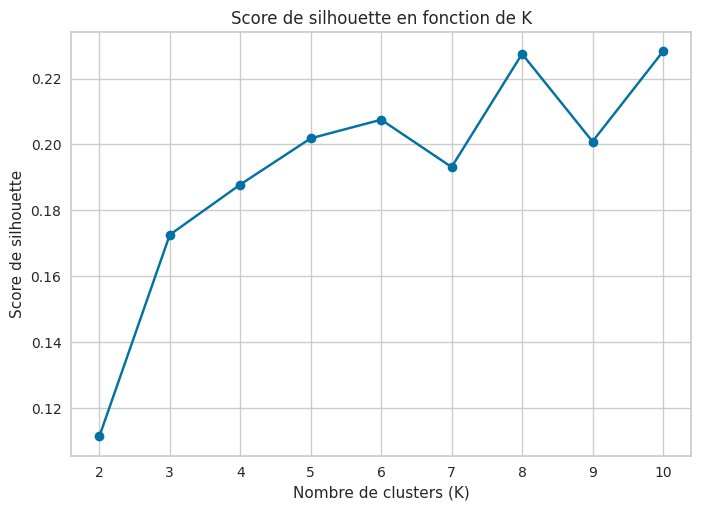

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Calculer le score de silhouette pour différentes valeurs de K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphe du score de silhouette par rapport à k
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K')
plt.xticks(np.arange(2, 11, step=1))
plt.grid(True)
plt.show()


D'après la méthode de la silhouette, le plus grand pic correspond à k=8, tandis que selon la méthode du coude, elle indique un k=5. 

À la lumière de ces résultats, nous pouvons affirmer que le choix optimal pour le nombre de clusters se situe probablement entre k=5 et k=8. En examinant attentivement les graphiques précédents qui présentent les clusters dans un espace tridimensionnel, pour chaque valeur de k, nous constatons que les configurations k=8 et k=7 ne parviennent pas à offrir une séparation claire et distincte des clusters. Nous avons observé une certaine superposition et un chevauchement entre les clusters, ce qui suggère une ambiguïté dans la structure des données à ces valeurs de k.
En revanche, pour k=5 et k=6, nous avons constaté une meilleure séparation des clusters, avec des distances plus nettes entre eux. Cette cohérence dans la séparation des clusters indique une structuration plus claire et une représentation plus fidèle des groupes sous-jacents dans les données. Ainsi, en prenant en compte ces observations et en cherchant à obtenir une interprétation robuste et significative des clusters, nous considéront les valeurs de k=5 ou k=6 comme les choix les plus appropriés pour la segmentation des données.

## Clustering des données avec n_clusters = 5
à l'aide de l'algorithme K-means et visualisation des clusters dans un espace tridimensionnel et nuage de points après réduction de dimensionnalité avec l'analyse en composantes principales (ACP).

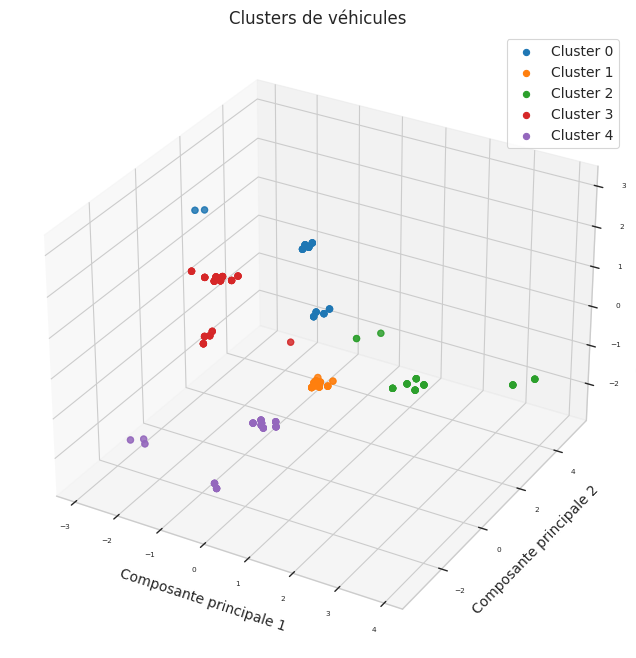

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Définir le nombre de clusters
n_clusters = 5

# Initialiser l'objet KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Ajuster le modèle de clustering KMeans aux données
kmeans.fit(data_scaled)

# Obtenir les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Obtenir les étiquettes des clusters pour chaque point de données
cluster_labels = kmeans.labels_


# Réduction de dimensionnalité avec l'ACP
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

# Créer la visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plots pour chaque cluster
for cluster_label in range(n_clusters):
    ax.scatter(X_pca[cluster_labels == cluster_label, 0], X_pca[cluster_labels == cluster_label, 1], X_pca[cluster_labels == cluster_label, 2], label=f'Cluster {cluster_label}')

ax.set_title('Clusters de véhicules')
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')

ax.legend()


plt.show()

In [ ]:
# Réduction de dimensionnalité avec l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Création du nuage de points avec les clusters comme étiquettes
plt.figure(figsize=(10, 8))
for cluster_label in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == cluster_label, 0], X_pca[cluster_labels == cluster_label, 1], label=f'Cluster {cluster_label}')

plt.title('Clusters de véhicules')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

Le code suivant permet de calculer le nombre d'éléments appartenant à chaque cluster, fournissant ainsi une information supplémentaire sur la répartition des clusters.

In [ ]:
# Créer un DataFrame avec les données des véhicules et les étiquettes des clusters
data_with_clusters = pd.DataFrame({'Cluster': cluster_labels})  # Remplacez cluster_labels par vos étiquettes de cluster
data_with_clusters = pd.concat([data_with_clusters, pd.DataFrame(X, columns=X.columns)], axis=1)  # Remplacez X par vos données et X.columns par les noms de colonnes correspondants

# Calculer le nombre d'éléments pour chaque cluster
cluster_counts = data_with_clusters['Cluster'].value_counts()

# Afficher le nombre d'éléments pour chaque cluster
print("Nombre d'éléments pour chaque cluster :")
print(cluster_counts)

Nombre d'éléments pour chaque cluster :
Cluster
3    65
4    60
0    50
1    50
2    45
Name: count, dtype: int64


- On crée un DataFrame contenant les données des véhicules ainsi que les étiquettes des clusters assignées à chaque véhicule, On calcule les statistiques descriptives pour chaque cluster, telles que la moyenne, l'écart-type, les quartiles, etc pour chaque colonne du DataFrame et ce pour examiner les caractéristiques spécifiques de chaque cluster et comprendre comment les variables se comportent au sein de chaque groupe.

In [ ]:
import pandas as pd

# Créer un DataFrame avec les données des véhicules et les étiquettes des clusters
data_with_clusters = pd.DataFrame({'Cluster': cluster_labels})
data_with_clusters = pd.concat([data_with_clusters, pd.DataFrame(X, columns=X.columns)], axis=1)

# Calculer les statistiques descriptives pour chaque cluster
cluster_stats = data_with_clusters.groupby('Cluster').describe()

# Boucle sur les colonnes du DataFrame
for col in cluster_stats.columns.levels[0]:
    print(f"Colonne : {col}")
    # Afficher les informations pour chaque colonne
    for cluster_label in range(n_clusters):
        print(f"Cluster {cluster_label}:")
        print(cluster_stats[col].loc[cluster_label].to_string())
        print("\n")




Colonne : resultat_catalogue_co2.puissance
Cluster 0:
count     50.000000
mean     159.200000
std       27.949663
min      103.000000
25%      150.000000
50%      165.000000
75%      170.000000
max      197.000000


Cluster 1:
count     50.000000
mean     139.000000
std       15.779087
min      110.000000
25%      135.000000
50%      150.000000
75%      150.000000
max      150.000000


Cluster 2:
count     45.000000
mean     317.000000
std      107.785562
min      193.000000
25%      245.000000
50%      272.000000
75%      306.000000
max      507.000000


Cluster 3:
count     65.000000
mean     133.230769
std       26.975550
min       90.000000
25%      115.000000
50%      136.000000
75%      147.000000
max      200.000000


Cluster 4:
count     60.000000
mean      78.583333
std       19.925532
min       55.000000
25%       63.250000
50%       75.000000
75%       90.000000
max      115.000000


Colonne : resultat_catalogue_co2.nbplaces
Cluster 0:
count    50.000000
mean      6.200000
s

Un nouveau DataFrame est créé en combinant les étiquettes des clusters avec les données des véhicules. Cela permet d'associer chaque ligne de données à son cluster correspondant.

Calcul des statistiques descriptives pour chaque cluster : En utilisant groupby, les données sont regroupées par cluster, puis des statistiques descriptives telles que la moyenne, l'écart-type, le minimum, le maximum et les quartiles sont calculées pour chaque colonne de données.

Boucle sur les colonnes du DataFrame est utilisée pour parcourir chaque colonne du DataFrame contenant les statistiques descriptives. Pour chaque colonne, les informations sont affichées pour chaque cluster, montrant les statistiques descriptives spécifiques pour cette colonne dans chaque cluster.

D'après les résultats, on peut déduire les interpétations suivantes :

- Cluster 0: Familiale

Les voitures de ce cluster sont principalement associées au type familial. Elles offrent une puissance moyenne élevée de 159.2 chevaux et un nombre de places moyen élevé de 6.2, avec une configuration typique de 5 portes. Environ 40% de ces voitures sont d'occasion, indiquant une certaine préférence pour le marché de l'occasion. Avec un prix moyen élevé de 24 306,30 €, ces véhicules sont souvent accompagnés d'un bonus-malus moyen négatif de -3572,55, ce qui pourrait refléter une tendance vers des moteurs plus puissants. De plus, ces voitures présentent une moyenne de rejets de CO2 de 38,26 g/km et un coût moyen de l'énergie élevé, suggérant une certaine attention à l'efficacité énergétique. Les couleurs dominantes sont le blanc, le bleu, le gris, le noir et le rouge, avec une longueur majoritairement longue, offrant ainsi un espace généreux pour les familles.

- Cluster 1: Compacte

Ce cluster est associé aux voitures compactes, offrant une puissance moyenne modérée de 139 chevaux. Elles sont conçues pour accueillir en moyenne 5 personnes avec une configuration typique de 5 portes. Environ la moitié de ces voitures sont d'occasion, ce qui suggère une certaine accessibilité sur le marché de l'occasion. Avec un prix moyen modéré de 23 150,40 € et un bonus-malus moyen négatif de -6000, ces véhicules offrent un bon équilibre entre prix et performances. De plus, ils affichent une moyenne de rejets de CO2 modérée de 30,60 g/km et un coût moyen de l'énergie modéré de 134,03 €. Les couleurs dominantes sont le blanc, le bleu, le gris, le noir et le rouge, avec une longueur majoritairement courte, idéale pour la conduite en ville.

- Cluster 2: Sportive

Ce cluster est associé aux voitures sportives, offrant une puissance moyenne très élevée de 317 chevaux. Elles sont conçues pour accueillir en moyenne 5 personnes avec une configuration typique de 5 portes. Près de 44,44% de ces voitures sont d'occasion, malgré un prix moyen très élevé de 59 405,56 €, ce qui indique une certaine demande pour des voitures de sport sur le marché de l'occasion. Avec un bonus-malus moyen négatif de -1502,81, ces véhicules sont souvent associés à des performances élevées. Cependant, ils présentent également une moyenne de rejets de CO2 élevée de 64,75 g/km et un coût moyen de l'énergie élevé de 257,48 €. Les couleurs dominantes sont le blanc, le bleu, le gris, le noir et le rouge, avec une longueur majoritairement courte, soulignant leur nature sportive et compacte.

- Cluster 3: Économique

Les voitures de ce cluster sont principalement associées au type économique. Elles offrent une puissance moyenne modérée de 133,23 chevaux et sont conçues pour accueillir en moyenne 5 personnes avec une configuration typique de 5 portes. Environ 30,77% de ces voitures sont d'occasion, ce qui suggère une certaine demande pour des voitures économiques sur le marché de l'occasion. Avec un prix moyen modéré de 21 837,38 € et un bonus-malus moyen positif de 6383,06, ces véhicules offrent un bon rapport qualité-prix. Cependant, ils affichent une moyenne de rejets de CO2 élevée de 172,85 g/km et un coût moyen de l'énergie élevé de 618,10 €. Les couleurs dominantes sont le blanc, le bleu, le gris, le noir et le rouge, avec une longueur majoritairement courte, soulignant leur nature économique et polyvalente.

- Cluster 4: Citadine

Les voitures de ce cluster sont principalement associées au type citadine. Elles offrent une puissance moyenne basse de 78,58 chevaux et sont conçues pour accueillir en moyenne 5 personnes avec une configuration typique de 4 portes. Environ 41,67% de ces voitures sont d'occasion, offrant ainsi une certaine accessibilité sur le marché de l'occasion. Avec un prix moyen bas de 12 247,67 € et un bonus-malus moyen négatif de -2965,69, ces véhicules sont idéaux pour une conduite en ville. De plus, ils affichent une moyenne de rejets de CO2 modérée de 67,37 g/km et un coût moyen de l'énergie modéré de 246,47 €. Les couleurs dominantes sont le blanc, le bleu, le gris, le noir et le rouge, avec une longueur majoritairement moyenne, adaptée à la conduite urbaine.

## Clustering des données avec n_clusters = 6

Visualisation des clusters dans un espace tridimensionnel :

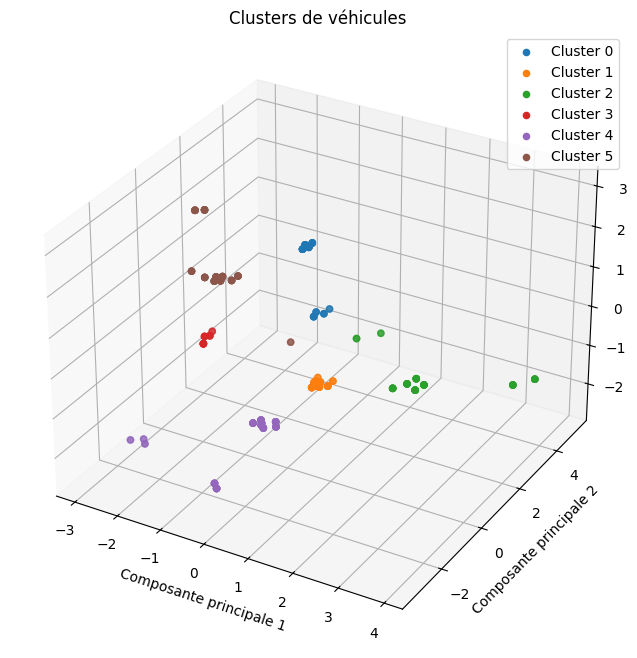

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Définir le nombre de clusters
n_clusters = 6

# Initialiser l'objet KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Ajuster le modèle de clustering KMeans aux données
kmeans.fit(data_scaled)

# Obtenir les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Obtenir les étiquettes des clusters pour chaque point de données
cluster_labels = kmeans.labels_


# Réduction de dimensionnalité avec l'ACP
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

# Créer la visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plots pour chaque cluster
for cluster_label in range(n_clusters):
    ax.scatter(X_pca[cluster_labels == cluster_label, 0], X_pca[cluster_labels == cluster_label, 1], X_pca[cluster_labels == cluster_label, 2], label=f'Cluster {cluster_label}')

ax.set_title('Clusters de véhicules')
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')

ax.legend()

plt.show()

Calculer le nombre d'éléments appartenant à chaque cluster :

In [ ]:
# Créer un DataFrame avec les données des véhicules et les étiquettes des clusters
data_with_clusters = pd.DataFrame({'Cluster': cluster_labels})  # Remplacez cluster_labels par vos étiquettes de cluster
data_with_clusters = pd.concat([data_with_clusters, pd.DataFrame(X, columns=X.columns)], axis=1)  # Remplacez X par vos données et X.columns par les noms de colonnes correspondants

# Calculer le nombre d'éléments pour chaque cluster
cluster_counts = data_with_clusters['Cluster'].value_counts()

# Afficher le nombre d'éléments pour chaque cluster
print("Nombre d'éléments pour chaque cluster :")
print(cluster_counts)

Nombre d'éléments pour chaque cluster :
Cluster
4    60
5    55
1    50
2    45
0    40
3    20
Name: count, dtype: int64


-  On calcule les statistiques descriptives pour chaque cluster et on examine ses caractéristiques spécifiques :

In [ ]:
import pandas as pd

# Créer un DataFrame avec les données des véhicules et les étiquettes des clusters
data_with_clusters = pd.DataFrame({'Cluster': cluster_labels})
data_with_clusters = pd.concat([data_with_clusters, pd.DataFrame(X, columns=X.columns)], axis=1)

# Calculer les statistiques descriptives pour chaque cluster
cluster_stats = data_with_clusters.groupby('Cluster').describe()

# Boucle sur les colonnes du DataFrame
for col in cluster_stats.columns.levels[0]:
    print(f"Colonne : {col}")
    # Afficher les informations pour chaque colonne
    for cluster_label in range(n_clusters):
        print(f"Cluster {cluster_label}:")
        print(cluster_stats[col].loc[cluster_label].to_string())
        print("\n")




Colonne : resultat_catalogue_co2.puissance
Cluster 0:
count     40.000000
mean     170.500000
std       17.194215
min      150.000000
25%      161.250000
50%      167.500000
75%      176.750000
max      197.000000


Cluster 1:
count     50.000000
mean     139.000000
std       15.779087
min      110.000000
25%      135.000000
50%      150.000000
75%      150.000000
max      150.000000


Cluster 2:
count     45.000000
mean     317.000000
std      107.785562
min      193.000000
25%      245.000000
50%      272.000000
75%      306.000000
max      507.000000


Cluster 3:
count     20.000000
mean     119.250000
std       19.431052
min       90.000000
25%      108.750000
50%      125.500000
75%      136.000000
max      136.000000


Cluster 4:
count     60.000000
mean      78.583333
std       19.925532
min       55.000000
25%       63.250000
50%       75.000000
75%       90.000000
max      115.000000


Cluster 5:
count     55.000000
mean     134.818182
std       27.304247
min      102.000000
2


- Choix du nombre de clusters optimal  :

Choisir cinq clusters plutôt que six peut être une décision  pour simplifier l'analyse et interprétation des données. En réduisant le nombre de clusters, on évite la complexité excessive et les chevauchements entre les groupes, ce qui facilite la distinction et l'affectation des données. Avec cinq clusters, chaque groupe peut être plus distinct et représentatif d'un profil spécifique, ce qui facilite leur interprétation et leur utilisation dans la prise de décision.


En revanche, choisir six clusters peut entraîner une division excessive des données, où certains groupes peuvent présenter des similitudes très proches et donc être difficiles à distinguer, comme c'est le cas pour les clusters 3 et 5, qui tous deux relèvent de la catégorie économique selon les résultats des statistiques descriptives. Cela peut rendre l'analyse plus ardue et moins informative, car les différences entre les clusters sont moins significatives. Ainsi, en choisissant cinq clusters, nous privilégions la simplicité et la clarté tout en préservant la pertinence et la représentativité des groupes identifiés.

- On utilise les résultats du clustering pour attribuer des catégories aux véhicules dans un catalogue.

1. Obtention des étiquettes de cluster prédites : Les étiquettes de cluster prédites sont obtenues à partir de l'objet kmeans qui a été ajusté précédemment.

2. Ajout des étiquettes de cluster à la DataFrame : Les étiquettes de cluster prédites sont ajoutées comme une nouvelle colonne nommée 'Cluster' à la DataFrame catalogue_data.

3. Création du dictionnaire pour mapper les numéros de cluster aux types de véhicules : Un dictionnaire est créé pour mapper les numéros de cluster à des catégories de véhicules spécifiques, telles que 'Familiale', 'Prestige', 'Sportive', 'Économique' et 'Citadine'.

4. Ajout de la colonne 'Catégorie' à partir du mapping des clusters : Une nouvelle colonne nommée 'Catégorie' est ajoutée à la DataFrame en utilisant la méthode map() pour mapper les numéros de cluster aux catégories de véhicules correspondantes.

5. Affichage des types de véhicules prédits pour chaque ligne : Les premières lignes de la DataFrame sont imprimées à nouveau, mais cette fois-ci avec une nouvelle colonne 'Catégorie', qui montre la catégorie prédite pour chaque véhicule en fonction de son cluster.

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# Définir le nombre de clusters
n_clusters = 5

# Initialiser l'objet KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajuster le modèle de clustering KMeans aux données
kmeans.fit(data_scaled)

# Obtention des étiquettes de cluster prédites
cluster_labels = kmeans.labels_

# Ajout des étiquettes de cluster à la dataframe
catalogue_data['Cluster'] = cluster_labels

# Création du dictionnaire pour mapper les numéros de cluster aux types de véhicules
cluster_type_mapping = {
    0: 'Familiale',
    1: 'Prestige',
    2: 'Sportive',
    3: 'Économique',
    4: 'Citadine'
}

# Ajout de la colonne 'Type' à partir du mapping des clusters
catalogue_data['Catégorie'] = catalogue_data['Cluster'].map(cluster_type_mapping)

# Affichage des types de véhicules prédits pour chaque ligne
print(catalogue_data[['resultat_catalogue_co2.marque', 'resultat_catalogue_co2.nom', 'Cluster','Catégorie']].head())



  resultat_catalogue_co2.marque resultat_catalogue_co2.nom  Cluster Catégorie
0                         Volvo                     S80 T6        2  Sportive
1                         Volvo                     S80 T6        2  Sportive
2                         Volvo                     S80 T6        2  Sportive
3                         Volvo                     S80 T6        2  Sportive
4                         Volvo                     S80 T6        2  Sportive


- Les données des clients et leurs immatriculations sont extraites à partir du model d'analyse du datalake Hive, puis jointes avec les données du catalogue en utilisant la marque du véhicule.

In [4]:
# Exécution d'une requête SQL
cursor.execute('SELECT * FROM MBDS_Projet.model_immatriculations_clients')

# Récupération des noms de colonnes
columns = [desc[0] for desc in cursor.description]

# Récupération des résultats
results = cursor.fetchall()

# Création d'un DataFrame Pandas avec les résultats et les noms de colonnes
immatriculation_client = pd.DataFrame(results, columns=columns)

immatriculation_client.head()

model_immatriculations_clients.immatriculation  \
0                                        0 BZ 21   
1                                        0 CQ 77   
2                                        0 DQ 29   
3                                        0 JO 29   
4                                        0 NK 32   

  model_immatriculations_clients.marque model_immatriculations_clients.nom  \
0                                  Audi                             A2 1.4   
1                               Peugeot                           1007 1.4   
2                               Peugeot                           1007 1.4   
3                               Renault                   Vel Satis 3.5 V6   
4                                   BMW                                 M5   

   model_immatriculations_clients.puissance  \
0                                        75   
1                                        75   
2                                        75   
3                                       245   
4                                       507   

  model_immatriculations_clients.longueur  \
0                                  courte   
1                                  courte   
2                                  courte   
3                             tres longue   
4                             tres longue   

   model_immatriculations_clients.nbplaces  \
0                                        5   
1                                        5   
2                                        5   
3                                        5   
4                                        5   

   model_immatriculations_clients.nbportes  \
0                                        5   
1                                        5   
2                                        5   
3                                        5   
4                                        5   

  model_immatriculations_clients.couleur  \
0                                   noir   
1                                   noir   
2                                   gris   
3                                   gris   
4                                  blanc   

   model_immatriculations_clients.occasion  \
0                                    False   
1                                     True   
2                                     True   
3                                    False   
4                                    False   

   model_immatriculations_clients.prix  model_immatriculations_clients.age  \
0                                18310                                56.0   
1                                 9625                                27.0   
2                                 9625                                51.0   
3                                49200                                51.0   
4                                94800                                39.0   

  model_immatriculations_clients.sexe  model_immatriculations_clients.taux  \
0                                   M                               1382.0   
1                                   F                                239.0   
2                                   M                                234.0   
3                                   M                                552.0   
4                                   M                                963.0   

  model_immatriculations_clients.situationfamiliale  \
0                                       Célibataire   
1                                       Célibataire   
2                                       Célibataire   
3                                         En Couple   
4                                         En Couple   

   model_immatriculations_clients.nbenfantsacharge  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              1.0   
4                              

In [5]:
merged_data = pd.merge(immatriculation_client, catalogue_data, how='left', left_on='model_immatriculations_clients.marque', right_on='resultat_catalogue_co2.marque')

# Sélectionnez les lignes distinctes en fonction de la colonne 'immatriculation' et conservez toutes les colonnes
merged_data = merged_data.drop_duplicates(subset='model_immatriculations_clients.immatriculation')

# Affichez le résultat
merged_data.head()

model_immatriculations_clients.immatriculation  \
0                                         0 BZ 21   
20                                        0 CQ 77   
30                                        0 DQ 29   
40                                        0 JO 29   
80                                        0 NK 32   

   model_immatriculations_clients.marque model_immatriculations_clients.nom  \
0                                   Audi                             A2 1.4   
20                               Peugeot                           1007 1.4   
30                               Peugeot                           1007 1.4   
40                               Renault                   Vel Satis 3.5 V6   
80                                   BMW                                 M5   

    model_immatriculations_clients.puissance  \
0                                         75   
20                                        75   
30                                        75   
40                                       245   
80                                       507   

   model_immatriculations_clients.longueur  \
0                                   courte   
20                                  courte   
30                                  courte   
40                             tres longue   
80                             tres longue   

    model_immatriculations_clients.nbplaces  \
0                                         5   
20                                        5   
30                                        5   
40                                        5   
80                                        5   

    model_immatriculations_clients.nbportes  \
0                                         5   
20                                        5   
30                                        5   
40                                        5   
80                                        5   

   model_immatriculations_clients.couleur  \
0                                    noir   
20                                   noir   
30                                   gris   
40                                   gris   
80                                  blanc   

    model_immatriculations_clients.occasion  \
0                                     False   
20                                     True   
30                                     True   
40                                    False   
80                                    False   

    model_immatriculations_clients.prix  ...  \
0                                 18310  ...   
20                                 9625  ...   
30                                 9625  ...   
40                                49200  ...   
80                                94800  ...   

    resultat_catalogue_co2.puissance resultat_catalogue_co2.longueur  \
0                                150                         moyenne   
20                                75                          courte   
30                                75                          courte   
40                               245                     très longue   
80                               507                     très longue   

    resultat_catalogue_co2.nbplaces resultat_catalogue_co2.nbportes  \
0                                 5                               5   
20                                5                               5   
30                                5                               5   
40                                5                               5   
80                                5                               5   

    resultat_catalogue_co2.couleur resultat_catalogue_co2.occasion  \
0                             noir                            True   
20                           rouge                            True   
30                           rouge                            True   
40                            gris                            True   
80                      

- Les données sont nettoyées en éliminant les doublons et en supprimant certaines colonnes redondantes, aboutissant ainsi à la création d'un DataFrame final prêt pour une analyse plus poussée.

In [6]:
# Liste des colonnes à supprimer
columns_to_drop = ['resultat_catalogue_co2.longueur','resultat_catalogue_co2.puissance','resultat_catalogue_co2.nbplaces','resultat_catalogue_co2.nbportes','resultat_catalogue_co2.couleur','resultat_catalogue_co2.occasion','resultat_catalogue_co2.prix']

# Supprimer les colonnes spécifiées
merged_data = merged_data.drop(columns=columns_to_drop).reset_index(drop=True)

merged_data

model_immatriculations_clients.immatriculation  \
0                                             0 BZ 21   
1                                             0 CQ 77   
2                                             0 DQ 29   
3                                             0 JO 29   
4                                             0 NK 32   
...                                               ...   
199938                                     9999 GH 10   
199939                                     9999 KX 26   
199940                                     9999 LG 27   
199941                                     9999 NG 65   
199942                                     9999 NQ 33   

       model_immatriculations_clients.marque  \
0                                       Audi   
1                                    Peugeot   
2                                    Peugeot   
3                                    Renault   
4                                        BMW   
...                                      ...   
199938                            Volkswagen   
199939                                  Audi   
199940                              Mercedes   
199941                                  Ford   
199942                               Peugeot   

       model_immatriculations_clients.nom  \
0                                  A2 1.4   
1                                1007 1.4   
2                                1007 1.4   
3                        Vel Satis 3.5 V6   
4                                      M5   
...                                   ...   
199938                        Polo 1.2 6V   
199939                             A2 1.4   
199940                               A200   
199941                         Mondeo 1.8   
199942                           1007 1.4   

        model_immatriculations_clients.puissance  \
0                                             75   
1                                             75   
2                                             75   
3                                            245   
4                                            507   
...                                          ...   
199938                                        55   
199939                                        75   
199940                                       136   
199941                                       125   
199942                                        75   

       model_immatriculations_clients.longueur  \
0                                       courte   
1                                       courte   
2                                       courte   
3                                  tres longue   
4                                  tres longue   
...                                        ...   
199938                                  courte   
199939                                  courte   
199940                                 moyenne   
199941                                  longue   
199942                                  courte   

        model_immatriculations_clients.nbplaces  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        5   
199939                                        5   
199940                                        5   
199941                                        5   
199942                                        5   

        model_immatriculations_clients.nbportes  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938  

- Exploration des données relative aux immatriculations de chaque colonne de la dataframe "merged_data" :

In [41]:
columns=['model_immatriculations_clients.marque','model_immatriculations_clients.nom','model_immatriculations_clients.puissance','model_immatriculations_clients.prix','model_immatriculations_clients.longueur','model_immatriculations_clients.nbplaces','model_immatriculations_clients.nbportes','model_immatriculations_clients.couleur','model_immatriculations_clients.occasion']
# Pour chaque colonne de la DataFrame
for column in columns:
    # Obtenir les valeurs uniques de la colonne
    unique_values = merged_data[column].unique()
    # Afficher les valeurs uniques avec le nom de la colonne
    print(f"Colonnes: {column}")
    print(unique_values)

Colonnes: model_immatriculations_clients.marque
['Audi' 'Peugeot' 'Renault' 'BMW' 'Volkswagen' 'Volvo' 'Jaguar' 'Seat'
 'Ford' 'Saab' 'Mercedes' 'Fiat' 'Skoda' 'Nissan' 'Kia' 'Daihatsu'
 'Lancia' 'Dacia' 'Mini']
Colonnes: model_immatriculations_clients.nom
['A2 1.4' '1007 1.4' 'Vel Satis 3.5 V6' 'M5' 'Megane 2.0 16V'
 'Polo 1.2 6V' 'S80 T6' 'X-Type 2.5 V6' 'Toledo 1.6' 'A3 2.0 FSI'
 'Mondeo 1.8' '120i' '9.3 1.8T' 'S500' 'Croma 2.2' 'Laguna 2.0T'
 'Superb 2.8 V6' 'Maxima 3.0 V6' 'Golf 2.0 FSI' 'Picanto 1.1' 'Almera 1.8'
 'Cuore 1.0' 'Ypsilon 1.4 16V' 'A200' 'Primera 1.6' 'Logan 1.6 MPI'
 'Copper 1.6 16V' 'New Beatle 1.8']
Colonnes: model_immatriculations_clients.puissance
[ 75 245 507 135  55 272 197 102 150 125 306 147 170 193 200  65 115  58
  90 136 109 110]
Colonnes: model_immatriculations_clients.prix
[ 18310   9625  49200  94800  15644  12200  50500  25970  18880  13750
  28500  16730  25060  66360  34440  38600  70910  17346  35350  27300
  31790  37100  19110  30000  24780  2290

- Nous vérifions si les données des immatriculations du modèle d'analyse présentes dans le dataframe "immatriculations_client" sont les mêmes après la jointure avec les données du catalogue dans le dataframe "merged_data", afin de garantir la cohérence des données.

In [42]:
import pandas as pd

# Colonnes spécifiques à sélectionner dans merged_data pour la comparaison
colonnes_a_comparer = ['model_immatriculations_clients.immatriculation','model_immatriculations_clients.marque',	'model_immatriculations_clients.nom',	'model_immatriculations_clients.puissance',	'model_immatriculations_clients.longueur'	,'model_immatriculations_clients.nbplaces'	,'model_immatriculations_clients.nbportes'	,'model_immatriculations_clients.couleur','model_immatriculations_clients.occasion','model_immatriculations_clients.prix']

# Sélectionnez les colonnes spécifiques dans merged_data et immatriculation_client
merged_data_selection = merged_data[colonnes_a_comparer].reset_index(drop=True)
immatriculation_selection = immatriculation_client[colonnes_a_comparer].reset_index(drop=True)

# Comparez les colonnes sélectionnées des deux DataFrames
comparaison = immatriculation_selection.compare(merged_data_selection)

# Comptez le nombre de lignes différentes
nombre_lignes_differentes = len(comparaison)

# Affichez le résultat
print("Nombre de lignes différentes entre les colonnes sélectionnées de immatriculation_client et merged_data :", nombre_lignes_differentes)


# Vérifiez si les deux DataFrames sont égaux
sont_egaux = immatriculation_selection.equals(merged_data_selection)

# Affichez le résultat
print("Les DataFrames immatriculation_client et merged_data sont-ils égaux ?", sont_egaux)


Nombre de lignes différentes entre les colonnes sélectionnées de immatriculation_client et merged_data : 0
Les DataFrames immatriculation_client et merged_data sont-ils égaux ? True


Selon les résultats, nous confirmons que les données des immatriculations du dataframe "merged_data" sont cohérentes avec celles du dataframe "immatriculations_clients". À présent, nous sélectionnons les données d'immatriculation à partir du dataframe "merged_data" dont nous aurons besoin pour appliquer le Clustering à ces données.

In [7]:
import pandas as pd

columns=['model_immatriculations_clients.marque','model_immatriculations_clients.nom','model_immatriculations_clients.puissance','model_immatriculations_clients.prix','model_immatriculations_clients.longueur','model_immatriculations_clients.nbplaces','model_immatriculations_clients.nbportes','model_immatriculations_clients.couleur','model_immatriculations_clients.occasion','resultat_catalogue_co2.moyenne_bonus_malus','resultat_catalogue_co2.moyenne_rejets_co2','resultat_catalogue_co2.cout_energie_moyen']

# Sélectionner les colonnes spécifiées dans merged_data
selected_data = merged_data[columns].reset_index(drop=True)

selected_data

model_immatriculations_clients.marque  \
0                                       Audi   
1                                    Peugeot   
2                                    Peugeot   
3                                    Renault   
4                                        BMW   
...                                      ...   
199938                            Volkswagen   
199939                                  Audi   
199940                              Mercedes   
199941                                  Ford   
199942                               Peugeot   

       model_immatriculations_clients.nom  \
0                                  A2 1.4   
1                                1007 1.4   
2                                1007 1.4   
3                        Vel Satis 3.5 V6   
4                                      M5   
...                                   ...   
199938                        Polo 1.2 6V   
199939                             A2 1.4   
199940                               A200   
199941                         Mondeo 1.8   
199942                           1007 1.4   

        model_immatriculations_clients.puissance  \
0                                             75   
1                                             75   
2                                             75   
3                                            245   
4                                            507   
...                                          ...   
199938                                        55   
199939                                        75   
199940                                       136   
199941                                       125   
199942                                        75   

        model_immatriculations_clients.prix  \
0                                     18310   
1                                      9625   
2                                      9625   
3                                     49200   
4                                     94800   
...                                     ...   
199938                                12200   
199939                                18310   
199940                                25900   
199941                                23900   
199942                                13750   

       model_immatriculations_clients.longueur  \
0                                       courte   
1                                       courte   
2                                       courte   
3                                  tres longue   
4                                  tres longue   
...                                        ...   
199938                                  courte   
199939                                  courte   
199940                                 moyenne   
199941                                  longue   
199942                                  courte   

        model_immatriculations_clients.nbplaces  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        5   
199939                                        5   
199940                                        5   
199941                                        5   
199942                                        5   

        model_immatriculations_clients.nbportes  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        3   
199939                                        5   
199940                    

## Analyse Exploiratoire sur les variables sélectionnées

Procédons de la même manière à l'exploration des données d'immatriculations de la dataframe "merged_data" comme nous l'avons fait pour celles du catalogue.

In [8]:
import matplotlib.pyplot as plt

numeric_data = merged_data[['model_immatriculations_clients.puissance','model_immatriculations_clients.prix','model_immatriculations_clients.nbplaces','model_immatriculations_clients.nbportes','model_immatriculations_clients.occasion','resultat_catalogue_co2.moyenne_bonus_malus','resultat_catalogue_co2.moyenne_rejets_co2','resultat_catalogue_co2.cout_energie_moyen']]

# Effectuer une analyse univariée pour toutes les variables numériques avec une taille de figure plus grande
numeric_data.hist(figsize=(14, 12))
plt.suptitle("Distribution des variables numériques")
plt.show()

Matplotlib created a temporary cache directory at /tmp/matplotlib-59euexdu because the default path (/home/vagrant/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Les interprétations sont similaires à celles des données du catalogue, à l'exception de la puissance qui varie entre 30 et 100 chevaux et d'une moyenne d'émissions de CO2 de 50 g/km.

In [9]:
# Boîtes à moustaches pour les variables continues
numeric_data[['model_immatriculations_clients.prix','resultat_catalogue_co2.moyenne_bonus_malus']].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_11721/840579672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="variable", y="value", data=numeric_data[columns].melt(), palette="muted")


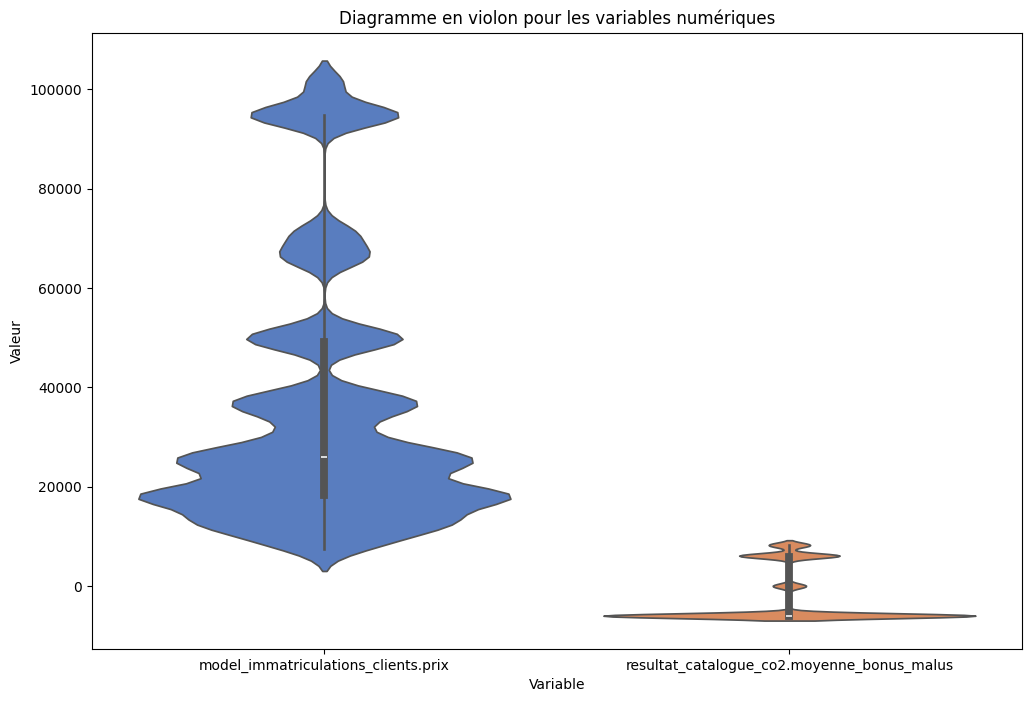

In [10]:
import seaborn as sns
columns=['model_immatriculations_clients.prix','resultat_catalogue_co2.moyenne_bonus_malus']
# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Tracer le diagramme en violon
sns.violinplot(x="variable", y="value", data=numeric_data[columns].melt(), palette="muted")
plt.title("Diagramme en violon pour les variables numériques")
plt.xlabel("Variable")
plt.ylabel("Valeur")
plt.show()

Selon le boxplot et le diagramme en violon, les observations sont les suivantes :

- Pour la colonne "Prix" des immatriculations, le premier quartile est d'environ 19 000 euros, le troisième quartile d'environ 48 000 euros et la médiane de 25 000 euros, avec une plage allant de 10 000 euros (minimum) à 92 000 euros (maximum) 
et une valeur aberrante d'environ 105 000 euros.

- Pour la colonne "Moyenne Bonus-Malus", l'interprétation reste la même que pour les données du catalogue.

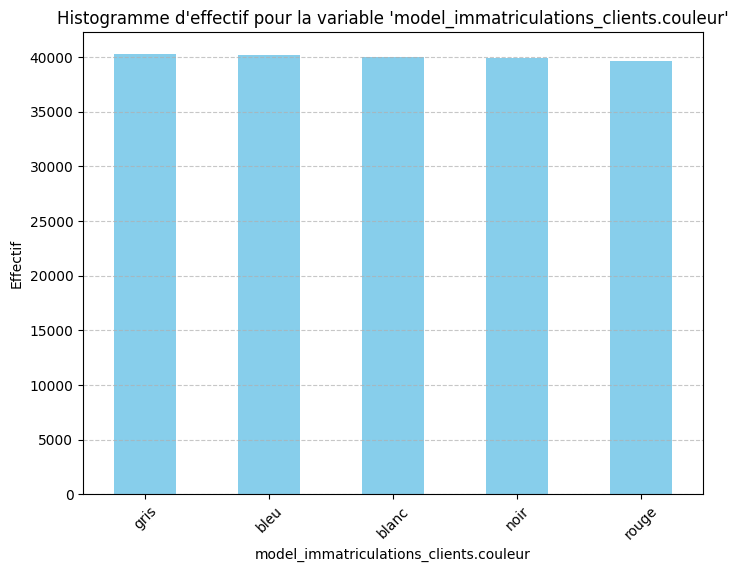

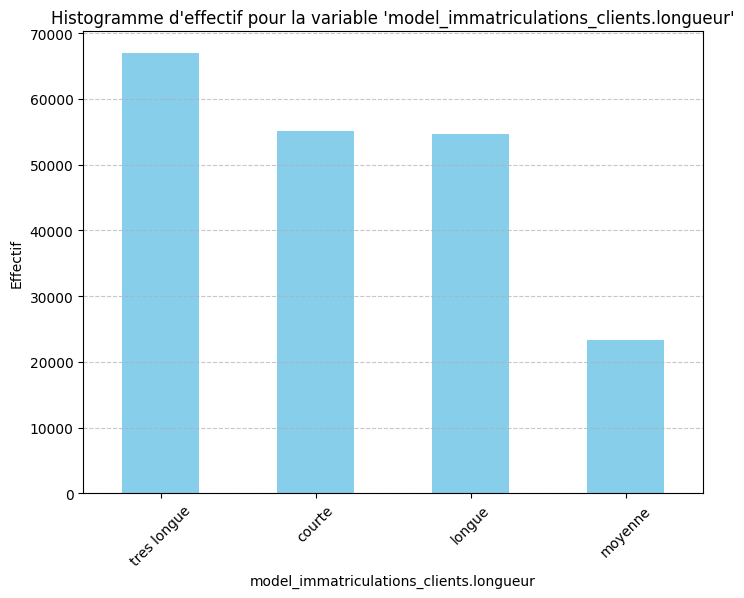

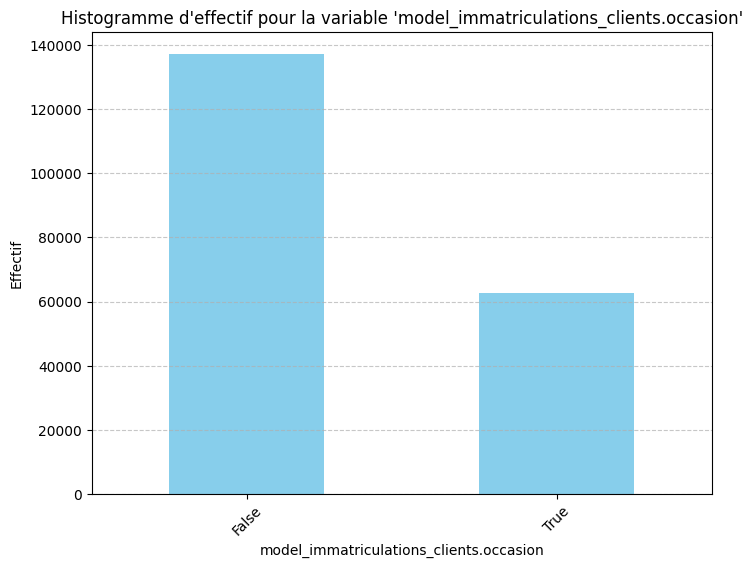

In [ ]:
import matplotlib.pyplot as plt

# Liste des noms de colonnes catégoriques
categorical_columns = ['model_immatriculations_clients.couleur',
                       'model_immatriculations_clients.longueur',
                       'model_immatriculations_clients.occasion']



# Création d'histogrammes d'effectif pour chaque variable catégorique
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    merged_data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Histogramme d'effectif pour la variable '{column}'")
    plt.xlabel(column)
    plt.ylabel("Effectif")
    plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Les résultats indiquent que la plupart des véhicules ont une longueur qualifiée de "très longue" et ne sont pas des véhicules d'occasion.

In [ ]:
# Statistiques descriptives
print(numeric_data.describe())

       model_immatriculations_clients.puissance  \
count                             199943.000000   
mean                                 198.576104   
std                                  136.902069   
min                                   55.000000   
25%                                   75.000000   
50%                                  150.000000   
75%                                  245.000000   
max                                  507.000000   

       model_immatriculations_clients.prix  \
count                        199943.000000   
mean                          35702.849722   
std                           25742.400977   
min                            7500.000000   
25%                           18310.000000   
50%                           25970.000000   
75%                           49200.000000   
max                          101300.000000   

       model_immatriculations_clients.nbplaces  \
count                                 199943.0   
mean                     

En se basant sur ces résultats, nous pouvons tirer les conclusions suivantes :

- La puissance des véhicules immatriculés varie considérablement, allant de 55 à 507 chevaux. La moyenne de puissance est estimée à 198.58 chevaux, avec un écart-type de 136.90. Cela suggère une grande diversité dans la gamme de puissance des véhicules enregistrés.

- Les prix des véhicules immatriculés présentent également une grande variabilité. Le prix minimum observé est de 7 500 euros, tandis que le prix maximum est de 101 300 euros. En moyenne, le prix des véhicules est d'environ 35 702.85 euros, avec un écart-type de 25 742.40 euros.

- Tous les véhicules immatriculés ont cinq places, ce qui suggère une uniformité dans ce domaine. Le nombre moyen de places est également de 5, avec un écart-type de 0, ce qui indique une cohérence dans cette caractéristique des véhicules enregistrés.

- Concernant le nombre de portes, la variation est moindre par rapport à d'autres caractéristiques. Le nombre de portes varie principalement entre 3 et 5, avec une moyenne de 4.87 portes et un écart-type de 0.50. Cela suggère une prédominance des véhicules à 4 ou 5 portes dans l'échantillon.

- La moyenne du bonus-malus se situe autour de -2282.53 euros, avec des valeurs allant de -6000 à 8237.36 euros. Cette large plage de valeurs suggère des politiques de bonus-malus variables pour les véhicules immatriculés. L'écart-type élevé de 5583.56 euros indique une grande dispersion des données autour de la moyenne.
- Les rejets de CO2 présentent également une grande variabilité, avec une moyenne d'environ 66.30 g/km. Les valeurs vont de 0 g/km à 200 g/km, avec un écart-type de 66.44 g/km. Cela suggère des différences significatives dans les niveaux d'émissions de CO2 des véhicules immatriculés.
- Le coût moyen de l'énergie est d'environ 281.44 euros, avec des valeurs comprises entre 72.73 et 749.98 euros. L'écart-type de 221.66 euros suggère une variabilité substantielle dans les coûts associés à l'énergie des véhicules enregistrés.

In [ ]:
# Traitement des valeurs manquantes
missing_values = numeric_data.isnull().sum()
print("Valeurs manquantes :\n", missing_values)

Valeurs manquantes :
 model_immatriculations_clients.puissance      0
model_immatriculations_clients.prix           0
model_immatriculations_clients.nbplaces       0
model_immatriculations_clients.nbportes       0
model_immatriculations_clients.occasion       0
resultat_catalogue_co2.moyenne_bonus_malus    0
resultat_catalogue_co2.moyenne_rejets_co2     0
resultat_catalogue_co2.cout_energie_moyen     0
dtype: int64


Les données d'immatriculations du modèle d'analyse sont complètes, ne présentant aucune valeur manquante, et sont prêtes à être utilisées être appliqué à un modèle K-means de K=5.


### Prétraitement des données pour l'analyse de clustering : Encodage et conversion des variables catégorielles et binaires dans les données sélectionnées


In [11]:
# Encodez la variable 'couleur' en variables indicatrices
couleur_encoded = pd.get_dummies(selected_data['model_immatriculations_clients.couleur'], prefix='couleur').astype(int)

# Encodez la variable 'longueur' en variables indicatrices
longueur_encoded = pd.get_dummies(selected_data['model_immatriculations_clients.longueur'], prefix='longueur').astype(int)

# Convertir la variable occasion en entiers (0 ou 1)
selected_data['model_immatriculations_clients.occasion'] = selected_data['model_immatriculations_clients.occasion'].astype(int)

# Concaténer toutes les colonnes de catalogue_data avec les encodages
selected_data = pd.concat([selected_data, couleur_encoded, longueur_encoded], axis=1)

# Supprimer les colonnes 'resultat_catalogue_co2.longueur' et 'resultat_catalogue_co2.couleur'
selected_data.drop(['model_immatriculations_clients.marque','model_immatriculations_clients.nom','model_immatriculations_clients.longueur', 'model_immatriculations_clients.couleur'], axis=1, inplace=True)

selected_data

model_immatriculations_clients.puissance  \
0                                             75   
1                                             75   
2                                             75   
3                                            245   
4                                            507   
...                                          ...   
199938                                        55   
199939                                        75   
199940                                       136   
199941                                       125   
199942                                        75   

        model_immatriculations_clients.prix  \
0                                     18310   
1                                      9625   
2                                      9625   
3                                     49200   
4                                     94800   
...                                     ...   
199938                                12200   
199939                                18310   
199940                                25900   
199941                                23900   
199942                                13750   

        model_immatriculations_clients.nbplaces  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        5   
199939                                        5   
199940                                        5   
199941                                        5   
199942                                        5   

        model_immatriculations_clients.nbportes  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        3   
199939                                        5   
199940                                        5   
199941                                        5   
199942                                        5   

        model_immatriculations_clients.occasion  \
0                                             0   
1                                             1   
2                                             1   
3                                             0   
4                                             0   
...                                         ...   
199938                                        0   
199939                                        0   
199940                                        0   
199941                                        0   
199942                                        0   

        resultat_catalogue_co2.moyenne_bonus_malus  \
0                                        -6000.000   
1                                        -6000.000   
2                                        -6000.000   
3                                        -6000.000   
4                                        -6000.000   
...                                            ...   
199938                                   -6000.000   
199939                                   -6000.000   
199940                                    8237.358   
199941                                    6137.231   
199942                                   -6000.000   

        resultat_catalogue_co2.moyenne_rejets_co2  \
0                                          43.500   
1                                          31.667   
2                                          31.667   
3                                           0.000   
4                                          43.882   
...         

Nous appliquons la méthode de codage One-Hot Encoding aux variables catégoriques "model_immatriculations_client.couleur" et "model_immatriculations_client.longueur" en utilisant la fonction get_dummies(). Nous convertissons également la colonne "model_immatriculations_client.occasion" en valeurs numériques puisqu'elle était initialement de type booléen.
Ensuite, nous fusionnons les variables encodées avec la dataframe "selected_data". Enfin, nous supprimons les variables catégoriques non significatives telles que "model_immatriculations_client.nom" et "model_immatriculations_client.marque".

 - Application de l'algorithme KMeans pour effectuer une analyse de clustering et mapper les étiquettes des clusters aux données merged_data, issues des ensembles de données d'immatriculation et de catalogue.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

# Définir le nombre de clusters
n_clusters = 5

# Initialiser l'objet KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajuster le modèle de clustering KMeans aux données
kmeans.fit(selected_data)

# Obtenir les centres des clusters
cluster_centers = kmeans.cluster_centers_

# Obtenir les étiquettes des clusters pour chaque point de données
cluster_labels = kmeans.labels_

# Ajout des étiquettes de cluster à la dataframe
merged_data['Cluster'] = cluster_labels

# Création du dictionnaire pour mapper les numéros de cluster aux types de véhicules
cluster_type_mapping = {
    0: 'Familiale',
    1: 'Prestige',
    2: 'Sportive',
    3: 'Économique',
    4: 'Citadine'
}

# Ajout de la colonne 'Type' à partir du mapping des clusters
merged_data['Catégorie'] = merged_data['Cluster'].map(cluster_type_mapping)

# Affichage des types de véhicules prédits pour chaque ligne
merged_data

model_immatriculations_clients.immatriculation  \
0                                             0 BZ 21   
1                                             0 CQ 77   
2                                             0 DQ 29   
3                                             0 JO 29   
4                                             0 NK 32   
...                                               ...   
199938                                     9999 GH 10   
199939                                     9999 KX 26   
199940                                     9999 LG 27   
199941                                     9999 NG 65   
199942                                     9999 NQ 33   

       model_immatriculations_clients.marque  \
0                                       Audi   
1                                    Peugeot   
2                                    Peugeot   
3                                    Renault   
4                                        BMW   
...                                      ...   
199938                            Volkswagen   
199939                                  Audi   
199940                              Mercedes   
199941                                  Ford   
199942                               Peugeot   

       model_immatriculations_clients.nom  \
0                                  A2 1.4   
1                                1007 1.4   
2                                1007 1.4   
3                        Vel Satis 3.5 V6   
4                                      M5   
...                                   ...   
199938                        Polo 1.2 6V   
199939                             A2 1.4   
199940                               A200   
199941                         Mondeo 1.8   
199942                           1007 1.4   

        model_immatriculations_clients.puissance  \
0                                             75   
1                                             75   
2                                             75   
3                                            245   
4                                            507   
...                                          ...   
199938                                        55   
199939                                        75   
199940                                       136   
199941                                       125   
199942                                        75   

       model_immatriculations_clients.longueur  \
0                                       courte   
1                                       courte   
2                                       courte   
3                                  tres longue   
4                                  tres longue   
...                                        ...   
199938                                  courte   
199939                                  courte   
199940                                 moyenne   
199941                                  longue   
199942                                  courte   

        model_immatriculations_clients.nbplaces  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938                                        5   
199939                                        5   
199940                                        5   
199941                                        5   
199942                                        5   

        model_immatriculations_clients.nbportes  \
0                                             5   
1                                             5   
2                                             5   
3                                             5   
4                                             5   
...                                         ...   
199938  

Affichons les noms des voitures associées à chaque Cluster :

In [ ]:
# Boucle pour sélectionner les noms de voiture distincts pour chaque catégorie
for cat_id, cat_name in cluster_type_mapping.items():
    # Sélection des voitures de la catégorie actuelle
    voitures_categorie = merged_data[merged_data['Catégorie'] == cat_name]
    # Affichage des noms de voiture distincts de cette catégorie
    print(f"Noms de voiture pour la catégorie '{cat_name}':")
    print(voitures_categorie['model_immatriculations_clients.nom'].unique())
    print()

Noms de voiture pour la catégorie 'Familiale':
['X-Type 2.5 V6' 'A3 2.0 FSI' '120i' 'Vel Satis 3.5 V6' '9.3 1.8T'
 'S80 T6' 'Laguna 2.0T' 'Superb 2.8 V6' 'New Beatle 1.8']

Noms de voiture pour la catégorie 'Prestige':
['M5' 'S500']

Noms de voiture pour la catégorie 'Sportive':
['Vel Satis 3.5 V6' 'S80 T6' 'M5' 'S500']

Noms de voiture pour la catégorie 'Économique':
['A2 1.4' '1007 1.4' 'Megane 2.0 16V' 'Polo 1.2 6V' 'Laguna 2.0T'
 'Golf 2.0 FSI' 'Picanto 1.1' 'Cuore 1.0' 'Ypsilon 1.4 16V'
 'Logan 1.6 MPI' 'Copper 1.6 16V' 'A3 2.0 FSI' 'New Beatle 1.8']

Noms de voiture pour la catégorie 'Citadine':
['Toledo 1.6' 'Mondeo 1.8' 'Croma 2.2' 'Maxima 3.0 V6' '9.3 1.8T'
 'Almera 1.8' 'A200' 'Primera 1.6' 'Ypsilon 1.4 16V']



## Prédiction des Catégories de voitures à partir des données Clients

- Sélection des colonnes spécifiées du model_immatriculations_clients:

In [ ]:
print(merged_data.dtypes)

model_immatriculations_clients.immatriculation        object
model_immatriculations_clients.marque                 object
model_immatriculations_clients.nom                    object
model_immatriculations_clients.puissance               int64
model_immatriculations_clients.longueur               object
model_immatriculations_clients.nbplaces                int64
model_immatriculations_clients.nbportes                int64
model_immatriculations_clients.couleur                object
model_immatriculations_clients.occasion                 bool
model_immatriculations_clients.prix                    int64
model_immatriculations_clients.age                   float64
model_immatriculations_clients.sexe                   object
model_immatriculations_clients.taux                  float64
model_immatriculations_clients.situationfamiliale     object
model_immatriculations_clients.nbenfantsacharge      float64
model_immatriculations_clients.deuxiemevoiture        object
resultat_catalogue_co2.m

In [13]:
columns=['model_immatriculations_clients.immatriculation','model_immatriculations_clients.age','model_immatriculations_clients.sexe','model_immatriculations_clients.taux','model_immatriculations_clients.situationfamiliale','model_immatriculations_clients.nbenfantsacharge','model_immatriculations_clients.deuxiemevoiture','Cluster','Catégorie']

# Sélection des colonnes spécifiées
selected_columns = merged_data[columns].reset_index(drop=True)

# Affichage des données des colonnes sélectionnées
selected_columns

model_immatriculations_clients.immatriculation  \
0                                             0 BZ 21   
1                                             0 CQ 77   
2                                             0 DQ 29   
3                                             0 JO 29   
4                                             0 NK 32   
...                                               ...   
199938                                     9999 GH 10   
199939                                     9999 KX 26   
199940                                     9999 LG 27   
199941                                     9999 NG 65   
199942                                     9999 NQ 33   

        model_immatriculations_clients.age  \
0                                     56.0   
1                                     27.0   
2                                     51.0   
3                                     51.0   
4                                     39.0   
...                                    ...   
199938                                24.0   
199939                                36.0   
199940                                62.0   
199941                                34.0   
199942                                29.0   

       model_immatriculations_clients.sexe  \
0                                        M   
1                                        F   
2                                        M   
3                                        M   
4                                        M   
...                                    ...   
199938                                   M   
199939                                   M   
199940                                   M   
199941                                   M   
199942                                   M   

        model_immatriculations_clients.taux  \
0                                    1382.0   
1                                     239.0   
2                                     234.0   
3                                     552.0   
4                                     963.0   
...                                     ...   
199938                                414.0   
199939                               1112.0   
199940                                793.0   
199941                                467.0   
199942                                592.0   

       model_immatriculations_clients.situationfamiliale  \
0                                            Célibataire   
1                                            Célibataire   
2                                            Célibataire   
3                                              En Couple   
4                                              En Couple   
...                                                  ...   
199938                                       Célibataire   
199939                                       Célibataire   
199940                                       Célibataire   
199941                                         En Couple   
199942                                       Célibataire   

        model_immatriculations_clients.nbenfantsacharge  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   1.0   
4                                                   3.0   
...                                                 ...   
199938                                              0.0   
199939                                              0.0   
199940                                              0.0   
199941                                              1.0   
199942                                              0.0   

       model_immatriculations_clients.deuxiemevoiture  Cluster   Catégorie  
0                                               false        3  Économique  
1                                               false        3  Éco

### Exploration des données des clients :

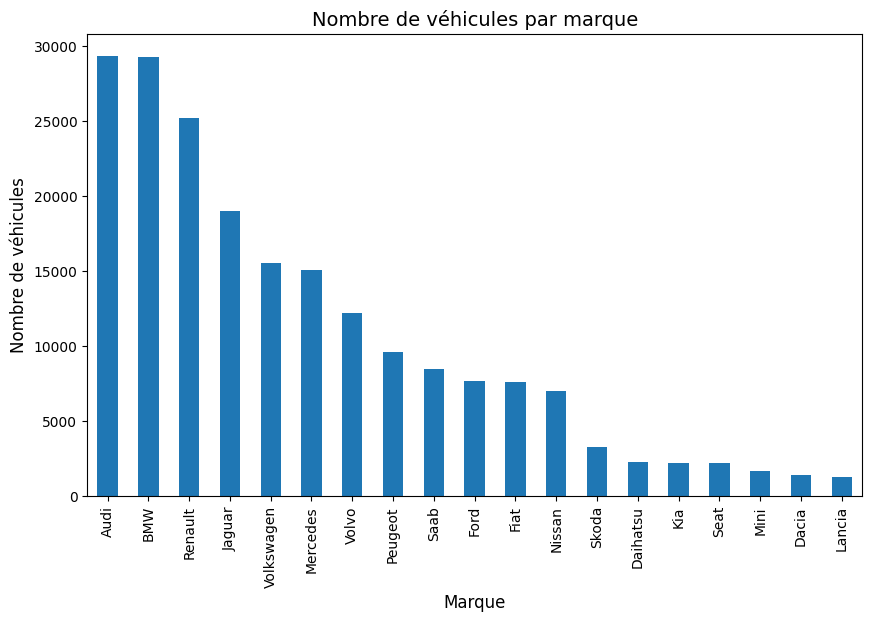

In [14]:
import matplotlib.pyplot as plt

# Diagrammes en barres pour les variables catégorielles
plt.figure(figsize=(10, 6))
merged_data['model_immatriculations_clients.marque'].value_counts().plot(kind='bar')
plt.xlabel('Marque')
plt.ylabel('Nombre de véhicules')
plt.title('Nombre de véhicules par marque')
plt.show()


# Diagrammes en barres pour les variables catégorielles
plt.figure(figsize=(10, 6))
merged_data['model_immatriculations_clients.nom'].value_counts().plot(kind='bar')
plt.xlabel('Modèle')
plt.ylabel('Nombre de véhicules')
plt.title('Nombre de véhicules par modèle')
plt.show()

In [ ]:
# Camembert pour une seule variable catégorielle
plt.figure(figsize=(12, 15))
merged_data['model_immatriculations_clients.marque'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition de la marque")
plt.ylabel("")
plt.show()


Les graphiques suggèrent que les marques Renault, Audi et BMW sont prédominantes parmi les clients, de même que les modèles A2 1.4, M5 et X-Type 2.5 V6a.

### Pretraitement des colonnes spécifiées aux clients :

- Explorations des données relatives aux clients : 

In [ ]:
print(selected_columns.dtypes)

model_immatriculations_clients.immatriculation        object
model_immatriculations_clients.age                   float64
model_immatriculations_clients.sexe                   object
model_immatriculations_clients.taux                  float64
model_immatriculations_clients.situationfamiliale     object
model_immatriculations_clients.nbenfantsacharge      float64
model_immatriculations_clients.deuxiemevoiture        object
Cluster                                                int32
Catégorie                                             object
dtype: object


In [ ]:
# Pour chaque colonne de la DataFrame
for column in columns:
    # Obtenir les valeurs uniques de la colonne
    unique_values = selected_columns[column].unique()
    # Afficher les valeurs uniques avec le nom de la colonne
    print(f"Colonnes: {column}")
    print(unique_values)

Colonnes: model_immatriculations_clients.immatriculation
['0 BZ 21' '0 CQ 77' '0 DQ 29' ... '9999 LG 27' '9999 NG 65' '9999 NQ 33']
Colonnes: model_immatriculations_clients.age
[56. 27. 51. 39. 75. 41. 31. 50. 38. 44. 69. 30. 48. 26. 29. 19. 35. 42.
 65. 34. 28. 83. 54. 59. 20. 18. 47. 37. 72. 25. nan 32. 21. 23. 45. 78.
 33. 52. 55. 22. 57. 70. 43. 24. 66. 46. 71. 53. 40. 73. 58. 49. 64. 36.
 61. 77. 79. 68. 82. 60. 84. 67. 63. 81. 62. 74. 76. 80.]
Colonnes: model_immatriculations_clients.sexe
['M' 'F' None]
Colonnes: model_immatriculations_clients.taux
[1382.  239.  234. ...  957. 1043.  923.]
Colonnes: model_immatriculations_clients.situationfamiliale
['Célibataire' 'En Couple' None]
Colonnes: model_immatriculations_clients.nbenfantsacharge
[ 0.  1.  3.  2.  4. nan]
Colonnes: model_immatriculations_clients.deuxiemevoiture
['false' 'true' None]
Colonnes: Cluster
[3 2 1 0 4]
Colonnes: Catégorie
['Économique' 'Sportive' 'Prestige' 'Familiale' 'Citadine']


- Remplacez toutes les valeurs manquantes par le marqueur "nan".

In [15]:
import numpy as np

# Remplacer les valeurs nulles par NaN
selected_columns.fillna(np.nan, inplace=True)

In [16]:
# Pour chaque colonne de la DataFrame
for column in columns:
    # Obtenir les valeurs uniques de la colonne
    unique_values = selected_columns[column].unique()
    # Afficher les valeurs uniques avec le nom de la colonne
    print(f"Colonnes: {column}")
    print(unique_values)

Colonnes: model_immatriculations_clients.immatriculation
['0 BZ 21' '0 CQ 77' '0 DQ 29' ... '9999 LG 27' '9999 NG 65' '9999 NQ 33']
Colonnes: model_immatriculations_clients.age
[56. 27. 51. 39. 75. 41. 31. 50. 38. 44. 69. 30. 48. 26. 29. 19. 35. 42.
 65. 34. 28. 83. 54. 59. 20. 18. 47. 37. 72. 25. nan 32. 21. 23. 45. 78.
 33. 52. 55. 22. 57. 70. 43. 24. 66. 46. 71. 53. 40. 73. 58. 49. 64. 36.
 61. 77. 79. 68. 82. 60. 84. 67. 63. 81. 62. 74. 76. 80.]
Colonnes: model_immatriculations_clients.sexe
['M' 'F' nan]
Colonnes: model_immatriculations_clients.taux
[1382.  239.  234. ...  957. 1043.  923.]
Colonnes: model_immatriculations_clients.situationfamiliale
['Célibataire' 'En Couple' nan]
Colonnes: model_immatriculations_clients.nbenfantsacharge
[ 0.  1.  3.  2.  4. nan]
Colonnes: model_immatriculations_clients.deuxiemevoiture
['false' 'true' nan]
Colonnes: Cluster
[3 2 1 0 4]
Colonnes: Catégorie
['Économique' 'Sportive' 'Prestige' 'Familiale' 'Citadine']


In [ ]:
# Information sur les colonnes
print(selected_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199943 entries, 0 to 199942
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   model_immatriculations_clients.immatriculation     199943 non-null  object 
 1   model_immatriculations_clients.age                 199336 non-null  float64
 2   model_immatriculations_clients.sexe                199361 non-null  object 
 3   model_immatriculations_clients.taux                199294 non-null  float64
 4   model_immatriculations_clients.situationfamiliale  199352 non-null  object 
 5   model_immatriculations_clients.nbenfantsacharge    199346 non-null  float64
 6   model_immatriculations_clients.deuxiemevoiture     199526 non-null  object 
 7   Cluster                                            199943 non-null  int32  
 8   Catégorie                                          199943 non-null  object 

In [ ]:
# Statistiques descriptives
print(selected_columns.describe())

       model_immatriculations_clients.age  \
count                       199336.000000   
mean                            43.791322   
std                             18.309457   
min                             18.000000   
25%                             28.000000   
50%                             42.000000   
75%                             57.000000   
max                             84.000000   

       model_immatriculations_clients.taux  \
count                        199294.000000   
mean                            609.130461   
std                             336.114521   
min                             150.000000   
25%                             421.000000   
50%                             522.000000   
75%                             828.000000   
max                            1399.000000   

       model_immatriculations_clients.nbenfantsacharge        Cluster  
count                                    199346.000000  199943.000000  
mean                               

À la lumière des résultats présentés ci-dessus, nous pouvons déduire les conclusions suivantes :

- La colonne "model_immatriculations_clients.age" présente un total de 199 336 observations valides. La moyenne d'âge des clients est d'environ 43,79 ans, avec un écart-type de 18,31 ans. L'âge minimum observé est de 18 ans, tandis que l'âge maximum est de 84 ans. Les trois quarts des clients ont un âge inférieur à 57 ans, avec une médiane à 42 ans.

- Pour la colonne "model_immatriculations_clients.taux", nous avons 199 294 observations valides. Le taux moyen est d'environ 609,13, avec un écart-type de 336,11. Le taux minimum est de 150, tandis que le maximum est de 1399. Les trois quarts des clients ont un taux inférieur à 828, avec une médiane à 522.

- Quant à la colonne "model_immatriculations_clients.nbenfantsacharge", nous avons 199 346 observations valides. Le nombre moyen d'enfants à charge est d'environ 1,25, avec un écart-type de 1,38. Le nombre minimum d'enfants à charge est de 0, tandis que le maximum est de 4. Les trois quarts des clients ont un nombre d'enfants à charge inférieur à 2, avec une médiane à 1.

- En ce qui concerne la colonne "Cluster", nous avons 199 943 observations valides. Les valeurs de ce cluster varient de 0 à 4.

In [ ]:
# Traitement des valeurs manquantes
missing_values = selected_columns.isnull().sum()
print("Valeurs manquantes :\n", missing_values)

Valeurs manquantes :
 model_immatriculations_clients.immatriculation         0
model_immatriculations_clients.age                   607
model_immatriculations_clients.sexe                  582
model_immatriculations_clients.taux                  649
model_immatriculations_clients.situationfamiliale    591
model_immatriculations_clients.nbenfantsacharge      597
model_immatriculations_clients.deuxiemevoiture       417
Cluster                                                0
Catégorie                                              0
dtype: int64


In [ ]:
# Vérifier s'il y a des lignes en double
duplicates = selected_columns[selected_columns.duplicated()]
print("Lignes en double :\n", duplicates)

Lignes en double :
 Empty DataFrame
Columns: [model_immatriculations_clients.immatriculation, model_immatriculations_clients.age, model_immatriculations_clients.sexe, model_immatriculations_clients.taux, model_immatriculations_clients.situationfamiliale, model_immatriculations_clients.nbenfantsacharge, model_immatriculations_clients.deuxiemevoiture, Cluster, Catégorie]
Index: []


La dataframe ne présente pas de lignes en double, cependant elle comporte environ 3443 valeurs manquantes.

On divise les données sélectionnées (selected_columns) en deux parties :

categorical_data : il contient les colonnes de type 'object', c'est-à-dire les colonnes contenant des données catégoriques.

numerical_data : il contient les colonnes numériques spécifiées, à savoir 'model_immatriculations_clients.age', 'model_immatriculations_clients.taux', 'model_immatriculations_clients.nbenfantsacharge'. Ce sont des colonnes contenant des données numériques.

In [19]:
categorical_data = selected_columns.select_dtypes(include=['object'])

numerical_data = selected_columns[['model_immatriculations_clients.age', 'model_immatriculations_clients.taux', 'model_immatriculations_clients.nbenfantsacharge']]


- Explorer la distribution des variable numeriques:

In [ ]:
import matplotlib.pyplot as plt

# Effectuer une analyse univariée pour toutes les variables numériques avec une taille de figure plus grande
numerical_data.hist(figsize=(14, 12))
plt.suptitle("Histogrammes des variables numériques")
plt.show()

En analysant les graphiques fournis, on remarque que la majorité des clients ont un âge compris entre 20 et 30 ans, un taux situé approximativement entre 400 et 550 euros, et ne déclarent pas avoir d'enfants.

- Exploration de la distribution des variables numerique pour chaque catégorie de la variable 'Catégorie':

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner les dataframes numerical_data et categorical_data sur l'index
merged_data = numerical_data.join(categorical_data['Catégorie'])

# Créer une grille de sous-graphiques pour chaque variable numérique
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Variables numériques à inclure dans le tracé
numerical_columns = ['model_immatriculations_clients.age', 'model_immatriculations_clients.taux']

# Boucle sur chaque variable numérique
for i, column in enumerate(numerical_columns):
    # Tracé de la distribution pour chaque catégorie de la variable 'Catégorie'
    sns.histplot(data=merged_data, x=column, hue='Catégorie', ax=axes[i], multiple='stack', palette='Set2')
    axes[i].set_title(f"Distribution de '{column}' par Catégorie")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Effectif")

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


À partir des graphiques précédents, on peut conclure que la majorité des clients montrent une préférence pour les voitures économiques.

In [21]:
# Boîtes à moustaches pour les variables continues
numerical_data[['model_immatriculations_clients.age', 'model_immatriculations_clients.taux']].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_14325/1363019314.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="variable", y="value", data=numerical_data[['model_immatriculations_clients.age','model_immatriculations_clients.taux']].melt(), palette="muted")


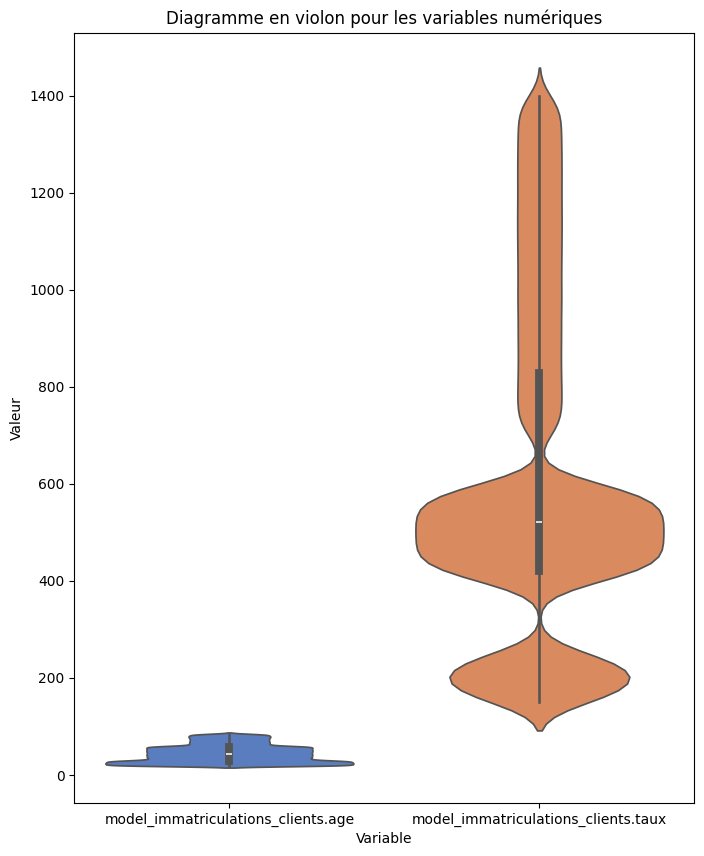

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(8, 10))

# Tracer le diagramme en violon
sns.violinplot(x="variable", y="value", data=numerical_data[['model_immatriculations_clients.age','model_immatriculations_clients.taux']].melt(), palette="muted")
plt.title("Diagramme en violon pour les variables numériques")
plt.xlabel("Variable")
plt.ylabel("Valeur")
plt.show()


Le boxplot et le diagramme en violon fournissent des informations pertinentes sur les variables continues des données clients. Pour la variable "model_immatriculations_clients.taux", on observe un taux minimum d'environ 170 euros et un taux maximum de 1400 euros, avec une médiane de 500 euros, un premier quartile d'environ 420 euros et un troisième quartile de 820 euros. Pour la variable "model_immatriculations_clients_age", on constate un âge minimum d'environ 20 ans et un âge maximum d'environ 80 ans, avec une médiane d'environ 30 ans, un premier quartile de 25 ans et un troisième quartile de 40 ans.

- Exploration de la distribution des variables categorique:

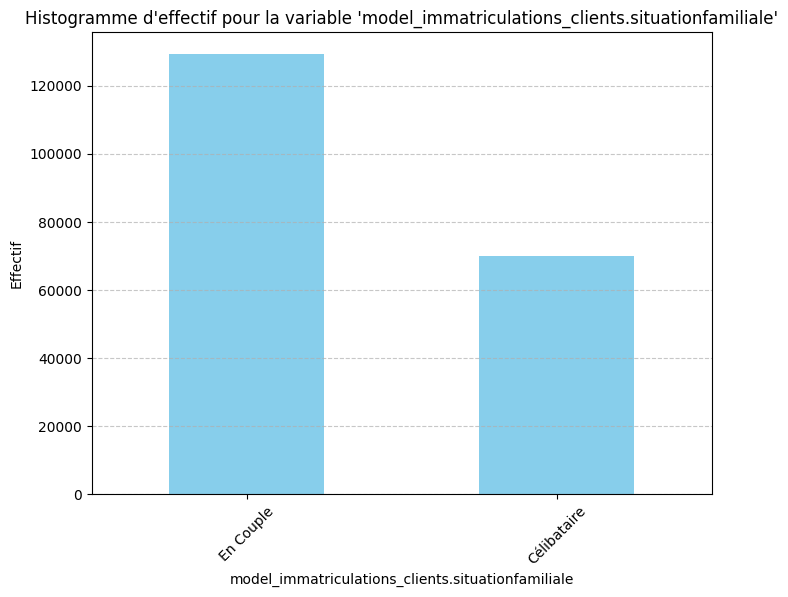

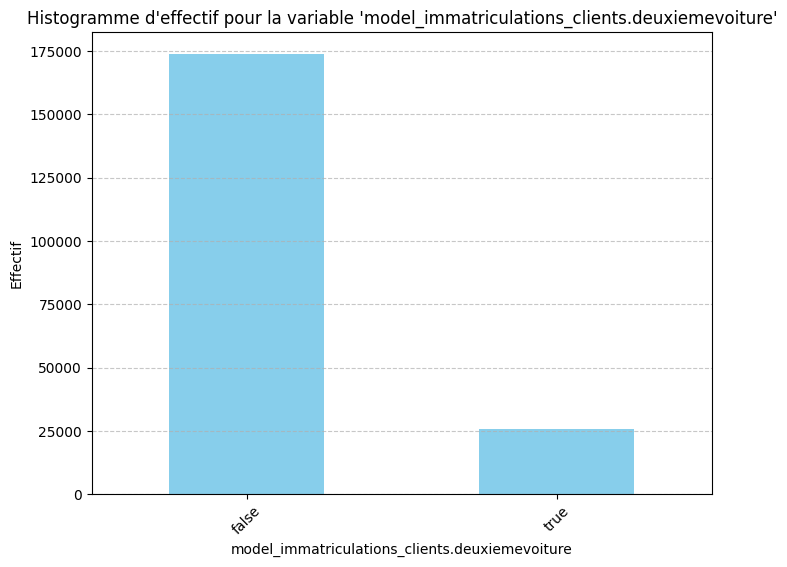

In [ ]:
import matplotlib.pyplot as plt

# Liste des noms de colonnes catégoriques
categorical_columns = ['model_immatriculations_clients.sexe',
                       'model_immatriculations_clients.situationfamiliale',
                       'model_immatriculations_clients.deuxiemevoiture',
                       'Catégorie']

# Création d'histogrammes d'effectif pour chaque variable catégorique
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    categorical_data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Histogramme d'effectif pour la variable '{column}'")
    plt.xlabel(column)
    plt.ylabel("Effectif")
    plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


En observant la répartition des valeurs catégoriques, nous pouvons en conclure que la majorité des clients sont des hommes, en couple, n'ont pas de deuxième voiture et préfèrent les voitures économiques.

- Exploration de la distribution des variables catégorique pour chaque catégorie de la variable 'Catégorie':

In [22]:
import matplotlib.pyplot as plt

# Effectif de chaque variable catégorique
sex_counts = categorical_data['model_immatriculations_clients.sexe'].value_counts()
situation_counts = categorical_data['model_immatriculations_clients.situationfamiliale'].value_counts()
voiture_counts = categorical_data['model_immatriculations_clients.deuxiemevoiture'].value_counts()
category_counts = categorical_data['Catégorie'].value_counts()

# Création du graphique à barres empilées
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sexe par catégorie
sex_by_category = categorical_data.groupby(['Catégorie', 'model_immatriculations_clients.sexe']).size().unstack()
sex_by_category.plot(kind='bar', stacked=True, ax=axes[0, 0], color=['skyblue', 'pink'])
axes[0, 0].set_title('Répartition du sexe par catégorie')
axes[0, 0].set_xlabel('Catégorie')
axes[0, 0].set_ylabel('Effectif')
axes[0, 0].legend(title='Sexe', loc='upper right')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Situation familiale par catégorie
situation_by_category = categorical_data.groupby(['Catégorie', 'model_immatriculations_clients.situationfamiliale']).size().unstack()
situation_by_category.plot(kind='bar', stacked=True, ax=axes[0, 1], color=['lightgreen', 'salmon'])
axes[0, 1].set_title('Répartition de la situation familiale par catégorie')
axes[0, 1].set_xlabel('Catégorie')
axes[0, 1].set_ylabel('Effectif')
axes[0, 1].legend(title='Situation familiale', loc='upper right')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Deuxième voiture par catégorie
voiture_by_category = categorical_data.groupby(['Catégorie', 'model_immatriculations_clients.deuxiemevoiture']).size().unstack()
voiture_by_category.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['lightblue', 'orange'])
axes[1, 0].set_title('Répartition de la deuxième voiture par catégorie')
axes[1, 0].set_xlabel('Catégorie')
axes[1, 0].set_ylabel('Effectif')
axes[1, 0].legend(title='Deuxième voiture', loc='upper right')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Catégorie
category_counts.plot(kind='bar', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Répartition des catégories')
axes[1, 1].set_xlabel('Catégorie')
axes[1, 1].set_ylabel('Effectif')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


Les résultats révèlent des informations intéressantes, notamment que la majorité des hommes célibataires préfèrent les voitures économiques et n'ont pas de deuxième voiture.

### Encodage des Données Numériques et Conversion des Variables Catégorielles en Valeurs Numériques :

- Sélection de l'ensemble des données des clients dans un DataFrame.

In [23]:
numerical_columns=['model_immatriculations_clients.age','model_immatriculations_clients.sexe','model_immatriculations_clients.taux','model_immatriculations_clients.situationfamiliale','model_immatriculations_clients.nbenfantsacharge','model_immatriculations_clients.deuxiemevoiture','Cluster']

# Sélection des colonnes spécifiées
numerical_data_encoded=selected_columns[numerical_columns].reset_index(drop=True)

# Affichage des données des colonnes sélectionnées
numerical_data_encoded

model_immatriculations_clients.age  \
0                                     56.0   
1                                     27.0   
2                                     51.0   
3                                     51.0   
4                                     39.0   
...                                    ...   
199938                                24.0   
199939                                36.0   
199940                                62.0   
199941                                34.0   
199942                                29.0   

       model_immatriculations_clients.sexe  \
0                                        M   
1                                        F   
2                                        M   
3                                        M   
4                                        M   
...                                    ...   
199938                                   M   
199939                                   M   
199940                                   M   
199941                                   M   
199942                                   M   

        model_immatriculations_clients.taux  \
0                                    1382.0   
1                                     239.0   
2                                     234.0   
3                                     552.0   
4                                     963.0   
...                                     ...   
199938                                414.0   
199939                               1112.0   
199940                                793.0   
199941                                467.0   
199942                                592.0   

       model_immatriculations_clients.situationfamiliale  \
0                                            Célibataire   
1                                            Célibataire   
2                                            Célibataire   
3                                              En Couple   
4                                              En Couple   
...                                                  ...   
199938                                       Célibataire   
199939                                       Célibataire   
199940                                       Célibataire   
199941                                         En Couple   
199942                                       Célibataire   

        model_immatriculations_clients.nbenfantsacharge  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   1.0   
4                                                   3.0   
...                                                 ...   
199938                                              0.0   
199939                                              0.0   
199940                                              0.0   
199941                                              1.0   
199942                                              0.0   

       model_immatriculations_clients.deuxiemevoiture  Cluster  
0                                               false        3  
1                                               false        3  
2                                               false        3  
3                                               false        2  
4                                               false        1  
...                                               ...      ...  
199938                                          false        3  
199939                                          false        3  
199940                                          false        4  
199941                                          false        4  
199942                                          false        3  

[199943 rows x 7 columns]

- La prochaine étape consiste à convertir toutes les features catégoriques en numériques. Nous utiliserons un dictionnaire pour mapper les valeurs catégoriques avec leurs valeurs numériques correspondantes afin de ne pas perdre les valeurs NaN, contrairement à d'autres méthodes telles que le one-hot encoding.

In [24]:
# Créer un dictionnaire pour mapper les valeurs
mapping = {'Célibataire': 0, 'En Couple': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.situationfamiliale'
numerical_data_encoded['model_immatriculations_clients.situationfamiliale'] = numerical_data_encoded['model_immatriculations_clients.situationfamiliale'].map(mapping)

# Créer un dictionnaire pour mapper les valeurs
mapping = {'M': 0, 'F': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.situationfamiliale'
numerical_data_encoded['model_immatriculations_clients.sexe'] = numerical_data_encoded['model_immatriculations_clients.sexe'].map(mapping)

# Créer un dictionnaire pour mapper les valeurs
mapping = {'false': 0, 'true': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.deuxiemevoiture'
numerical_data_encoded['model_immatriculations_clients.deuxiemevoiture'] = numerical_data_encoded['model_immatriculations_clients.deuxiemevoiture'].map(mapping)

numerical_data_encoded

model_immatriculations_clients.age  \
0                                     56.0   
1                                     27.0   
2                                     51.0   
3                                     51.0   
4                                     39.0   
...                                    ...   
199938                                24.0   
199939                                36.0   
199940                                62.0   
199941                                34.0   
199942                                29.0   

        model_immatriculations_clients.sexe  \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
199938                                  0.0   
199939                                  0.0   
199940                                  0.0   
199941                                  0.0   
199942                                  0.0   

        model_immatriculations_clients.taux  \
0                                    1382.0   
1                                     239.0   
2                                     234.0   
3                                     552.0   
4                                     963.0   
...                                     ...   
199938                                414.0   
199939                               1112.0   
199940                                793.0   
199941                                467.0   
199942                                592.0   

        model_immatriculations_clients.situationfamiliale  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                                     1.0   
4                                                     1.0   
...                                                   ...   
199938                                                0.0   
199939                                                0.0   
199940                                                0.0   
199941                                                1.0   
199942                                                0.0   

        model_immatriculations_clients.nbenfantsacharge  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   1.0   
4                                                   3.0   
...                                                 ...   
199938                                              0.0   
199939                                              0.0   
199940                                              0.0   
199941                                              1.0   
199942                                              0.0   

        model_immatriculations_clients.deuxiemevoiture  Cluster  
0                                                  0.0        3  
1                                                  0.0        3  
2                                                  0.0        3  
3                                                  0.0        2  
4                                                  0.0        1  
...                                                ...      ...  
199938                                             0.0        3  
199939                                             0.0        3  
199940                                             0.0        4  
199941                                             0.0        4  
199942                                             0.0        3  

[199943 rows x 7 columns]

- À présent, nous examinons les plages de valeurs et les types des features encodées :

In [25]:
#Unique values de la colonne 'deuxiemevoiture'
print(numerical_data_encoded['model_immatriculations_clients.deuxiemevoiture'].unique())

#Unique values de la colonne 'sexe'
print(numerical_data_encoded['model_immatriculations_clients.sexe'].unique())

#Unique values de la colonne 'situationfamiliale'
print(numerical_data_encoded['model_immatriculations_clients.situationfamiliale'].unique())

[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]


In [ ]:
print(numerical_data_encoded.dtypes)

model_immatriculations_clients.age                   float64
model_immatriculations_clients.sexe                  float64
model_immatriculations_clients.taux                  float64
model_immatriculations_clients.situationfamiliale    float64
model_immatriculations_clients.nbenfantsacharge      float64
model_immatriculations_clients.deuxiemevoiture       float64
Cluster                                                int32
dtype: object


- Examinions les relations, les poids et les contributions entre les features des clients et la variable cible, qui est le numéro de cluster à prédire.

Vérifions si il a une présence de multicollinéarité parmi les données des clients.

In [ ]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filtrer les lignes ne contenant pas de NaN
numerical_data_no_nan = numerical_data_encoded.dropna(axis=0) #filtrer environ 3443 ligne peut-être négligeable puisqu'on possede à peu près 200 000 ligne en total

# Calculer le VIF pour chaque fonctionnalité
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data_no_nan.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data_no_nan.values, i) for i in range(len(numerical_data_no_nan.columns))]

# Afficher les VIF
print("\nVariance Inflation Factor (VIF) :")
print(vif_data)

##Multicollinéarité en générale non élevé


Variance Inflation Factor (VIF) :
                                             Feature       VIF
0                 model_immatriculations_clients.age  5.288967
1                model_immatriculations_clients.sexe  1.395221
2                model_immatriculations_clients.taux  3.152209
3  model_immatriculations_clients.situationfamiliale  3.766689
4    model_immatriculations_clients.nbenfantsacharge  2.471532
5     model_immatriculations_clients.deuxiemevoiture  1.289799
6                                            Cluster  2.904124


La sortie affiche les facteurs de l'inflation de la variance (VIF) pour chaque variable. Le VIF mesure à quel point une variable est influencée par les autres variables dans le modèle de régression. Généralement, un VIF supérieur à 10 indique une forte multicollinéarité, ce qui signifie que les variables sont fortement corrélées entre elles, ce qui peut poser problème dans certains modèles de régression.

Cependant, dans ce cas, les VIF semblent être généralement bas, ce qui suggère qu'il n'y a pas de forte multicollinéarité entre les variables. Cela signifie que les variables numériques sélectionnées peuvent être considérées comme relativement indépendantes les unes des autres.

Créons une matrice de nuage de points pour examiner la linéarité entre les caractéristiques et la variable cible "Cluster".

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuster les paramètres de visualisation
sns.set_context("paper", font_scale=0.7)  # Ajuster la taille de police
sns.set_style("whitegrid")  # Choisir un style de fond pour le graphique

# Créer une matrice de nuages de points avec des ajustements de paramètres
sns.pairplot(data=numerical_data_encoded)
plt.xticks(rotation=45)  # Rotation des étiquettes des axes x pour éviter le chevauchement
plt.yticks(rotation=45)  # Rotation des étiquettes des axes y pour éviter le chevauchement
plt.tight_layout()  # Ajustement automatique de la disposition pour éviter le chevauchement des sous-graphiques
plt.show()

Selon les observations des nuages de points, il semble qu'il n'existe pas de relation linéaire évidente entre les caractéristiques des clients et la variable cible. Nous concluons qu'un modèle de régression ne produirait pas de meilleurs résultats pour prédire les catégories de voitures en fonction des données des clients.

Traçons une heatmap de corrélation pour étudier l'importance des features par rapport à la variable  cible : 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation uniquement pour les variables numériques
correlation_matrix = numerical_data_encoded.corr()

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

La heatmap de corrélation révèle plusieurs résultats importants :

Une corrélation négative de -0.29 entre le nombre d'enfants à charge et la catégorie de voiture achetée, ce qui indique qu'il y a une tendance à acheter certains types de voitures en fonction du nombre d'enfants à charge.

Une corrélation négative de -0.29 entre la situation familiale et la catégorie de voiture recommandée, ce qui suggère que la situation familiale peut influencer le choix de la voiture recommandée.

Une corrélation négative de -0.29 entre le taux (capacité d'endettement du client) et la catégorie de voiture recommandée indique que le taux d'endettement peut avoir une influence sur le choix du véhicule recommandé.

Une corrélation positive de 0.10 entre la probabilité pour un client de posséder une deuxième voiture et la catégorie de voiture recommandée suggère que cette circonstance peut influencer la décision d'achat d'un autre véhicule.

Nous observons une corrélation très faible de -0.01 entre le sexe et la catégorie de voiture, ce qui indique que le sexe n'est pas un facteur déterminant dans le choix de la catégorie de voiture recommandée.

- Selon cette analyse, on conclut que la variable "sexe" devrait être exclue parmi les caractéristiques car elle n'est pas pertinente pour prédire les catégories de voitures, tandis que les autres variables devraient être conservées.

In [ ]:
# Suppresion de la variable "sexe" dans la dataframe encodés
numerical_data_encoded=numerical_data_encoded.drop(columns=["sexe"])

### Construction de modèles de prédiction de la catégorie de véhicules et l’évaluation et la comparaison des performances de chaque configuration algorithmique:

- Nous divisons les données en variables explicatives (X) et cible (Y), puis nous comblons les valeurs manquantes de chaque colonne en utilisant la moyenne respective de chaque colonne. Cette approche assure un équilibre dans les plages de valeurs plutôt que d'utiliser une valeur par défaut. Ensuite, nous normalisons nos données d'entrée contenant les caractéristiques. L'ensemble des ces instructions permet de préparer les données à la modélisation.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Diviser les données en variables explicatives et cible
X = numerical_data_encoded.drop(columns=["Cluster"])
y = numerical_data_encoded["Cluster"]

# Gérer les valeurs manquantes
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


![Logo Google](https://miro.medium.com/v2/resize:fit:1024/1*hu5ZWd8v6bJ6Zu64x3vgPg.png)


---


*Évaluation des performances du modèle de classification KNN :*

Nous avons utilisé en premier temps l'algorithme de classification des k plus proches voisins (KNN) pour prédire les catégories de véhicules à partir de données numériques encodées. Ensuite, nous avons utilisé la validation croisée avec différentes valeurs de k pour évaluer les performances du modèle KNN en termes d'accuracy, de précision, de rappel et de score F1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définir les valeurs de k pour KNN
k_values = [5, 10, 15, 20, 25, 30, 35, 40]

# Initialiser un dictionnaire pour stocker les résultats
results = {'k': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Numéro du K-Fold:
num_k_fold=15;

# Parcourir chaque valeur de k
for k in k_values:
    # Initialiser les listes pour stocker les scores de performance pour chaque fold
    accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

    # Initialiser KFold avec le nombre de folds k
    kf = KFold(n_splits=num_k_fold, shuffle=True, random_state=42)

    # Parcourir chaque fold de KFold
    for train_index, test_index in kf.split(X_imputed):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialiser le modèle KNN avec la valeur de k actuelle
        knn = KNeighborsClassifier(n_neighbors=k)

        # Adapter le modèle aux données d'entraînement
        knn.fit(X_train, y_train)

        # Faire des prédictions sur les données de test
        y_pred = knn.predict(X_test)

        # Calculer les métriques de performance pour ce fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Stocker les résultats moyens pour cette valeur de k
    results['k'].append(k)
    results['Accuracy'].append(np.mean(accuracy_scores))
    results['Precision'].append(np.mean(precision_scores))
    results['Recall'].append(np.mean(recall_scores))
    results['F1 Score'].append(np.mean(f1_scores))

In [ ]:
# Convertir les résultats en DataFrame
results_df_knn = pd.DataFrame(results)

# Afficher le DataFrame des résultats
results_df_knn

k  Accuracy  Precision    Recall  F1 Score
0   5  0.709812   0.708350  0.709812  0.707560
1  10  0.725152   0.728882  0.725152  0.723446
2  15  0.728538   0.734890  0.728538  0.728534
3  20  0.731358   0.739915  0.731358  0.730981
4  25  0.732229   0.742479  0.732229  0.732736
5  30  0.733799   0.745451  0.733799  0.734086
6  35  0.734034   0.746581  0.734034  0.734781
7  40  0.734179   0.746970  0.734179  0.734656

Les résultats montrent que les performances du modèle KNN varient légèrement avec différentes valeurs de k. On remaruqe que le modèle KNN a atteint une meilleur accuracy d'environ 0.7341 pour k = 40. Cela indique que le modèle peut prédire avec précision les catégories de véhicules dans une certaine mesure. Cependant, il est important de noter que l'augmentation de k entraîne également une augmentation de la complexité du modèle, ce qui peut conduire à un surajustement si k est trop grand. 

Voici une présentation des metric utilisés :

- Accuracy (Exactitude) : L'exactitude mesure la proportion de prédictions correctes parmi toutes les prédictions effectuées par le modèle. C'est le rapport entre le nombre total de prédictions correctes (vrais positifs et vrais négatifs) et le nombre total d'observations. 

- Précision : La précision mesure la proportion de vrais positifs parmi toutes les observations identifiées comme positives (vrais positifs et faux positifs). Une précision élevée signifie que le modèle a moins de faux positifs, ce qui est important dans les cas où les faux positifs sont coûteux ou indésirables.

- Rappel : Le rappel moyen, qui mesure la proportion de véritables positifs correctement identifiés parmi tous les positifs réels (vrais positifs et faux négatifs).  Un rappel élevé est important lorsque les faux négatifs sont coûteux ou indésirables, car il indique que le modèle identifie efficacement les vrais positifs.

- Score F1 : Le score F1 est une mesure de la précision d'un test. Il est calculé comme la moyenne harmonique de la précision et du rappel. La moyenne harmonique donne plus de poids aux valeurs les plus faibles. Ainsi, le score F1 est élevé si à la fois la précision et le rappel sont élevés. Il est particulièrement utile lorsque les classes sont déséquilibrées, car il prend en compte à la fois les faux positifs et les faux négatifs. Le score F1 est souvent utilisé comme métrique de performance globale pour les modèles de classification.

Nous pourrions maintenant explorer les performances du modèle KNN en testant différents paramètres, tout en maintenant un voisinage fixe de k=40. L'objectif est de déterminer si ces ajustements amélioreraient les performances du modèle.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Définir les options pour chaque paramètre à tester
algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithmes pour le calcul des voisins
leaf_size_options = [10, 20, 30, 40]  # Taille de la feuille pour l'arbre (pour ball_tree ou kd_tree)

#Numéro k-fold
num_k_fold=15

# Initialiser un dictionnaire pour stocker les résultats
params_results = {'algorithm': [], 'leaf_size': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Parcourir chaque combinaison de paramètres
for algorithm in algorithm_options:
    for leaf_size in leaf_size_options:
        # Initialiser les listes pour stocker les scores de performance pour chaque fold
        accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [], []

        # Initialiser KFold avec le nombre de folds k
        kf = KFold(n_splits=num_k_fold, shuffle=True, random_state=42)

        # Parcourir chaque fold de KFold
        for train_index, test_index in kf.split(X_imputed):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Initialiser le modèle KNN avec les valeurs de paramètres actuelles
            knn = KNeighborsClassifier(n_neighbors=40, algorithm=algorithm, leaf_size=leaf_size)

            # Adapter le modèle aux données d'entraînement
            knn.fit(X_train, y_train)

            # Faire des prédictions sur les données de test
            y_pred = knn.predict(X_test)

            # Calculer les métriques de performance pour ce fold
            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
            recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

        # Stocker les résultats moyens pour cette combinaison de paramètres
        params_results['algorithm'].append(algorithm)
        params_results['leaf_size'].append(leaf_size)
        params_results['Accuracy'].append(np.mean(accuracy_scores))
        params_results['Precision'].append(np.mean(precision_scores))
        params_results['Recall'].append(np.mean(recall_scores))
        params_results['F1 Score'].append(np.mean(f1_scores))


In [ ]:
# Convertir les résultats en DataFrame
params_results_df_knn = pd.DataFrame(params_results)
params_results_df_knn

algorithm  leaf_size  Accuracy  Precision    Recall  F1 Score
0        auto         10  0.734209   0.747004  0.734209  0.734688
1        auto         20  0.734089   0.746940  0.734089  0.734589
2        auto         30  0.734179   0.746970  0.734179  0.734656
3        auto         40  0.734179   0.746970  0.734179  0.734656
4   ball_tree         10  0.734189   0.746986  0.734189  0.734667
5   ball_tree         20  0.734259   0.747061  0.734259  0.734744
6   ball_tree         30  0.734259   0.747069  0.734259  0.734743
7   ball_tree         40  0.734259   0.747069  0.734259  0.734743
8     kd_tree         10  0.734209   0.747004  0.734209  0.734688
9     kd_tree         20  0.734089   0.746940  0.734089  0.734589
10    kd_tree         30  0.734179   0.746970  0.734179  0.734656
11    kd_tree         40  0.734179   0.746970  0.734179  0.734656
12      brute         10  0.734104   0.746930  0.734104  0.734594
13      brute         20  0.734104   0.746930  0.734104  0.734594
14      brute         30  0.734104   0.746930  0.734104  0.734594
15      brute         40  0.734104   0.746930  0.734104  0.734594

Les résultats montrent que les performances du modèle KNN ne varient pas de manière significative en fonction des paramètres d'algorithme  et la taille de la feuille utilisé dans le model KNN avec k=40. Le changement de ces paramètres produisent tous des performances similaires en termes d'exactitude, de précision, de rappel et de score F1.

Stabilité des performances : Globalement, les résultats restent cohérents et stables, avec des valeurs de métrique similaires pour toutes les combinaisons de paramètres testées. Cela suggère que le modèle KNN est robuste et peu sensible aux variations des paramètres d'algorithme et de taille de feuille dans ce contexte spécifique.

En résumé, ces résultats indiquent qu'il n'y a pas de différence significative dans les performances du modèle KNN pour différentes combinaisons de paramètres dans ce cas d'étude spécifique. Il est donc possible de sélectionner n'importe quelle combinaison d'algorithme et de taille de feuille pour construire le modèle final.

- Optimisation des performances du modèle KNN et sélection de la meilleure combinaison d'hyperparamètre :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Créer le modèle KNN
model = KNeighborsClassifier()

# Recherche sur grille pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=15, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Fitting 15 folds for each of 32 candidates, totalling 480 fits
Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'uniform'}
Accuracy: 0.7361774487984196
Precision: 0.7478596208147643
Recall: 0.7361774487984196
F1 Score: 0.7362986423272094


Nous avons utilisé la méthode de recherche sur grille pour trouver les meilleurs paramètres pour le modèle KNN. La recherche sur grille est une technique d'optimisation qui évalue systématiquement différentes combinaisons de paramètres du modèle et sélectionne celle qui donne les meilleurs résultats de performance se basant sur le métrique d'accuracy (exactitude).


Nous avons exploré différentes valeurs pour divers hyperparamètres essentiels du modèle KNN :

Nombre de voisins (n_neighbors) : Nous avons testé des valeurs allant de 5 à 40.

Poids des voisins (weights) : Nous avons testé deux options, "uniform" où tous les voisins ont le même poids, et "distance" où les poids sont inversément proportionnels à la distance.

Métrique de distance (metric) : Nous avons testé deux métriques de distance, "euclidean" et "manhattan".


Meilleurs paramètres trouvés : La recherche sur grille a identifié que les meilleurs paramètres pour notre modèle KNN sont :

Métrique de distance : "manhattan"

Nombre de voisins : 40

Poids des voisins : "uniform"



En utilisant ces meilleurs paramètres, le modèle KNN a atteint les performances suivantes sur l'ensemble de test :

Accuracy: 0.736
Precision: 0.748
Recall: 0.736
F1 Score: 0.736

Ces résultats indiquent que le modèle KNN avec les paramètres optimisés a une performance raisonnable sur l'ensemble de test, avec une accuracy de 73.6%.

- Examinons la matrice de confusion pour évaluer les performances du model KNN

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Axe x (Predicted Labels) : Il représente les étiquettes prédites par le modèle.

Axe y (True Labels) : Il représente les étiquettes réelles des données.

Chaque cellule de la matrice contient le nombre d'observations qui appartiennent à la classe représentée par l'étiquette réelle (axe y) et ont été classées dans la classe représentée par l'étiquette prédite (axe x).

Les valeurs diagonales de la matrice représentent les prédictions correctes, tandis que les valeurs hors diagonale représentent les prédictions incorrectes.
Plus les valeurs diagonales sont élevées et les valeurs hors diagonale sont faibles, meilleures sont les performances du modèle.

Dans notre cas on peut dire les valeurs les plus élevées sur la diagonale indiquent que le modèle a correctement classé un nombre important d'observations dans ces classes spécifiques.


* Pour la première classe : 5297 observations ont été correctement prédites contre 3545 incorrects.

* Pour la deuxième classe : 2373 observations ont été correctement prédites contre 31 incorrects.

* Pour la troisième classe : 4763 observations ont été correctement prédites contre 1580 incorrects.

* Pour la quatrième classe : 12912 observations ont été correctement prédites contre 1871 incorrects.

* Pour la cinquième classe : 4094 observations ont été correctement prédites contre 3523 incorrects.

Ces valeurs élevées sur la diagonale indiquent que le modèle a généralement bien performé pour classifier les données dans ces classes.

![Logo Google](https://media.licdn.com/dms/image/D4D12AQELB-qqeoCWQQ/article-cover_image-shrink_720_1280/0/1693121766623?e=2147483647&v=beta&t=wPeSNF7ljiDbKDnA8pmefoXzXRLsqdCLoffM5Roe3og)


---


*Evaluation des performances des performances d'un modèle d'arbre de décision*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Définir les métriques
metrics = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average="weighted"),
    "Recall": make_scorer(recall_score, average="weighted"),
    "F1 Score": make_scorer(f1_score, average="weighted")
}

# Définir les paramètres à tester
params = {
    "max_depth": [5, 7,10],
    "min_samples_split": [2, 3,5],
    "min_samples_leaf": [1, 2, 4]
}

# Stocker les résultats dans un DataFrame
results = []

# Définir le nombre de folds K
k = 15

# Effectuer la validation croisée pour chaque métrique, chaque combinaison de paramètres et k=15
print(f"K-Fold Cross Validation with K={k}")
kf = KFold(n_splits=k, shuffle=True, random_state=42)
for metric_name, scorer in metrics.items():
    print(f"Metric: {metric_name}")
    for max_depth in params["max_depth"]:
        for min_samples_split in params["min_samples_split"]:
            for min_samples_leaf in params["min_samples_leaf"]:
                clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring=scorer)
                mean_score = np.mean(scores)
                std_score = np.std(scores)
                results.append({
                    "Metric": metric_name,
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                    "Mean Score": mean_score,
                    "Std Score": std_score
                })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

K-Fold Cross Validation with K=15
Metric: Accuracy
Metric: Precision
Metric: Recall
Metric: F1 Score


In [ ]:
# Convertir les résultats en DataFrame
params_results_df_decision_tree = pd.DataFrame(results)
params_results_df_decision_tree.head(50)

Metric  max_depth  min_samples_split  min_samples_leaf  Mean Score  \
0    Accuracy          5                  2                 1    0.735340   
1    Accuracy          5                  2                 2    0.735340   
2    Accuracy          5                  2                 4    0.735350   
3    Accuracy          5                  3                 1    0.735340   
4    Accuracy          5                  3                 2    0.735340   
5    Accuracy          5                  3                 4    0.735350   
6    Accuracy          5                  5                 1    0.735340   
7    Accuracy          5                  5                 2    0.735340   
8    Accuracy          5                  5                 4    0.735350   
9    Accuracy          7                  2                 1    0.737410   
10   Accuracy          7                  2                 2    0.737425   
11   Accuracy          7                  2                 4    0.737520   
12   Accuracy          7                  3                 1    0.737400   
13   Accuracy          7                  3                 2    0.737420   
14   Accuracy          7                  3                 4    0.737515   
15   Accuracy          7                  5                 1    0.737405   
16   Accuracy          7                  5                 2    0.737425   
17   Accuracy          7                  5                 4    0.737520   
18   Accuracy         10                  2                 1    0.735740   
19   Accuracy         10                  2                 2    0.735850   
20   Accuracy         10                  2                 4    0.736175   
21   Accuracy         10                  3                 1    0.735735   
22   Accuracy         10                  3                 2    0.735845   
23   Accuracy         10                  3                 4    0.736170   
24   Accuracy         10                  5                 1    0.735795   
25   Accuracy         10                  5                 2    0.735865   
26   Accuracy         10                  5                 4    0.736165   
27  Precision          5                  2                 1    0.794825   
28  Precision          5                  2                 2    0.794825   
29  Precision          5                  2                 4    0.794828   
30  Precision          5                  3                 1    0.794825   
31  Precision          5                  3                 2    0.794825   
32  Precision          5                  3                 4    0.794828   
33  Precision          5                  5                 1    0.794825   
34  Precision          5                  5                 2    0.794825   
35  Precision          5                  5                 4    0.794828   
36  Precision          7                  2                 1    0.753893   
37  Precision          7                  2                 2    0.753907   
38  Precision          7                  2                 4    0.753999   
39  Precision          7                  3                 1    0.753859   
40  Precision          7                  3                 2    0.753906   
41  Precision          7                  3                 4    0.754003   
42  Precision          7                  5                 1    0.753872   
43  Precision          7                  5                 2    0.753902   
44  Precision          7                  5                 4    0.753999   
45  Precision         10                  2                 1    0.746538   
46  Precision         10                  2                 2    0.746686   
47  Precision         10                  2                 4    0.746941   
48  Precision         10                  3                 1    0.746553   
49  Precision         10                  3                 2    0.746666   

    Std Score  
0    0.002429  
1    0.002429  
2    0.002435  
3    0.002429  

On utilise une approche de validation croisée à k-fold avec k=15 pour évaluer les performances d'un modèle d'arbre de décision. Il teste différentes combinaisons de paramètres pour l'arbre de décision, notamment la profondeur maximale de l'arbre (max_depth), le nombre minimal d'échantillons requis pour diviser un nœud interne (min_samples_split), et le nombre minimal d'échantillons requis pour être une feuille (min_samples_leaf).

Pour chaque combinaison de paramètres, le code calcule les scores moyens et les écarts-types des scores obtenus pour chaque métrique d'évaluation, notamment l'exactitude (Accuracy), la précision (Precision), le rappel (Recall), et le score F1 (F1 Score).

Par exemple :

Les scores moyens d'exactitude (Accuracy) oscillent autour de 0,735 à 0,737 pour différentes valeurs de profondeur maximale, de nombre minimal d'échantillons pour diviser un nœud interne et de nombre minimal d'échantillons pour être une feuille. Cela signifie que le modèle d'arbre de décision parvient à bien généraliser sur les données de test avec ces paramètres.

Les scores moyens de précision (Precision) sont généralement plus élevés, variant autour de 0,794 pour différentes combinaisons de paramètres. Cela suggère que le modèle a une capacité élevée à prédire correctement la catégorie de véhicule, en minimisant le nombre de faux positifs.

- Optimisation des performances du modèle d'arbre de décision et sélection de la meilleure combinaison d'hyperparamètre :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier()

# Recherche sur grille pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=15, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 72 candidates, totalling 1080 fits
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy: 0.7384530745955138
Precision: 0.7447775137997684
Recall: 0.7384530745955138
F1 Score: 0.7354613273957067


On construit et on optimise les hyperparamètres du modèle d'arbre de décision.
Voici une interprétation et l'intérêt de chaque étape :

Division des données : Les données sont divisées en ensembles d'entraînement et de test. L'ensemble d'entraînement sera utilisé pour entraîner le modèle, tandis que l'ensemble de test sera utilisé pour évaluer ses performances sur des données non vues auparavant. Cela permet de vérifier si le modèle généralise bien sur de nouvelles données.

Définition des paramètres à tester : Une grille de recherche est définie pour les hyperparamètres du modèle d'arbre de décision. Les hyperparamètres comprennent le critère de division des nœuds (gini ou entropy), la profondeur maximale de l'arbre, le nombre minimal d'échantillons requis pour diviser un nœud (min_samples_split), et le nombre minimal d'échantillons requis dans une feuille terminale (min_samples_leaf).

Recherche sur grille : Une recherche exhaustive des combinaisons d'hyperparamètres est effectuée sur une grille définie. Pour chaque combinaison, le modèle d'arbre de décision est entraîné sur l'ensemble d'entraînement à l'aide de la validation croisée (15 folds dans ce cas) et évalué sur la base de la métrique d'exactitude (accuracy). Cela permet de trouver les meilleurs hyperparamètres qui optimisent les performances du modèle.

Évaluation du modèle : Le modèle avec les meilleurs hyperparamètres est sélectionné, et ses performances sont évaluées sur l'ensemble de test à l'aide de différentes métriques telles que l'exactitude (accuracy), la précision (precision), le rappel (recall) et le score F1. Ces métriques fournissent une indication de la capacité du modèle à prédire correctement la catégorie de véhicules.

Dans l'ensemble, ces résultats suggèrent que le modèle d'arbre de décision avec les paramètres spécifiés a une performance raisonnable sur les données de test, avec une exactitude et un score F1 d'environ 73-74 %.

- Examinons la matrice de confusion pour évaluer les performances du model d'arbre de décision :

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Dans ce cas on peut dire les valeurs les plus élevées sur la diagonale indiquent que le modèle a correctement classé un nombre important d'observations dans ces classes spécifiques.

Pour la première classe : 5201 observations ont été correctement prédites contre 3288 incorrects.

Pour la deuxième classe : 2385 observations ont été correctement prédites contre 68 incorrects.

Pour la troisième classe : 5386 observations ont été correctement prédites contre 2712 incorrects.

Pour la quatrième classe : 12869 observations ont été correctement prédites contre 1871 incorrects.

Pour la cinquième classe : 3689 observations ont été correctement prédites contre 2566 incorrects.

Ces valeurs élevées sur la diagonale indiquent que le modèle a généralement bien performé pour classifier les données dans ces classes.

![Logo Google](https://i.ytimg.com/vi/v6VJ2RO66Ag/maxresdefault.jpg)


---


*Evaluation des performances des performances d'un modèle RandomForest Classifier*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Définir les métriques
metrics = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score, average="weighted"),
    "Recall": make_scorer(recall_score, average="weighted"),
    "F1 Score": make_scorer(f1_score, average="weighted")
}

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10]
}

# Stocker les résultats dans un DataFrame
results = []

# Entrainement du modèle en fonction de plusieurs paramètre et calculer les métriques correspondants
for metric_name, scorer in metrics.items():
    print(f"Metric: {metric_name}")
    for n_estimators in params["n_estimators"]:
        for max_depth in params["max_depth"]:
            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
            clf.fit(X_train, y_train)  # Ajuster le modèle aux données d'entraînement
            y_pred = clf.predict(X_test)  # Faire des prédictions sur les données de test
            # Calculer la métrique spécifiée
            score = scorer(clf, X_test, y_test)
            results.append({
                "Metric": metric_name,
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "Score": score
            })

# Convertir les résultats en DataFrame
results_df_random_forest = pd.DataFrame(results)

Metric: Accuracy
Metric: Precision
Metric: Recall
Metric: F1 Score


Nous testons l'algorithme de forêt aléatoire (RandomForestClassifier) pour classer les catégories de voitures. Grâce à cet algorithme, il n'est plus nécessaire d'utiliser la division des données d'entraînement avec KFold. En effet, le Random Forest utilise le principe du Bagging, une technique qui consiste à construire plusieurs arbres de décision indépendants à partir de sous-ensembles aléatoires des données d'entraînement. Chaque arbre est entraîné sur un échantillon différent des données, et ensuite les résultats sont agrégés pour produire une prédiction finale. Cela permet de réduire le surajustement et d'améliorer la performance du modèle en moyenne. Voici ce que chaque partie du code fait :

Définition des métriques : Nous définissons les métriques de performance que nous voulons évaluer, à savoir l'exactitude, la précision, le rappel et le score F1. Nous utilisons la fonction make_scorer de Scikit-learn pour convertir ces métriques en fonctions de score que nous pouvons passer à la validation croisée.

Division des données : Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction train_test_split. Cela nous permet d'évaluer les performances du modèle sur des données non vues.

Définition des paramètres à tester : Nous définissons les paramètres de l'algorithme que nous voulons optimiser, dans ce cas le nombre d'estimateurs (n_estimators) et la profondeur maximale de chaque arbre dans la forêt (max_depth).

Validation croisée et évaluation : Pour chaque métrique définie, et pour chaque combinaison de valeurs de n_estimators et max_depth, nous entraînons un modèle de forêt aléatoire sur les données d'entraînement et évaluons ses performances sur les données de test se basant sur les métriques spécifiée.

Stockage des résultats : Les résultats sont stockés dans un DataFrame.


In [ ]:
results_df_random_forest

Metric  n_estimators  max_depth     Score
0    Accuracy           100          5  0.735252
1    Accuracy           100         10  0.738328
2    Accuracy           200          5  0.736127
3    Accuracy           200         10  0.738578
4   Precision           100          5  0.736347
5   Precision           100         10  0.783360
6   Precision           200          5  0.741589
7   Precision           200         10  0.759655
8      Recall           100          5  0.729025
9      Recall           100         10  0.738728
10     Recall           200          5  0.735777
11     Recall           200         10  0.737828
12   F1 Score           100          5  0.732042
13   F1 Score           100         10  0.742562
14   F1 Score           200          5  0.730130
15   F1 Score           200         10  0.741167

Selon les résultats du model, nous concluons que la meilleure combinaison d'hyperparamètres est lorsque n_estimators=200 et max_depth=10, ce qui donne les mesures suivantes : l'exactitude est de 0.739, la précision est de 0.760, le rappel est de 0.738, et le score F1 est de 0.741.

- Optimisation des performances du modèle de forêt aléatoire et sélection de la meilleure combinaison d'hyperparamètre :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
param_grid = {
   "n_estimators": [50,100, 200],
    "max_depth": [5, 10]
}

# Créer le modèle RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Créer un nouveau modèle avec les meilleurs paramètres trouvés
best_rf_model = RandomForestClassifier(**best_params)

# Entraîner le meilleur modèle sur toutes les données d'entraînement
best_rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_rf_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Score: 0.7353489151943708
Accuracy: 0.7383530470879491
Precision: 0.7810679007645149
Recall: 0.7383530470879491
F1 Score: 0.7426783082099092


Interprétation des résultats :

En ajoutant d'autre valeurs parmi la liste des paramètres, la meilleur combinaison trouvé sont max_depth=10 et n_estimators=50, avec un meilleur score d'accuracy de 0.735.

Le modèle entraîné avec ces paramètres a une accuracy de 0.738, une précision de 0.781, un rappel de 0.738 et un score F1 de 0.743 sur l'ensemble de test.

Ces résultats suggèrent que le modèle peut bien généraliser sur de nouvelles données avec une précision raisonnable.

- Examinons la matrice de confusion pour évaluer les performances du model de forêt aléatoire:

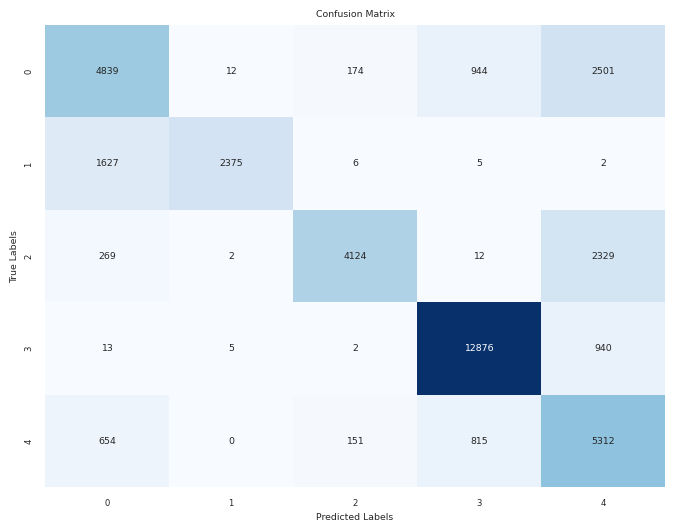

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Les valeurs les plus élevées sur la diagonale de la matrice de confusion indiquent que le modèle a correctement classé un nombre important d'observations dans ces classes spécifiques.

Pour la première classe, 4839 observations ont été correctement prédites tandis que 2563 ont été incorrectement classées.

Pour la deuxième classe, 2375 observations ont été correctement prédites tandis que seulement 19 ont été incorrectes.

Pour la troisième classe, 4124 observations ont été correctement prédites tandis que 2712 ont été incorrectes.

Pour la quatrième classe, 12876 observations ont été correctement prédites tandis que 333 ont été incorrectes.

Pour la cinquième classe, 5312 observations ont été correctement prédites tandis que 5572 ont été incorrectes.

Ces valeurs élevées sur la diagonale indiquent que le modèle a généralement bien performé pour classifier les données dans ces classes, sauf pour la classe 4 où le nombre d'observations incorrectes est supérieur à celui des correctes.

![Logo Google](https://miro.medium.com/v2/resize:fit:1200/1*7RwjCnGeJ0FJgB-zfgyRkQ.png)

---


*Evaluation des performances des performances d'un modèle CatBoot classifier*

CatBoost est une bibliothèque de gradient boosting open-source développée par Yandex. Elle est conçue pour les problèmes de classification et de régression et est particulièrement efficace pour les ensembles de données de grande taille. CatBoost utilise une méthode d'entraînement basée sur le gradient boosting, qui consiste à entraîner une série de modèles de faible complexité (appelés "weak learners") de manière séquentielle, en mettant l'accent sur les exemples qui ont été mal classés par les modèles précédents. Cette approche améliore progressivement les performances du modèle en corrigeant les erreurs et en renforçant les prédictions précises.

In [ ]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
param_grid = {
  "iterations": [50, 100, 200],  # Nombre d'itérations
   "learning_rate": [0.05, 0.1, 0.5],  # Taux d'apprentissage
   "depth": [4, 6, 8]  # Profondeur de l'arbre
}

# Créer le modèle CatBoost
cb_model = CatBoostClassifier(random_state=42, verbose=0)

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Créer un nouveau modèle avec les meilleurs paramètres trouvés
best_cb_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)

# Entraîner le meilleur modèle sur toutes les données d'entraînement
best_cb_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_cb_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Accuracy: 0.7401035284703293
Precision: 0.7506868764368027
Recall: 0.7401035284703293
F1 Score: 0.7395758196456492


Voici ce que chaque partie du code accomplit :

Importation des bibliothèques : Les bibliothèques nécessaires sont importées, y compris CatBoostClassifier pour le modèle de classification, GridSearchCV pour la recherche sur grille, train_test_split pour diviser les données en ensembles d'entraînement et de test, et différentes mesures de performance telles que accuracy_score, precision_score, recall_score, et f1_score.

Division des données : Les données sont divisées en ensembles d'entraînement et de test en utilisant train_test_split. Cela permet d'évaluer les performances du modèle sur des données non vues.

Définition des paramètres à tester : Une grille de paramètres est définie pour la recherche sur grille. Les paramètres comprennent le nombre d'itérations, le taux d'apprentissage et la profondeur de l'arbre pour le modèle CatBoost.

Création du modèle CatBoost : Un modèle CatBoostClassifier est créé avec un état aléatoire fixé et un niveau de verbosité réglé sur 0 pour supprimer les messages d'entraînement.

Recherche sur grille : GridSearchCV est utilisé pour effectuer une recherche sur grille à l'aide du modèle CatBoost et de la grille de paramètres définie.

La validation croisée à 5 plis est utilisée pour évaluer les performances des modèles.

Entraînement du meilleur modèle : Une fois les meilleurs paramètres trouvés, un nouveau modèle CatBoost est créé avec ces paramètres optimaux et est entraîné sur toutes les données d'entraînement.

Prédictions et évaluation : Le modèle entraîné est utilisé pour faire des prédictions sur l'ensemble de test, et les métriques d'évaluation telles que l'accuracy, la précision, le rappel et le F1-score sont calculées et affichées.

Le modèle CatBoost entraîné avec ces paramètres optimaux atteint une accuracy de 74.01%,une précision de 75 %, un rappel de 74.01%, et un F1-score de 73.96% sur l'ensemble de test. Ces performances indiquent une capacité satisfaisante du modèle à classifier correctement les données de test.

- Examinons la matrice de confusion pour évaluer les performances du model de CatBoost:

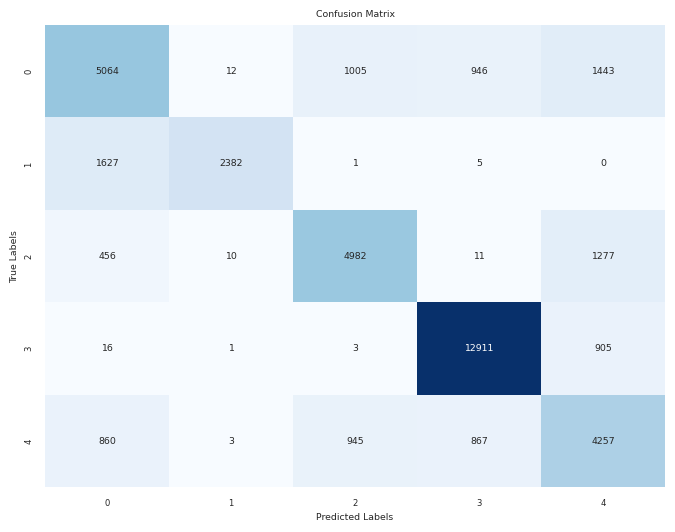

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Les valeurs les plus élevées sur la diagonale de la matrice de confusion indiquent que le modèle a correctement classé un nombre important d'observations dans ces classes spécifiques.

Pour la première classe, 5064 observations ont été correctement prédites tandis que 2959 ont été incorrectement classées.

Pour la deuxième classe, 2382 observations ont été correctement prédites tandis que seules 26 ont été incorrectes.

Pour la troisième classe, 4982 observations ont été correctement prédites tandis que 2712 ont été incorrectes.

Pour la quatrième classe, 12911 observations ont été correctement prédites tandis que 1954 ont été incorrectes.

Pour la cinquième classe, 4257 observations ont été correctement prédites tandis que 3615 ont été incorrectes.

Ces valeurs élevées sur la diagonale indiquent que le modèle a généralement bien performé dans la classification des données dans ces classes.

![Logo Google](https://media.licdn.com/dms/image/D4D12AQE5U2CNpzE-RQ/article-cover_image-shrink_600_2000/0/1695588983632?e=2147483647&v=beta&t=vqFtjNGJhFb-SWxA1VgZHH5VA4EYXPNkP66kmqE6cZU)


---


*Evaluation des performances des performances d'un modèle LogisticRegression*

Bien que la faible linéarité entre les caractéristiques ait été observée à travers la matrice de nuages de points tracée précédemment, et que nous ayons conclu qu'une régression linéaire ne serait pas efficace, il serait tout de même intéressant d'utiliser la régression logistique multinomiale pour confirmer cette supposition et explorer différentes approches.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Définir les paramètres à tester
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}

# Créer le modèle de régression logistique multinomiale
model = LogisticRegression(multi_class='multinomial')

# Recherche sur grille pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=15, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Afficher les résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Meilleurs paramètres: {'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.672484933356673
Precision: 0.6564252875702897
Recall: 0.672484933356673
F1 Score: 0.6619995571142966


Les résultats obtenus pour le modèle de régression logistique multinomiale semblent être parmi les plus bas jusqu'à présent. Les mesures de performance telles que l'accuracy (67.24%), la précision, le rappel (recall) et le score F1 sont plutôt faibles par rapport aux autres modèles deja testés. Cela pourrait indiquer que ce modèle ne parvient pas à capturer la structure sous-jacente des données aussi efficacement que les autres modèles.









- Examinons la matrice de confusion pour évaluer les performances du model de Logistic Regression :

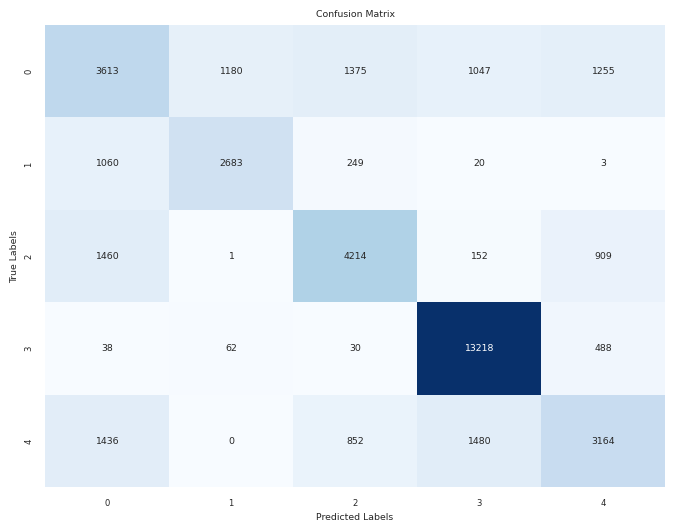

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Selon la matrice de confusion, les résultats sont les suivants :

Pour la première classe, 3613 observations ont été correctement prédites tandis que 4857 ont été incorrectement classées.

Pour la deuxième classe, 2683 observations ont été correctement prédites tandis que 1332 ont été incorrectes.

Pour la troisième classe, 4214 observations ont été correctement prédites tandis que 2522 ont été incorrectes.

Pour la quatrième classe, 13218 observations ont été correctement prédites tandis que seulement 648 ont été incorrectes.

Pour la cinquième classe, 3164 observations ont été correctement prédites tandis que 3768 ont été incorrectes.

Ces résultats suggèrent que le modèle a réussi à classifier correctement la plupart des observations dans ces classes spécifiques, bien que la prédiction pour les classes 0 et 4 n'ait pas été très performante.

### Analyse comparative des performances en utilisant des réseaux de neurones (Deep Learning)

Une approche interessante consiste à explorer l'utilisation des réseaux de neurones pour les tâches de classification et à déterminer si le deep learning peut fournir des résultats plus intéressants que les méthodes d'apprentissage supervisé du Machine Learning. Cependant, en raison des limitations de performances de la machine virtuelle actuelle, l'exécution de modèles de deep learning n'est malheureusement pas possible. Une solution envisageable serait d'exporter la dataframe encodée "numerical_data_encoded" en un fichier Excel nommé "results.xls" contenant les caractéristiques des clients et la variable cible "Cluster" vers les ressources de la machine locale, où l'algorithmes de deep learning pourrait être exécutés.

In [ ]:
# Enregistrer les résultats dans un nouveau fichier Excel
numerical_data_encoded.to_excel("results.xls", index=False, encoding='utf-8')

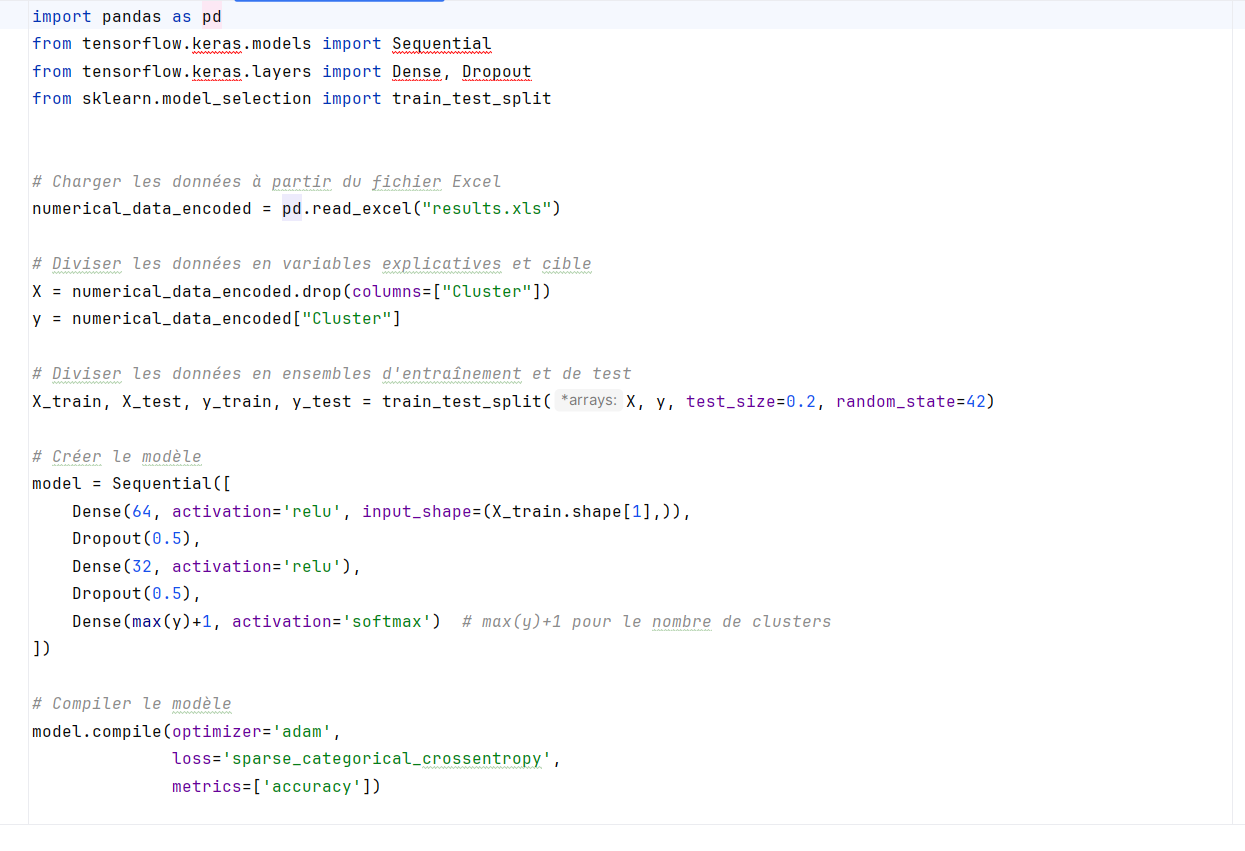

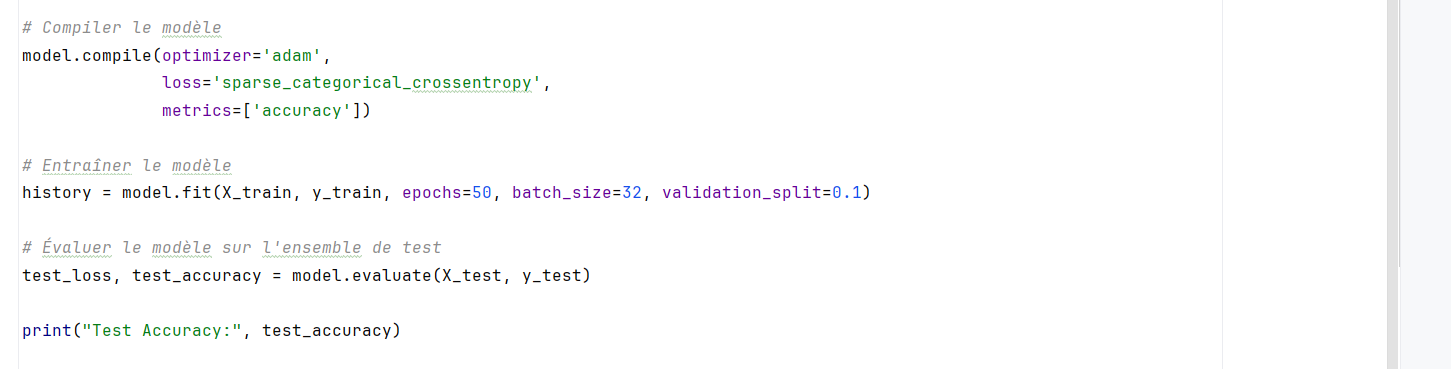

Vous pouvez accéder au code soit en ouvrant le fichier "deep_learning.py" dans le dossier "Data Mining" du rendu du projet PFA, soit en cliquant sur le lien suivant : https://drive.google.com/file/d/1aSZwdZjoi_j1BaXqlCT8qEArBaLrU3ZV/view?usp=sharing

Ce script utilise TensorFlow et Keras pour créer et entraîner un modèle de réseau de neurones artificiels à des fins de classification. Il utilise un réseau de neurones artificiels avec deux couches cachées et des couches de dropout pour la régularisation afin de classer les données en fonction des étiquettes de classe fournies dans la colonne "Cluster". Voici une description de chaque étape :

1. Importation des bibliothèques nécessaires : Les bibliothèques pandas, TensorFlow et scikit-learn sont importées. Pandas est utilisé pour manipuler les données, TensorFlow pour construire le modèle de réseau de neurones, et scikit-learn pour diviser les données en ensembles d'entraînement et de test.


2. Chargement des données : Les données sont chargées à partir d'un fichier Excel nommé "results.xls" à l'aide de la fonction read_excel() de pandas.

3. Division des données : Les données sont divisées en variables explicatives (X) et la variable cible (y). Les variables explicatives sont toutes les colonnes sauf la colonne "Cluster", qui contient les étiquettes de classe.
4. Division des données en ensembles d'entraînement et de test : Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction train_test_split() de scikit-learn. Dans cet exemple, 80% des données sont utilisées pour l'entraînement et 20% pour les tests.

5. Construction du modèle : Un modèle séquentiel est créé à l'aide de l'API Sequential de Keras. Le modèle commence par une couche Dense de 64 neurones avec une fonction d'activation ReLU, suivie d'une couche Dropout pour la régularisation et éviter la saturation des neuronnes. Ensuite, il y a une autre couche Dense de 32 neurones avec ReLU et une autre couche Dropout. Enfin, la couche de sortie utilise une fonction d'activation softmax pour produire des probabilités pour chaque classe.

6. Compilation du modèle : Le modèle est compilé avec l'optimiseur "adam", la fonction de perte "sparse_categorical_crossentropy" et la métrique "accuracy".

7. Entraînement du modèle : Le modèle est entraîné sur les données d'entraînement pour 50 époques avec une taille de lot de 32. La validation est effectuée sur 10% des données d'entraînement.

8. Évaluation du modèle : Une fois l'entraînement terminé, le modèle est évalué sur l'ensemble de test pour obtenir la perte de test et la précision de test.

Le résultat obtenu dévoile une accuracy de 34,4% pour les données de test, ce qui suggère que l'utilisation des réseaux de neurones ne semble pas être une approche viable pour prédire les catégories de voitures en fonction des données des clients et donc elle est à exclure.

![Logo Google](https://media.licdn.com/dms/image/C5612AQEZWpzmBGqTcw/article-cover_image-shrink_720_1280/0/1594270969026?e=2147483647&v=beta&t=Xuq0eJ1kif4eBdSQMeupMwvMkgRpEO9R0aFVxiJE4z8)


---


*Evaluation des performances de l'approche d'empilement (stacking) pour la classification utilisant plusieurs modèles de base:*

Le stacking, également appelé empilement, est une technique d'ensemble learning où les prédictions de plusieurs modèles de base sont utilisées comme données d'entrée pour un métamodèle. Plutôt que de se contenter de combiner les prédictions de différents modèles de manière pondérée ou de les voter, le stacking implique d'utiliser les prédictions des modèles de base comme caractéristiques pour former un modèle de niveau supérieur, généralement un modèle plus sophistiqué comme un arbre de décision, une régression linéaire ou un réseau de neurones. Ce métamodèle apprend ensuite à pondérer les prédictions des modèles de base pour produire une prédiction finale. Le stacking est utilisé pour améliorer les performances prédictives en exploitant les forces de différents types de modèles et en réduisant les faiblesses de chacun.

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50,max_depth=10, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=10)),
    ('cb', CatBoostClassifier(random_state=42, depth=6,iterations=200,learning_rate=0.05,verbose=0)),
    ('knn', KNeighborsClassifier(metric='manhattan',n_neighbors=40,weights='uniform'))
]

# Initialize the StackingClassifier
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Train the StackingClassifier on the training data
stacked_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacked_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7390782465177924
Precision: 0.7524301150570941
Recall: 0.7390782465177924
F1 Score: 0.7390404486468256


Différents model de base ont été choisis en fonction de leur précision, sélectionnant ceux dont l'accuracy était d'au moins 70%. On a sélectionné les model avec leurs hyperparamètres optimisés pour maximiser ses performances respectives. Les modèles de base inclus sont :
Random Forest (RandomForestClassifier),
Decision Tree (DecisionTreeClassifier),
CatBoost (CatBoostClassifier),
K-Nearest Neighbors (KNeighborsClassifier)

Ensuite, un StackingClassifier est initialisé en spécifiant les modèles de base et le modèle final qui agrège les prédictions des modèles de base. Dans ce cas, le modèle final est une régression logistique (LogisticRegression).

Le modèle d'empilement est entraîné sur les données d'entraînement. Pendant cette phase, les prédictions des modèles de base sont utilisées comme caractéristiques pour le modèle final.

Une fois le modèle d'empilement entraîné, il est utilisé pour faire des prédictions sur les données de test.

Enfin, les performances du modèle empilé sont évaluées en calculant des métriques telles que l'accuracy, la précision, le rappel (recall) et le score F1 à l'aide des prédictions faites sur les données de test.


Le modèle de l'ensemble empilé semble être le plus performant à ce stade, avec une accuracy, un rappel et un score F1 de 0.739, ce qui représente le maximum obtenu jusqu'à présent au niveau de l'accuracy. La précision est également d'environ 0.75.

Interprétation :

Accuracy : la proportion de prédictions correctes parmi toutes les prédictions effectuées par le modèle. Un score d'accuracy d'environ 0.74 signifie que le modèle prédit correctement la classe cible pour environ 74% des exemples dans l'ensemble de test.

Precision : Un score de précision d'environ 0.75 indique que lorsque le modèle prédit une classe, il a raison environ 75% du temps.

Recall :  Avec un score de rappel d'environ 0.74, le modèle capture correctement environ 74% de toutes les observations positives.

F1 Score : Il représente l'harmonique moyenne de la précision et du rappel. Un score F1 d'environ 0.74 indique un bon équilibre entre la précision et le rappel.

## Resultat :

L'approche consistant à expérimenter plusieurs modèles avant de choisir le modèle final a été fructueuse. En testant une variété de modèles, nous avons pu évaluer leurs performances respectives et sélectionner celui qui offre les meilleures performances sur l'ensemble de test. Dans ce cas, l'ensemble empilé semble être le choix optimal pour appliquer la prédiction des catégories de voitures sur les données marketing.

##  Application du modèle de prédiction aux données Marketing :


- Récupération des données de le table Hive "table_marketing":

In [5]:
# Exécution d'une requête SQL
cursor.execute('SELECT * FROM table_marketing')

# Récupération des noms de colonnes
columns = [desc[0] for desc in cursor.description]

# Récupération des résultats
results = cursor.fetchall()

# Création d'un DataFrame Pandas avec les résultats et les noms de colonnes
marketing = pd.DataFrame(results, columns=columns)

marketing

table_marketing.age table_marketing.sexe  table_marketing.taux  \
0                    21                    F                  1396   
1                    35                    M                   223   
2                    48                    M                   401   
3                    26                    F                   420   
4                    80                    M                   530   
5                    27                    F                   153   
6                    59                    F                   572   
7                    43                    F                   431   
8                    64                    M                   559   
9                    22                    M                   154   
10                   79                    F                   981   
11                   55                    M                   588   
12                   19                    F                   212   
13                   34                    F                  1112   
14                   60                    M                   524   
15                   22                    M                   411   
16                   58                    M                  1192   
17                   54                    F                   452   
18                   35                    M                   589   
19                   59                    M                   748   

   table_marketing.situationfamiliale  table_marketing.nbenfantsacharge  \
0                         Célibataire                                 0   
1                         Célibataire                                 0   
2                         Célibataire                                 0   
3                           En Couple                                 3   
4                           En Couple                                 3   
5                           En Couple                                 2   
6                           En Couple                                 2   
7                         Célibataire                                 0   
8                         Célibataire                                 0   
9                           En Couple                                 1   
10                          En Couple                                 2   
11                        Célibataire                                 0   
12                        Célibataire                                 0   
13                          En Couple                                 0   
14                          En Couple                                 0   
15                          En Couple                                 3   
16                          En Couple                                 0   
17                          En Couple                                 3   
18                        Célibataire                                 0   
19                          En Couple                                 0   

   table_marketing.deuxieme_voiture  
0                             false  
1                             false  
2                             false  
3                              true  
4                             false  
5                             false  
6                             false  
7                             false  
8                             false  
9                             false  
10                            false  
11                            false  
12                            false  
13                            false  
14                             true  
15                             true  
16                            false  
17                             true  
18                            false  
19                             true

- Prétraitement des données récupérées de la même manière que pour les features du model de classification :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

marketing_encoded = marketing.copy()

# Créer un dictionnaire pour mapper les valeurs
mapping = {'Célibataire': 0, 'En Couple': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.situationfamiliale'
marketing_encoded['table_marketing.situationfamiliale'] = marketing_encoded['table_marketing.situationfamiliale'].map(mapping)


# Créer un dictionnaire pour mapper les valeurs
mapping = {'M': 0, 'F': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.situationfamiliale'
marketing_encoded['table_marketing.sexe'] = marketing_encoded['table_marketing.sexe'].map(mapping)

# Créer un dictionnaire pour mapper les valeurs
mapping = {'false': 0, 'true': 1}

# Appliquer le mapping à la colonne 'model_immatriculations_clients.situationfamiliale'
marketing_encoded['table_marketing.deuxieme_voiture'] = marketing_encoded['table_marketing.deuxieme_voiture'].map(mapping)

# Normaliser les données
scaler = StandardScaler()
marketing_scaled = scaler.fit_transform(marketing_encoded)


Ce qui etait realisé :

Encodage des variables catégorielles : Les variables catégorielles telles que la situation familiale, le sexe et la possession d'une deuxième voiture ont été encodées en valeurs numériques. Cela est nécessaire car de nombreux algorithmes d'apprentissage automatique ne peuvent pas traiter directement les variables catégorielles et nécessitent des valeurs numériques en entrée.

Normalisation des données : Les données ont été normalisées à l'aide du StandardScaler de scikit-learn. La normalisation est une étape importante pour mettre toutes les caractéristiques à la même échelle, ce qui peut améliorer la convergence des algorithmes d'apprentissage automatique et leur performance globale.

- Utilisation du modèle empilé précédemment construit (stacked_model) pour les prédictions sur les données prétraitées marketing (marketing_scaled):

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Faire des prédictions sur les données du fichier marketing
marketing_pred = stacked_model.predict(marketing_scaled)

# Ajouter les prédictions au dataframe du fichier marketing
marketing['Catégorie'] = marketing_pred

# Création du dictionnaire pour mapper les numéros de cluster aux types de véhicules
cluster_type_mapping = {
    0: 'Familiale',
    1: 'Prestige',
    2: 'Sportive',
    3: 'Économique',
    4: 'Citadine'
}

# Ajout de la colonne 'Type' à partir du mapping des clusters
marketing['Catégorie'] = marketing['Catégorie'].map(cluster_type_mapping)

# Affichage des types de véhicules prédits pour chaque ligne
marketing

table_marketing.age table_marketing.sexe  table_marketing.taux  \
0                    21                    F                  1396   
1                    35                    M                   223   
2                    48                    M                   401   
3                    26                    F                   420   
4                    80                    M                   530   
5                    27                    F                   153   
6                    59                    F                   572   
7                    43                    F                   431   
8                    64                    M                   559   
9                    22                    M                   154   
10                   79                    F                   981   
11                   55                    M                   588   
12                   19                    F                   212   
13                   34                    F                  1112   
14                   60                    M                   524   
15                   22                    M                   411   
16                   58                    M                  1192   
17                   54                    F                   452   
18                   35                    M                   589   
19                   59                    M                   748   

   table_marketing.situationfamiliale  table_marketing.nbenfantsacharge  \
0                         Célibataire                                 0   
1                         Célibataire                                 0   
2                         Célibataire                                 0   
3                           En Couple                                 3   
4                           En Couple                                 3   
5                           En Couple                                 2   
6                           En Couple                                 2   
7                         Célibataire                                 0   
8                         Célibataire                                 0   
9                           En Couple                                 1   
10                          En Couple                                 2   
11                        Célibataire                                 0   
12                        Célibataire                                 0   
13                          En Couple                                 0   
14                          En Couple                                 0   
15                          En Couple                                 3   
16                          En Couple                                 0   
17                          En Couple                                 3   
18                        Célibataire                                 0   
19                          En Couple                                 0   

   table_marketing.deuxieme_voiture   Catégorie  
0                             false  Économique  
1                             false  Économique  
2                             false  Économique  
3                              true    Sportive  
4                             false    Sportive  
5                             false    Citadine  
6                             false    Citadine  
7                             false  Économique  
8                             false  Économique  
9                             false    Citadine  
10                            false   Familiale  
11                            false  Économique  
12                            false  Économique  
13                            false   Familiale  
14                             true  Économique  
15                             true    Sportive  
16                            false   Familiale  
17                             true    Sportive  
18     

In [ ]:
# Enregistrer les résultats dans un nouveau fichier CSV
marketing.to_csv("marketing_resultat.csv", index=False, encoding='utf-8')

Les résultats du dataframe marketing, y compris les prédictions de catégorie de véhicules, sont enregistrés dans un nouveau fichier CSV appelé "marketing_resultat.csv" qui sera chargés prochainement dans une base de donnée résultat (regardez les scripts accompagnés avec ce notebook).

In [ ]:
# Fermeture du curseur et de la connexion
cursor.close()
conn.close()

Le curseur utilisé pour exécuter la requête SQL et la connexion à la base de données sont fermés pour libérer les ressources.

Cela conclut la partie de l'analyse des données avec les techniques de Data Mining, Machine Learning et Deep Learning.